<a href="https://colab.research.google.com/github/peterp-58/peterp-58/blob/main/CIND820_PP_Bankrupcyv7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading Pythons Programs

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import KNNImputer

#Uploading and setting up the Polish Dataset

uploading and renaming the columns for further review of the polish dataset.

In [3]:
#pulling data from the website.
polishData=pd.read_csv("https://archive.ics.uci.edu/static/public/365/data.csv")
#adding the data into a dataframe
polish_Dataset = pd.DataFrame(polishData)

# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Set display width to avoid wrapping of wide DataFrames
pd.set_option('display.width', None)

# Set option to display full content of each column
pd.set_option('display.max_colwidth', None)
polish_Dataset.head(10)

year        A1        A2        A3       A4        A5       A6        A7        A8       A9  \
0     1  0.200550  0.379510  0.396410   2.0472   32.3510  0.38825  0.249760   1.33050  1.13890   
1     1  0.209120  0.499880  0.472250   1.9447   14.7860  0.00000  0.258340   0.99601  1.69960   
2     1  0.248660  0.695920  0.267130   1.5548   -1.1523  0.00000  0.309060   0.43695  1.30900   
3     1  0.081483  0.307340  0.458790   2.4928   51.9520  0.14988  0.092704   1.86610  1.05710   
4     1  0.187320  0.613230  0.229600   1.4063   -7.3128  0.18732  0.187320   0.63070  1.15590   
5     1  0.228220  0.497940  0.359690   1.7502  -47.7170  0.00000  0.281390   1.00830  1.97860   
6     1  0.111090  0.647440  0.289710   1.4705    2.5349  0.00000  0.111090   0.54454  1.73480   
7     1  0.532320  0.027059  0.705540  53.9540  299.5800  0.00000  0.652400  35.95700  0.65273   
8     1  0.009020  0.632020  0.053735   1.1263  -37.8420  0.00000  0.014434   0.58223  1.33320   
9     1  0.124080  0.838370  0.142040   1.1694  -91.8830  0.00000  0.153280   0.19279  2.11560   

       A10       A11        A12       A13       A14       A15        A16      A17       A18  \
0  0.50494  0.249760   0.659800  0.166600  0.249760   497.420   0.733780   2.6349  0.249760   
1  0.49788  0.261140   0.516800  0.158350  0.258340   677.960   0.538380   2.0005  0.258340   
2  0.30408  0.312580   0.641840  0.244350  0.309060   794.160   0.459610   1.4369  0.309060   
3  0.57353  0.092704   0.301630  0.094257  0.092704   917.010   0.398030   3.2537  0.092704   
4  0.38677  0.187320   0.331470  0.121820  0.187320  1133.200   0.322110   1.6307  0.187320   
5  0.50206  0.286450   0.586910  0.148120  0.281390   620.140   0.588580   2.0083  0.281390   
6  0.35256  0.125750   0.180410  0.309630  0.111090   439.940   0.829650   1.5445  0.111090   
7  0.97294  0.693940  48.966000  1.060200  0.652400    14.272  25.575000  36.9570  0.652400   
8  0.36798  0.043162   0.033921  0.038938  0.014434  4443.700   0.082138   1.5822  0.014434   
9  0.16163  0.184540   0.182840  0.075411  0.153280  1918.100   0.190300   1.1928  0.153280   

        A19      A20      A21       A22       A23       A24      A25        A26       A27  \
0  0.149420   43.370  1.24790  0.214020  0.119980  0.477060  0.50494   0.604110   1.45820   
1  0.152000   87.981  1.42930  0.248060  0.123040       NaN  0.39542   0.439920  88.44400   
2  0.236100   73.133  1.42830  0.302600  0.189960       NaN  0.28932   0.372820  86.01100   
3  0.071428   79.788  1.50690  0.115500  0.062782  0.171930  0.57353   0.361520   0.94076   
4  0.115530   57.045      NaN  0.198320  0.115530  0.187320  0.38677   0.322110   1.41380   
5  0.142220  107.260  1.72780  0.281040  0.115350       NaN  0.49970   0.481810  55.51100   
6  0.064036   57.733  0.56811  0.000000  0.064036       NaN  0.31469   0.829650   0.00000   
7  0.999490   39.978      NaN  0.671290  0.815530       NaN  0.96980  21.137000  16.15800   
8  0.010827   36.623  1.07520  0.030778  0.006766  0.000222  0.34828   0.073572   1.07140   
9  0.072451  109.970  1.58660  0.158190  0.058651       NaN  0.15445   0.155470   5.05920   

        A28     A29      A30       A31       A32      A33       A34       A35      A36       A37  \
0   1.76150  5.9443  0.11788  0.149420   94.1400   3.8772   0.56393  0.214020  1.74100  593.2700   
1  16.94600  3.6884  0.26969  0.152000  122.1700   2.9876   2.98760  0.206160  1.69960       NaN   
2   1.06270  4.3749  0.41929  0.238150  176.9300   2.0630   1.42740  0.315650  1.30900    2.3019   
3   1.96180  4.6511  0.14343  0.071428   91.3700   3.9948   0.37581  0.115500  1.35620       NaN   
4   1.11840  4.1424  0.27884  0.115530  147.0400   2.4823   0.32340  0.198320  1.62780   11.2470   
5   2.23590  4.3258  0.23382  0.144490  102.7600   3.5519   3.42000  0.275660  1.97860   22.3120   
6   3.06480  3.6770  0.36088  0.142230  328.7300   1.1103   1.05600  0.024982  1.73480       NaN   
7   2.50960  4.2428 -0.67625  1.000300    8.1579  44.7

In [4]:
#The orginal dataset did not have named columns. It provided an explantion to each attribute in their reserach paper. The code below is to add the proper names.
#replacing the column name with actual names.

new_Column_names={
    'A1':'net_profit/total assets',
    "A2":'Total_Liabilities/total_assets',
    "A3":'Working_Capital_to_Total_Assets_Ratio',
    "A4":'Current_Ratio',
    "A5":"Defensive_Interval_Ratio",
    "A6":'Retained_Earnings_to_Total_Assets_Ratio',
    "A7":"Operating_Income_to_Total_Asset_ratio",
    "A8":"book_value_of_equity/total_liabilities",
    "A9":'Asset_Turnover_Ratio',
    "A10":'Equity_to_Total_Assets_Ratio',
    "A11":'gross_profit+extraordinary_items+financial_expenses)/total',
    "A12":'gross_profit/short-term_liabilities',
    "A13":'(gross_profit+depreciation)/sales',
    "A14":'(gross_profit+interest)/total_assets',
    "A15":'(total_liabilities∗365)/(gross_profit+depreciation)',
    "A16":'(gross profit+depreciation)/total_liabilities',
    "A17":'total_assets/total_liabilities',
    "A18":'gross_profit/total_assets',
    "A19":'gross_profit/sales',
    "A20":'(inventory∗365)/sales',
    "A21":'sales(n)/sales(n-1)',
    "A22":'profit_on_operating_activities/total_assets',
    "A23":'net_profit/sales',
    "A24":'gross_profit(in3years)/total_assets',
    "A25":'(equity-share_capital)/total_assets',
    "A26":'(net_profit+depreciation)/total_liabilities',
    "A27":'profit_on_operating_activities/financial_expenses',
    "A28":'working_capital/fixed_assets',
    "A29":'logarithm_of_total_assets',
    "A30":'(total_liabilities-cash)/sales',
    "A31":'(gross_profit+interest)/sales',
    "A32":'(current_liabilities∗365)/cost_of_products_sold',
    "A33":'operating_expenses/short-term_liabilities',
    "A34":'operating_expenses_/_total_liabilities',
    "A35":'profit_on_sales/total_assets',
    "A36":'total_sales/total_assets',
    "A37":'(current_assets-inventories)/long-term_liabilities',
    "A38":'constant_capital/total_assets',
    "A39":'profit_on_sales/sales',
    "A40":'(current_assets-inventory-receivables)/short-term liabilities',
    "A41":'total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365))',
    "A42":'profit_on_operating_activities/sales',
    "A43":'rotation_receivables+inventory_turnover_in_days',
    "A44":'(receivables∗365)/sales',
    "A45": 'net_profit/inventory',
    "A46":'(current_assets-inventory)/short-term_liabilities',
    "A47":'(inventory∗365)/cost_of_products_sold',
    "A48":'EBITDA_(profit_on_operating_activities-depreciation)/total_assets',
    "A49":'EBITDA_(profit_on_operating_activities-depreciation)/sales',
    "A50":'current_assets/total_liabilities',
    "A51":'short-term_liabilities/total_assets',
    "A52":'(short-term_liabilities∗365)/cost_of_products_sold)',
    "A53":'equity/fixed_assets',
    "A54":'constant_capital/fixed_assets',
    "A55":'working_capital',
    "A56":'(sales-cost_of_products_sold)/sales',
    "A57":'(current_assets-inventory-short-term_liabilities)/(sales–gross_profit-depreciation)',
    "A58":'total_costs/total_sales',
    "A59":'long-term_liabilities/equity',
    "A60":'sales/inventory',
    "A61":'sales/receivables',
    "A62":'(short-term_liabilities∗365)/sales',
    "A63":'sales/short-term liabilities',
    "A64":'sales/fixed assets',
                          }





In [5]:
polish_Dataset =polish_Dataset.rename(columns=new_Column_names)


In [6]:
#based on the intial review of all the attributes type, it was noted that the class ratio was listed as int.
#making the class into a categorial data type from int
polish_Dataset['class']=polish_Dataset['class'].astype('category')

In [7]:
#snapshot of the features after change in data type 'class'
polish_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43405 entries, 0 to 43404
Data columns (total 66 columns):
 #   Column                                                                               Non-Null Count  Dtype   
---  ------                                                                               --------------  -----   
 0   year                                                                                 43405 non-null  int64   
 1   net_profit/total assets                                                              43397 non-null  float64 
 2   Total_Liabilities/total_assets                                                       43397 non-null  float64 
 3   Working_Capital_to_Total_Assets_Ratio                                                43397 non-null  float64 
 4   Current_Ratio                                                                        43271 non-null  float64 
 5   Defensive_Interval_Ratio                                                         

#Variable Additions
This research paper was to introduce financial ratios that can help identify financial stress. This analysis was done by reviewing all attributes and seeing what can be added.

The following additions are based on using exisitng variables to create these additions. This is based on existing and industry knowledge.

In [8]:
#The introduction of this variable is to get an understanding of how much of interest paid is to sales.
#A high proportion of interest to sales will indicate that a good portion of their sales earned will go towards paying the interest and other cost may not be covered.
#Variable 1
Interest_to_Sales = (polish_Dataset['(gross_profit+interest)/sales']-polish_Dataset['gross_profit/sales'])
Interest_to_Sales.replace([np.inf, -np.inf], np.NaN, inplace=True )
Interest_to_Sales
polish_Dataset['Interest_to_Sales'] = Interest_to_Sales


In [9]:
#To gain an understanding on liquidity compared to all assets. Cash is the most liquid asset and can be
#used to cover debt/interest in the short term.
#variable 2
Cash_to_assets  = (polish_Dataset['Total_Liabilities/total_assets']-(polish_Dataset['(total_liabilities-cash)/sales'] * polish_Dataset['total_sales/total_assets'] ))
Cash_to_assets.replace([np.inf, -np.inf], np.NaN, inplace=True )
Cash_to_assets
polish_Dataset['Cash_to_assets'] = Cash_to_assets


In [10]:
#This is to gain an understanding on how much cash can cover total liabilities. Too high can tell us that the company may have a hard time covering their liabilities.
#variable 3
Total_liabilities_to_Cash = (polish_Dataset['Total_Liabilities/total_assets']/ polish_Dataset['Cash_to_assets'] )
Total_liabilities_to_Cash.replace([np.inf, -np.inf], np.NaN, inplace=True )
Total_liabilities_to_Cash
polish_Dataset['Total_liabilities_to_Cash'] = Total_liabilities_to_Cash

In [11]:
#Tells us how much interest can be covered by cash. A high number gives comfort that the company can cover their interest obligations
#variable 4
cash_to_interest = (polish_Dataset['Cash_to_assets']/ polish_Dataset['total_sales/total_assets'] * (1/polish_Dataset['Interest_to_Sales']))
cash_to_interest.replace([np.inf, -np.inf], np.NaN, inplace=True )
cash_to_interest
polish_Dataset['cash_to_interest'] = cash_to_interest

In [12]:
#After initial analysis, I realized that not all companies have debt/paid interest during their fiscal year.
#This is ratio is taking the inverse.
#variable 5
Interest_to_cash = 1 /(polish_Dataset['cash_to_interest'])
Interest_to_cash.replace([np.inf, -np.inf], np.NaN, inplace=True )
Interest_to_cash
polish_Dataset['Interest_to_cash'] = Interest_to_cash

In [13]:
#This ratio to review how much financial expense is covered by total assets. a high number indicates to me that the company has taken on too much debt and may find trouble as assets
#may not be enough relative to debt. this ratio can be used with asset turnover to provide more direction.
#variable 6
Financial_Expense_To_Total_Asset = (polish_Dataset['profit_on_operating_activities/total_assets'] / polish_Dataset['profit_on_operating_activities/financial_expenses'])
Financial_Expense_To_Total_Asset.replace([np.inf, -np.inf], np.NaN, inplace=True )
Financial_Expense_To_Total_Asset
polish_Dataset['Financial_Expense_To_Total_Asset'] = Financial_Expense_To_Total_Asset

In [14]:
#variable 6
Financial_expense_to_operating = (polish_Dataset['profit_on_operating_activities/total_assets'] / (polish_Dataset["Operating_Income_to_Total_Asset_ratio"]*polish_Dataset['profit_on_operating_activities/financial_expenses']))
Financial_expense_to_operating.replace([np.inf, -np.inf], np.NaN, inplace=True )
Financial_expense_to_operating
polish_Dataset['Financial_expense_to_operating']=Financial_expense_to_operating

In [15]:
#this ratio gives me an idea on how much operating income can cover the interst for the fiscal period. a high ratio is a good indicator.
#variable 7
Debt_Coverage_Ratio = ((polish_Dataset["Operating_Income_to_Total_Asset_ratio"]*polish_Dataset['profit_on_operating_activities/financial_expenses']) / polish_Dataset['profit_on_operating_activities/total_assets'])
Debt_Coverage_Ratio.replace([np.inf, -np.inf], np.NaN, inplace=True )
Debt_Coverage_Ratio
polish_Dataset['Debt_Coverage_Ratio'] = Debt_Coverage_Ratio

In [16]:
#operating income can be viewed as cash flow from operating. it it not however, but in its place it can give the reader an idea.
#THis give us the percentage that is avaiable to firm after all expenses are paid from sales for the fiscal
#variable 8
Operating_income_Margin = (polish_Dataset['Operating_Income_to_Total_Asset_ratio'] / polish_Dataset['total_sales/total_assets'])
Operating_income_Margin.replace([np.inf, -np.inf], np.NaN, inplace=True )
Operating_income_Margin
polish_Dataset['Operating_income_Margin'] = Operating_income_Margin

In [17]:
#this ratio tells us how many days  cash is recieved from the momement it is used to pay for inventory and accounts payble, as well as cash recieved from buyers. The lower the number the better
#Variable 9 Cash Conversion Cycle Formula = DIO + DSO – DPO.
Cash_conversion_cycle = ((polish_Dataset['(inventory∗365)/cost_of_products_sold']) + (polish_Dataset['(receivables∗365)/sales']) - (polish_Dataset['(short-term_liabilities∗365)/cost_of_products_sold)']))
Cash_conversion_cycle.replace([np.inf, -np.inf], np.NaN, inplace=True )
Cash_conversion_cycle
polish_Dataset['Cash_conversion_cycle'] = Cash_conversion_cycle

In [18]:
#This ratio is used to determine how much cash can be used to cover financial expense. since cash is the most liquid asset, a high number indicates
#the ability to cover financial expenses
#variable 10
Cash_to_Financial_expense = (polish_Dataset['Cash_to_assets'] / polish_Dataset['Financial_Expense_To_Total_Asset'])
Cash_to_Financial_expense.replace([np.inf, -np.inf], np.NaN, inplace=True )
polish_Dataset['Cash_to_Financial_Expense']= Cash_to_Financial_expense

In [19]:
#Used as part of the dupont formula (i.e Return on equity), gives us indication how much leverage is used.

#variable 11
Equity_multipler= 1/ polish_Dataset['Equity_to_Total_Assets_Ratio']
Equity_multipler.replace([np.inf, -np.inf], np.NaN, inplace=True )
polish_Dataset['Financial_Leverage'] = Equity_multipler

In [20]:
#not addition but transforming an existing attribute to 1,0. if working capital is postive, it will be given a 1, if negative it will given a 0.
#making working capital into a indicator. 1 = postive values, 0 = negative
polish_Dataset['working_capital_indicator'] =np.where(polish_Dataset['working_capital']<=0,0,1)
polish_Dataset['working_capital_indicator']=polish_Dataset['working_capital_indicator'].astype('category')

In [21]:
#final ratio is return on equity. this is to gauge on management perfromance on how much they retun to shareholders.
#since this ratio is the result of the dupoint formula, it helps us determine what goes into the results for shareholders. such as
#asset turnover and financial leverage. a high financial leverage tell us that the results are coming from debt.
#Variable12
Return_On_equity =polish_Dataset['net_profit/sales'] * polish_Dataset['total_sales/total_assets'] *polish_Dataset['Financial_Leverage']
Return_On_equity.replace([np.inf, -np.inf], np.NaN, inplace=True )
polish_Dataset['Return_On_equity'] = Return_On_equity

In [22]:
#Review of all financial ratios in the polish dataset
polish_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43405 entries, 0 to 43404
Data columns (total 80 columns):
 #   Column                                                                               Non-Null Count  Dtype   
---  ------                                                                               --------------  -----   
 0   year                                                                                 43405 non-null  int64   
 1   net_profit/total assets                                                              43397 non-null  float64 
 2   Total_Liabilities/total_assets                                                       43397 non-null  float64 
 3   Working_Capital_to_Total_Assets_Ratio                                                43397 non-null  float64 
 4   Current_Ratio                                                                        43271 non-null  float64 
 5   Defensive_Interval_Ratio                                                         

In [23]:
polish_Dataset.head()

year  net_profit/total assets  Total_Liabilities/total_assets  \
0     1                 0.200550                         0.37951   
1     1                 0.209120                         0.49988   
2     1                 0.248660                         0.69592   
3     1                 0.081483                         0.30734   
4     1                 0.187320                         0.61323   

   Working_Capital_to_Total_Assets_Ratio  Current_Ratio  Defensive_Interval_Ratio  \
0                                0.39641         2.0472                   32.3510   
1                                0.47225         1.9447                   14.7860   
2                                0.26713         1.5548                   -1.1523   
3                                0.45879         2.4928                   51.9520   
4                                0.22960         1.4063                   -7.3128   

   Retained_Earnings_to_Total_Assets_Ratio  Operating_Income_to_Total_Asset_ratio  \
0                                  0.38825                               0.249760   
1                                  0.00000                               0.258340   
2                                  0.00000                               0.309060   
3                                  0.14988                               0.092704   
4                                  0.18732                               0.187320   

   book_value_of_equity/total_liabilities  Asset_Turnover_Ratio  Equity_to_Total_Assets_Ratio  \
0                                 1.33050                1.1389                       0.50494   
1                                 0.99601                1.6996                       0.49788   
2                                 0.43695                1.3090                       0.30408   
3                                 1.86610                1.0571                       0.57353   
4                                 0.63070                1.1559                       0.38677   

   gross_profit+extraordinary_items+financial_expenses)/total  \
0                                                    0.249760   
1                                                    0.261140   
2                                                    0.312580   
3                                                    0.092704   
4                                                    0.187320   

   gross_profit/short-term_liabilities  (gross_profit+depreciation)/sales  \
0                              0.65980                           0.166600   
1                              0.51680                           0.158350   
2                              0.64184                           0.244350   
3                              0.30163                           0.094257   
4                              0.33147                           0.121820   

   (gross_profit+interest)/total_assets  (total_liabilities∗365)/(gross_profit+depreciation)  \
0                              0.249760                                               497.42   
1                              0.258340                                               677.96   
2                              0.309060                                               794.16   
3                              0.092704                                               917.01   
4                              0.187320                                              1133.20   

   (gross profit+depreciation)/total_liabilities  total_assets/total_liabilities  \
0                                        0.73378                          2.6349   
1                                        0.53838                          2.0005   
2                                        0.45961                          1.4369   
3                                        0.39803                          3.2537   
4                                        0.32211                          1.6307   

   gross_profit/total_assets  gross_profit/sales  (in

In [24]:
polish_Dataset.tail()

year  net_profit/total assets  Total_Liabilities/total_assets  \
43400     5                 0.012898                         0.70621   
43401     5                -0.578050                         0.96702   
43402     5                -0.179050                         1.25530   
43403     5                -0.108860                         0.74394   
43404     5                -0.105370                         0.53629   

       Working_Capital_to_Total_Assets_Ratio  Current_Ratio  Defensive_Interval_Ratio  \
43400                               0.038857        1.17220                   -18.907   
43401                              -0.800850        0.16576                   -67.365   
43402                              -0.275990        0.74554                  -120.440   
43403                               0.015449        1.08780                   -17.003   
43404                              -0.045578        0.91478                   -56.068   

       Retained_Earnings_to_Total_Assets_Ratio  Operating_Income_to_Total_Asset_ratio  \
43400                                  0.00000                               0.013981   
43401                                 -0.57805                              -0.578050   
43402                                 -0.17905                              -0.154930   
43403                                 -0.10886                              -0.109180   
43404                                 -0.10537                              -0.109940   

       book_value_of_equity/total_liabilities  Asset_Turnover_Ratio  Equity_to_Total_Assets_Ratio  \
43400                                 0.41600               1.67680                      0.293790   
43401                                -0.40334               0.93979                     -0.390040   
43402                                -0.26018               1.17490                     -0.326590   
43403                                 0.12531               0.84516                      0.093224   
43404                                 0.86460               0.95040                      0.463670   

       gross_profit+extraordinary_items+financial_expenses)/total  \
43400                                                    0.041583   
43401                                                   -0.578050   
43402                                                   -0.154930   
43403                                                   -0.109180   
43404                                                   -0.109940   

       gross_profit/short-term_liabilities  (gross_profit+depreciation)/sales  \
43400                             0.061959                           0.023622   
43401                            -0.602160                          -0.110220   
43402                            -0.142840                          -0.072940   
43403                            -0.620380                          -0.065652   
43404                            -0.205570                          -0.066747   

       (gross_profit+interest)/total_assets  (total_liabilities∗365)/(gross_profit+depreciation)  \
43400                              0.013981                                              6507.60   
43401                             -0.578050                                              -742.28   
43402                             -0.154930                                             -3298.20   
43403                             -0.109180                                             -5352.10   
43404                             -0.109940                                             -2055.90   

       (gross profit+depreciation)/total_liabilities  total_assets/total_liabilities  \
43400                                       0.056089                         1.41600   
43401                                      -0.491730                         1.03410   
43402                                      -0.110670                         0.79665   
43403                                     

In [25]:
#filename='alldata.csv'
#polish_Dataset.to_csv(filename,index=False)

In [26]:
#files.download('alldata.csv')

# Initial Description Analysis





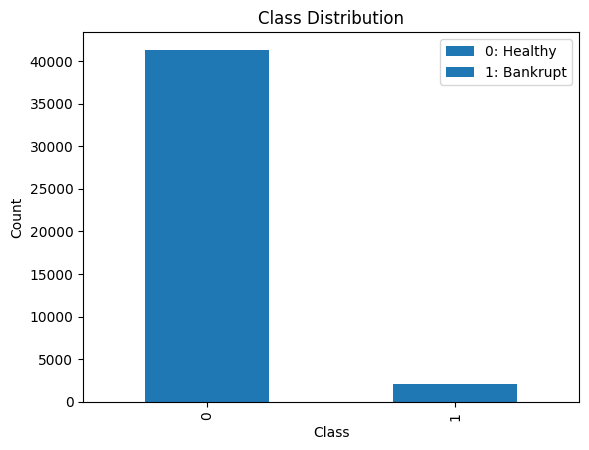

In [27]:
category_counts = polish_Dataset['class'].value_counts()
ax = category_counts.plot(kind='bar')
category_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(['0: Healthy', '1: Bankrupt'])
plt.show()

In [28]:
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline

    import matplotlib.pyplot as plt

    # Generating multiple subplots
    fig, subPlot = plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20, 5))
    fig.suptitle('Bar charts of: ' + str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar', ax=subPlot[plotNumber])

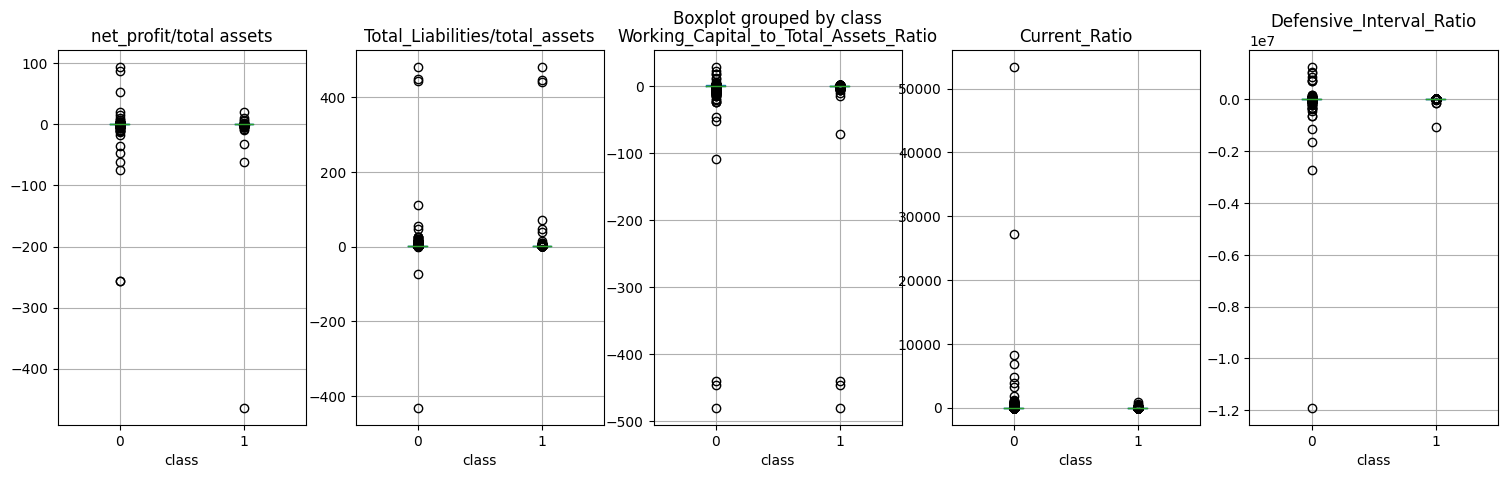

In [29]:
import matplotlib.pyplot as plt

continuous_cols = ['net_profit/total assets','Total_Liabilities/total_assets','Working_Capital_to_Total_Assets_Ratio','Current_Ratio','Defensive_Interval_Ratio']

fig, axes = plt.subplots(nrows=1, ncols=len(continuous_cols), figsize=(18, 5))

# Creating box plots for each continuous predictor against the Target Variable "class"
for col, ax in zip(continuous_cols, axes):
    polish_Dataset.boxplot(column=col, by='class', figsize=(5,5), vert=True, ax=ax)
    ax.set_title(col)
plt.show()

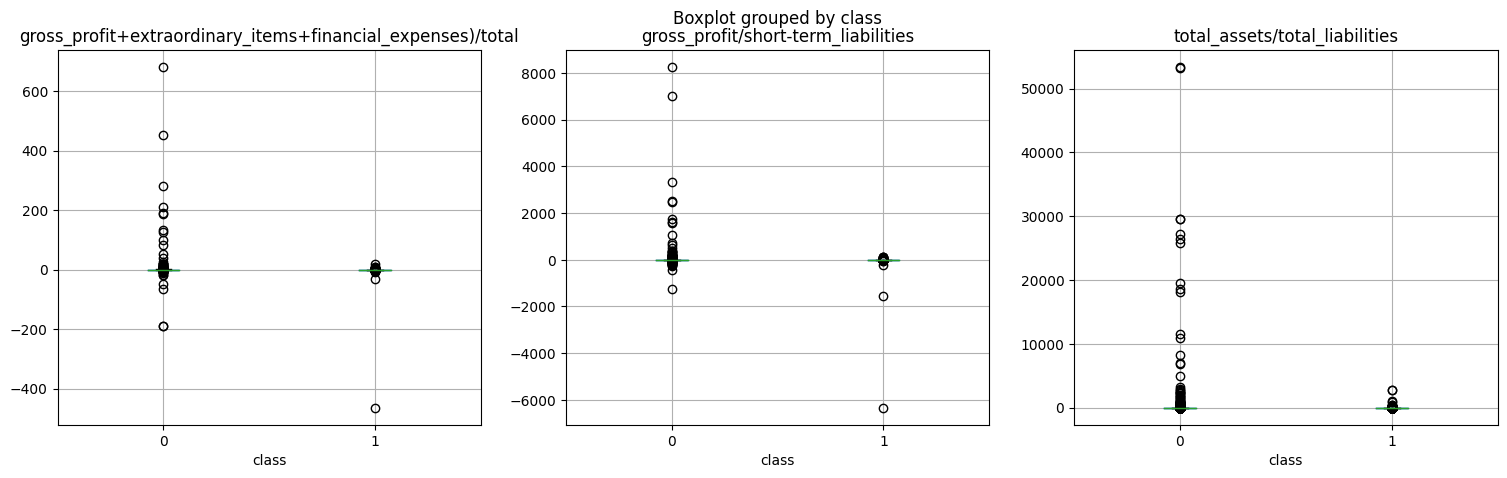

In [30]:
continuous_cols = ['gross_profit+extraordinary_items+financial_expenses)/total','gross_profit/short-term_liabilities','total_assets/total_liabilities']

fig, axes = plt.subplots(nrows=1, ncols=len(continuous_cols), figsize=(18, 5))

# Creating box plots for each continuous predictor against the Target Variable "class"
for col, ax in zip(continuous_cols, axes):
    polish_Dataset.boxplot(column=col, by='class', figsize=(5,5), vert=True, ax=ax)
    ax.set_title(col)
plt.show()

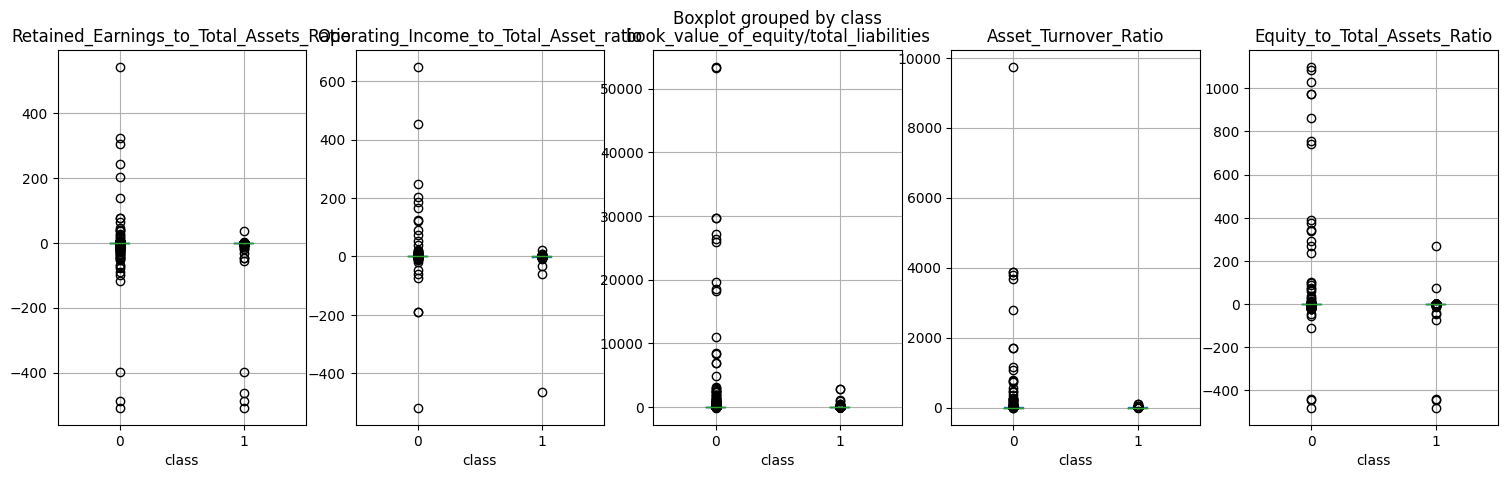

In [31]:
continuous_cols = ['Retained_Earnings_to_Total_Assets_Ratio','Operating_Income_to_Total_Asset_ratio','book_value_of_equity/total_liabilities','Asset_Turnover_Ratio','Equity_to_Total_Assets_Ratio']

fig, axes = plt.subplots(nrows=1, ncols=len(continuous_cols), figsize=(18, 5))

# Creating box plots for each continuous predictor against the Target Variable "class"
for col, ax in zip(continuous_cols, axes):
    polish_Dataset.boxplot(column=col, by='class', figsize=(5,5), vert=True, ax=ax)
    ax.set_title(col)
plt.show()

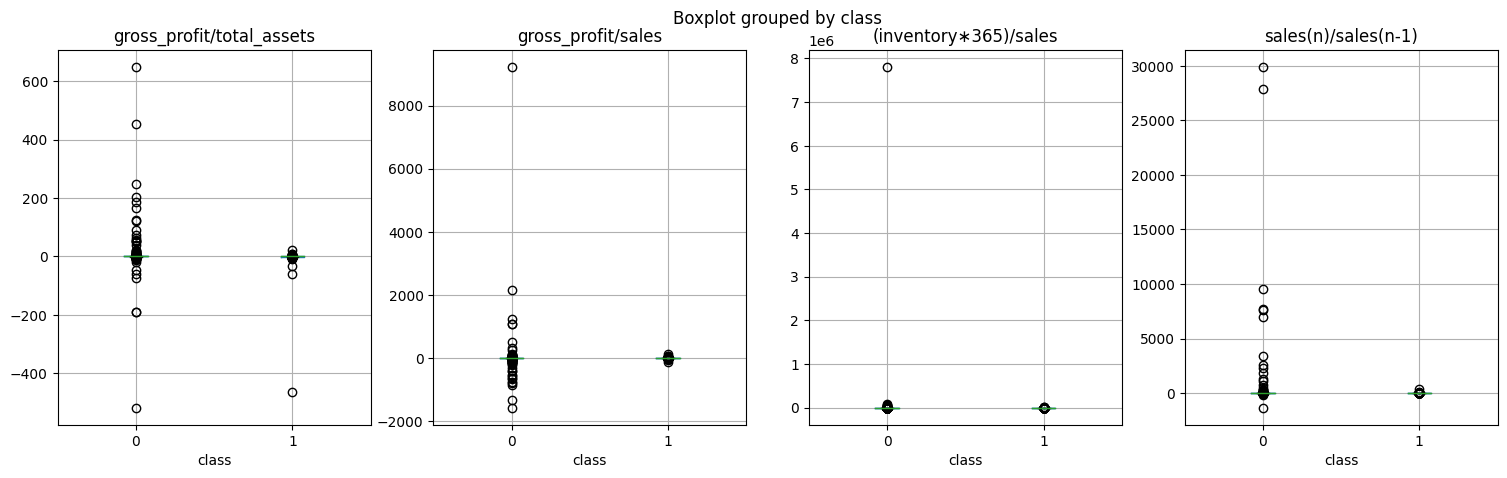

In [32]:
continuous_cols = ['gross_profit/total_assets','gross_profit/sales','(inventory∗365)/sales','sales(n)/sales(n-1)']

fig, axes = plt.subplots(nrows=1, ncols=len(continuous_cols), figsize=(18, 5))

# Creating box plots for each continuous predictor against the Target Variable "class"
for col, ax in zip(continuous_cols, axes):
    polish_Dataset.boxplot(column=col, by='class', figsize=(5,5), vert=True, ax=ax)
    ax.set_title(col)
plt.show()

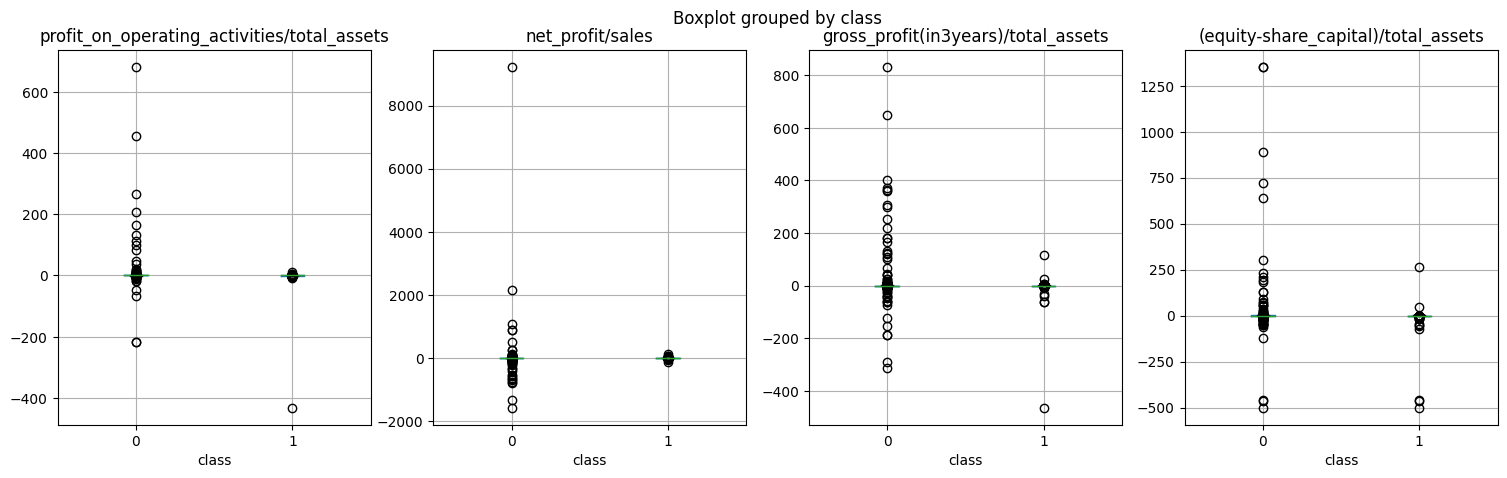

In [33]:
continuous_cols = ['profit_on_operating_activities/total_assets','net_profit/sales','gross_profit(in3years)/total_assets','(equity-share_capital)/total_assets']

fig, axes = plt.subplots(nrows=1, ncols=len(continuous_cols), figsize=(18, 5))

# Creating box plots for each continuous predictor against the Target Variable "class"
for col, ax in zip(continuous_cols, axes):
    polish_Dataset.boxplot(column=col, by='class', figsize=(5,5), vert=True, ax=ax)
    ax.set_title(col)
plt.show()

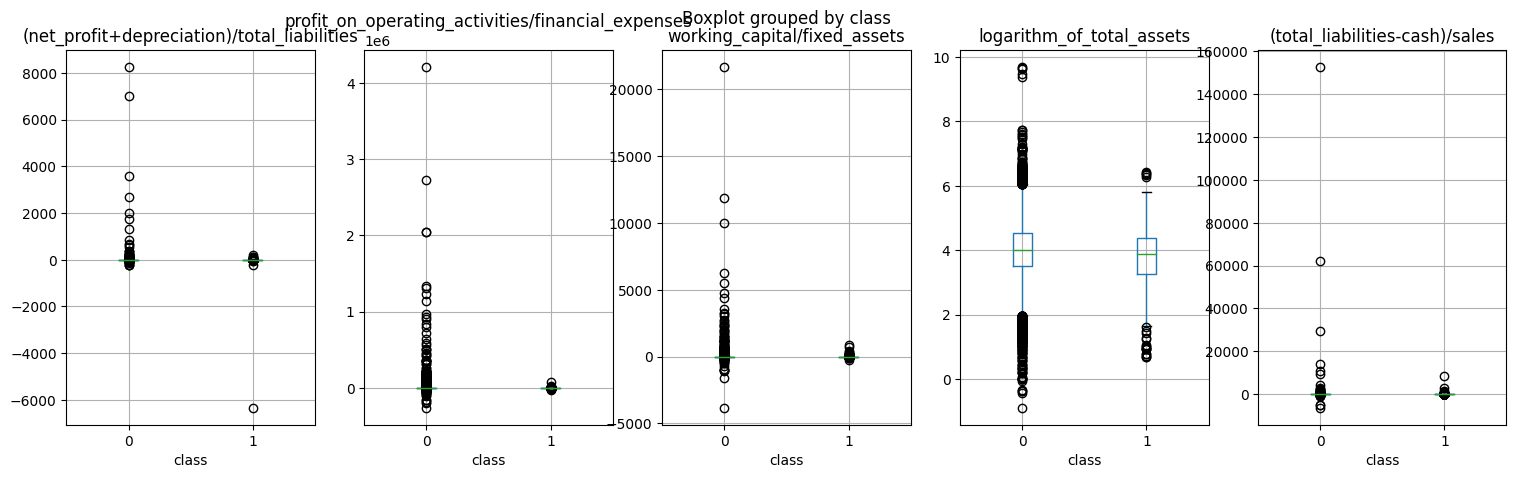

In [34]:
continuous_cols = ['(net_profit+depreciation)/total_liabilities','profit_on_operating_activities/financial_expenses','working_capital/fixed_assets','logarithm_of_total_assets','(total_liabilities-cash)/sales']

fig, axes = plt.subplots(nrows=1, ncols=len(continuous_cols), figsize=(18, 5))

# Creating box plots for each continuous predictor against the Target Variable "class"
for col, ax in zip(continuous_cols, axes):
    polish_Dataset.boxplot(column=col, by='class', figsize=(5,5), vert=True, ax=ax)
    ax.set_title(col)
plt.show()

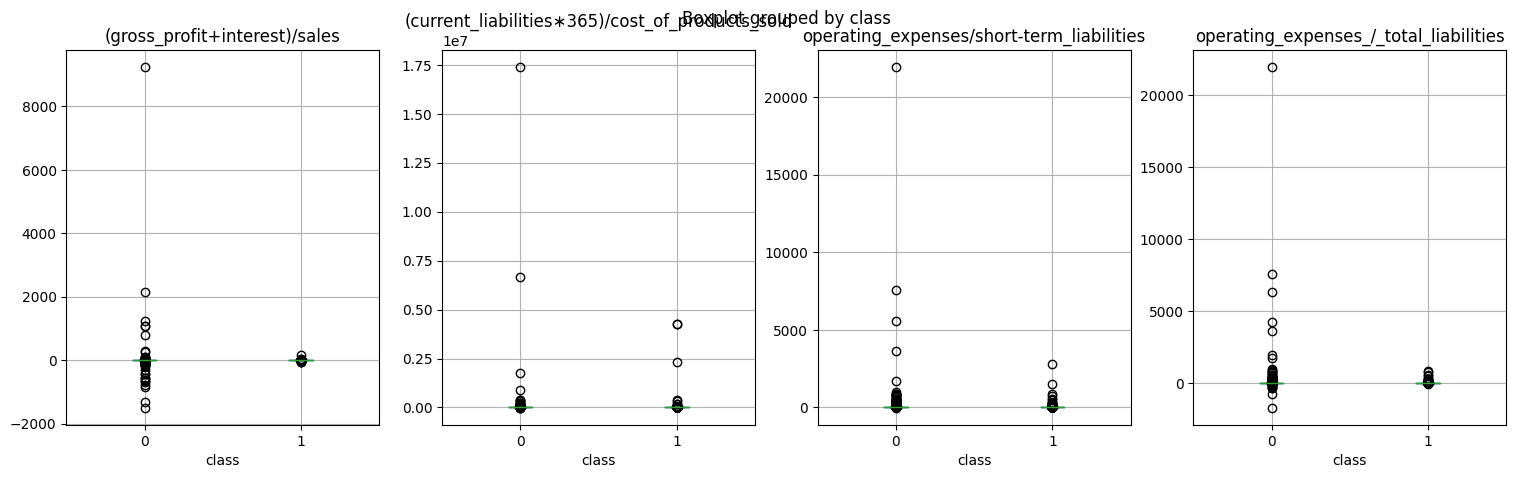

In [35]:
continuous_cols = ['(gross_profit+interest)/sales','(current_liabilities∗365)/cost_of_products_sold','operating_expenses/short-term_liabilities','operating_expenses_/_total_liabilities']

fig, axes = plt.subplots(nrows=1, ncols=len(continuous_cols), figsize=(18, 5))

# Creating box plots for each continuous predictor against the Target Variable "class"
for col, ax in zip(continuous_cols, axes):
    polish_Dataset.boxplot(column=col, by='class', figsize=(5,5), vert=True, ax=ax)
    ax.set_title(col)
plt.show()

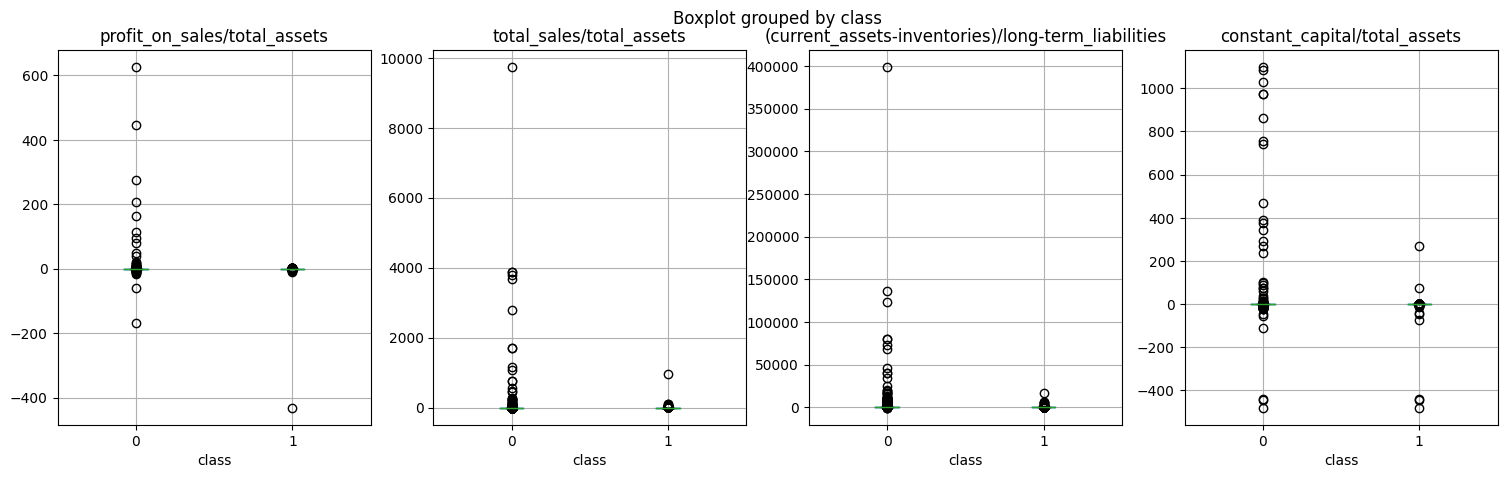

In [36]:
continuous_cols = ['profit_on_sales/total_assets','total_sales/total_assets','(current_assets-inventories)/long-term_liabilities','constant_capital/total_assets']

fig, axes = plt.subplots(nrows=1, ncols=len(continuous_cols), figsize=(18, 5))

# Creating box plots for each continuous predictor against the Target Variable "class"
for col, ax in zip(continuous_cols, axes):
    polish_Dataset.boxplot(column=col, by='class', figsize=(5,5), vert=True, ax=ax)
    ax.set_title(col)
plt.show()

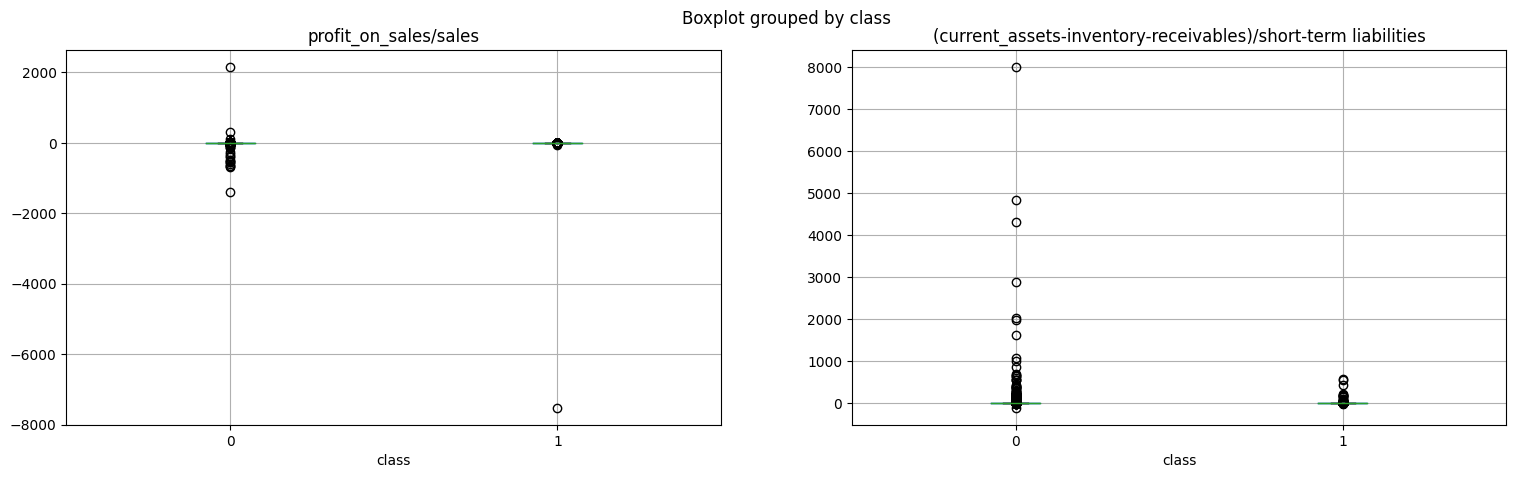

In [37]:
continuous_cols = ['profit_on_sales/sales','(current_assets-inventory-receivables)/short-term liabilities']

fig, axes = plt.subplots(nrows=1, ncols=len(continuous_cols), figsize=(18, 5))

# Creating box plots for each continuous predictor against the Target Variable "class"
for col, ax in zip(continuous_cols, axes):
    polish_Dataset.boxplot(column=col, by='class', figsize=(5,5), vert=True, ax=ax)
    ax.set_title(col)
plt.show()

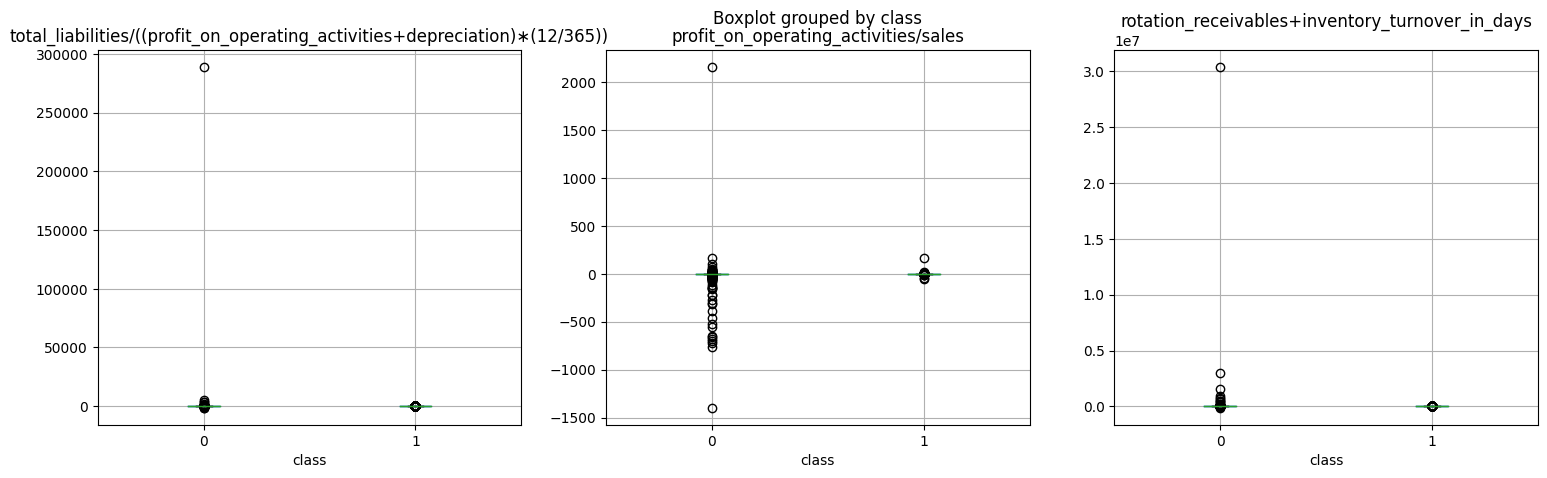

In [38]:
continuous_cols = ['total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365))','profit_on_operating_activities/sales','rotation_receivables+inventory_turnover_in_days']

fig, axes = plt.subplots(nrows=1, ncols=len(continuous_cols), figsize=(18, 5))

# Creating box plots for each continuous predictor against the Target Variable "class"
for col, ax in zip(continuous_cols, axes):
    polish_Dataset.boxplot(column=col, by='class', figsize=(5,5), vert=True, ax=ax)
    ax.set_title(col)
plt.show()

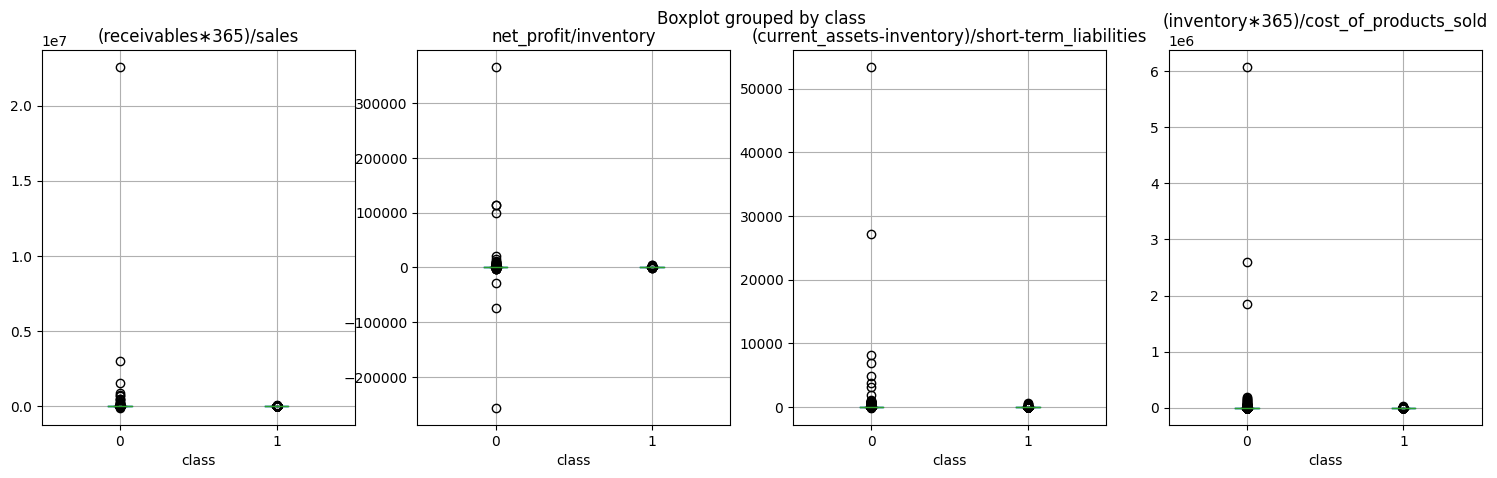

In [39]:
continuous_cols = ['(receivables∗365)/sales','net_profit/inventory','(current_assets-inventory)/short-term_liabilities','(inventory∗365)/cost_of_products_sold']

fig, axes = plt.subplots(nrows=1, ncols=len(continuous_cols), figsize=(18, 5))

# Creating box plots for each continuous predictor against the Target Variable "class"
for col, ax in zip(continuous_cols, axes):
    polish_Dataset.boxplot(column=col, by='class', figsize=(5,5), vert=True, ax=ax)
    ax.set_title(col)
plt.show()

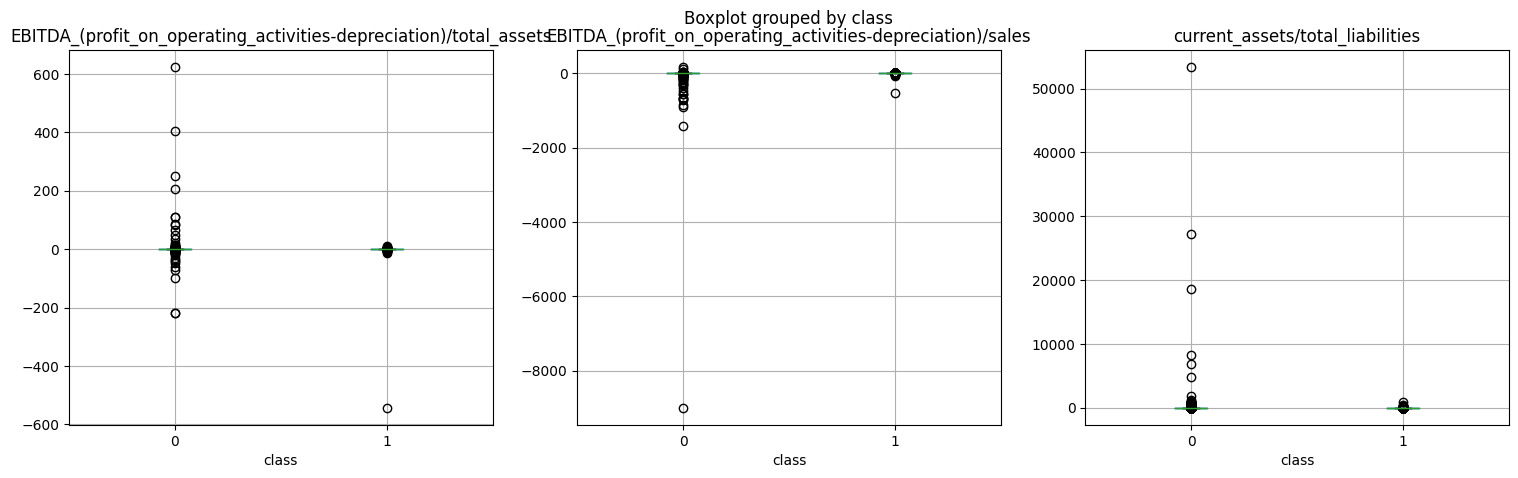

In [40]:
continuous_cols = ['EBITDA_(profit_on_operating_activities-depreciation)/total_assets','EBITDA_(profit_on_operating_activities-depreciation)/sales','current_assets/total_liabilities']

fig, axes = plt.subplots(nrows=1, ncols=len(continuous_cols), figsize=(18, 5))

# Creating box plots for each continuous predictor against the Target Variable "class"
for col, ax in zip(continuous_cols, axes):
    polish_Dataset.boxplot(column=col, by='class', figsize=(5,5), vert=True, ax=ax)
    ax.set_title(col)
plt.show()

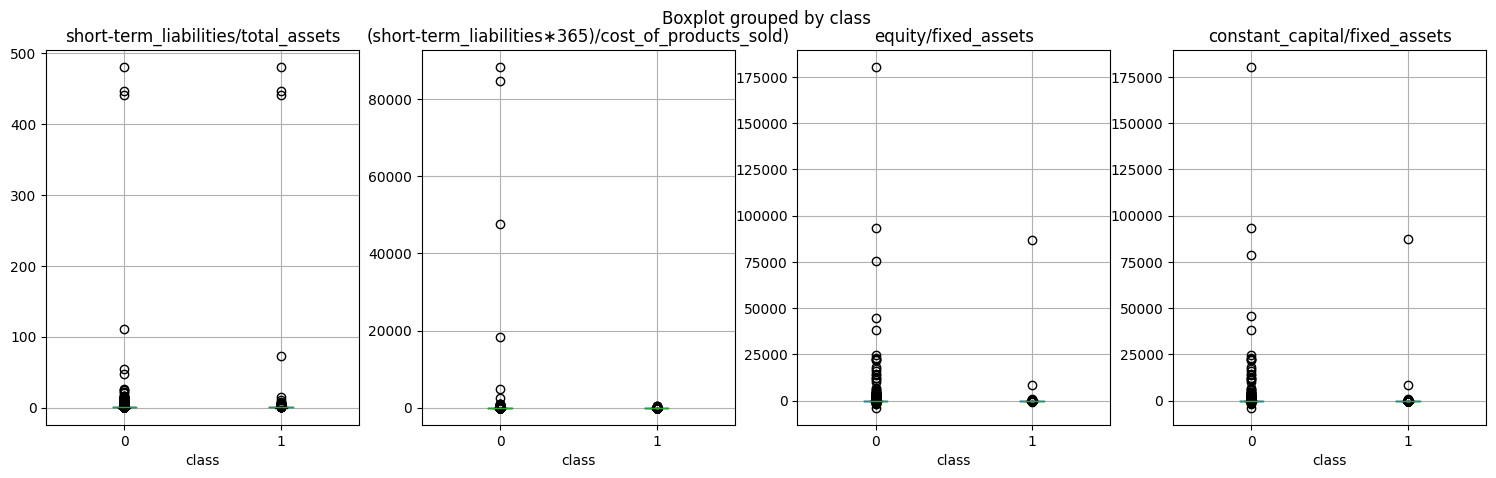

In [41]:
continuous_cols = ['short-term_liabilities/total_assets','(short-term_liabilities∗365)/cost_of_products_sold)','equity/fixed_assets','constant_capital/fixed_assets']

fig, axes = plt.subplots(nrows=1, ncols=len(continuous_cols), figsize=(18, 5))

# Creating box plots for each continuous predictor against the Target Variable "class"
for col, ax in zip(continuous_cols, axes):
    polish_Dataset.boxplot(column=col, by='class', figsize=(5,5), vert=True, ax=ax)
    ax.set_title(col)
plt.show()

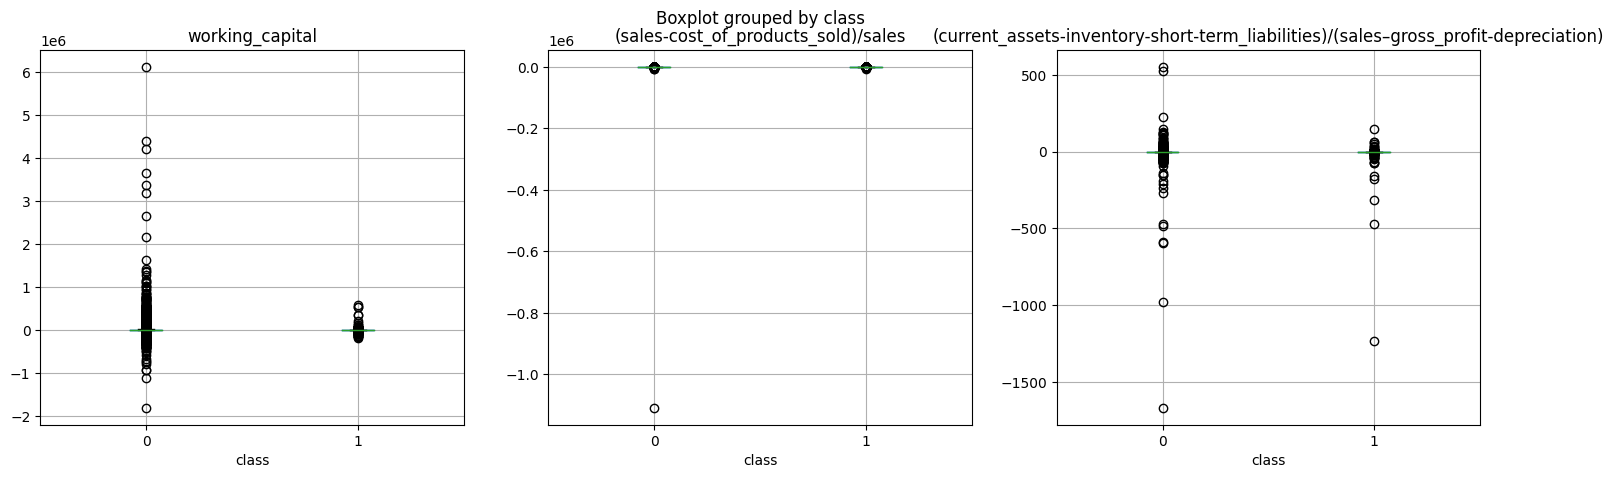

In [42]:
continuous_cols = ['working_capital','(sales-cost_of_products_sold)/sales','(current_assets-inventory-short-term_liabilities)/(sales–gross_profit-depreciation)']

fig, axes = plt.subplots(nrows=1, ncols=len(continuous_cols), figsize=(18, 5))

# Creating box plots for each continuous predictor against the Target Variable "class"
for col, ax in zip(continuous_cols, axes):
    polish_Dataset.boxplot(column=col, by='class', figsize=(5,5), vert=True, ax=ax)
    ax.set_title(col)
plt.show()

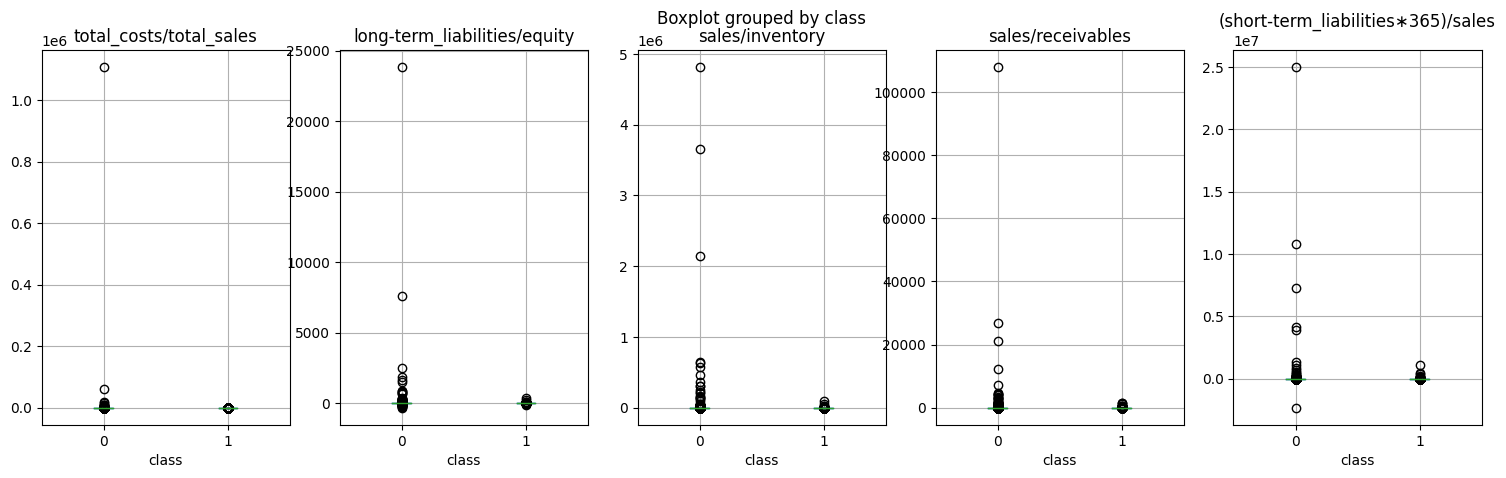

In [43]:
continuous_cols = ['total_costs/total_sales','long-term_liabilities/equity','sales/inventory','sales/receivables','(short-term_liabilities∗365)/sales']
fig, axes = plt.subplots(nrows=1, ncols=len(continuous_cols), figsize=(18, 5))

# Creating box plots for each continuous predictor against the Target Variable "class"
for col, ax in zip(continuous_cols, axes):
    polish_Dataset.boxplot(column=col, by='class', figsize=(5,5), vert=True, ax=ax)
    ax.set_title(col)
plt.show()

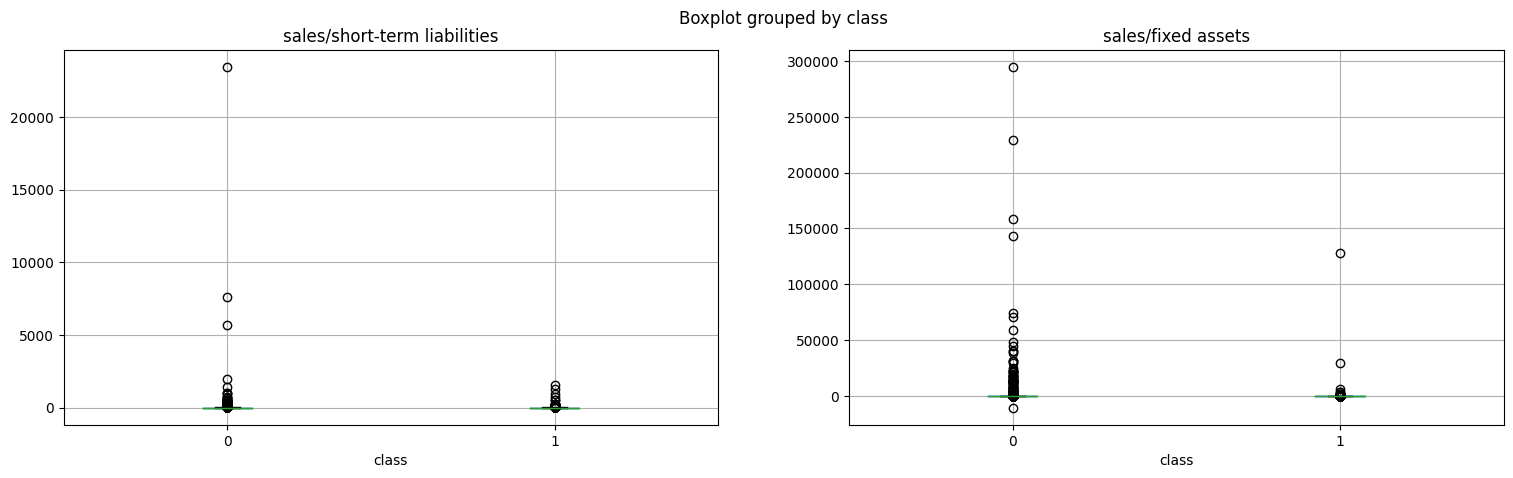

In [44]:
continuous_cols = ['sales/short-term liabilities','sales/fixed assets']
fig, axes = plt.subplots(nrows=1, ncols=len(continuous_cols), figsize=(18, 5))

# Creating box plots for each continuous predictor against the Target Variable "class"
for col, ax in zip(continuous_cols, axes):
    polish_Dataset.boxplot(column=col, by='class', figsize=(5,5), vert=True, ax=ax)
    ax.set_title(col)
plt.show()

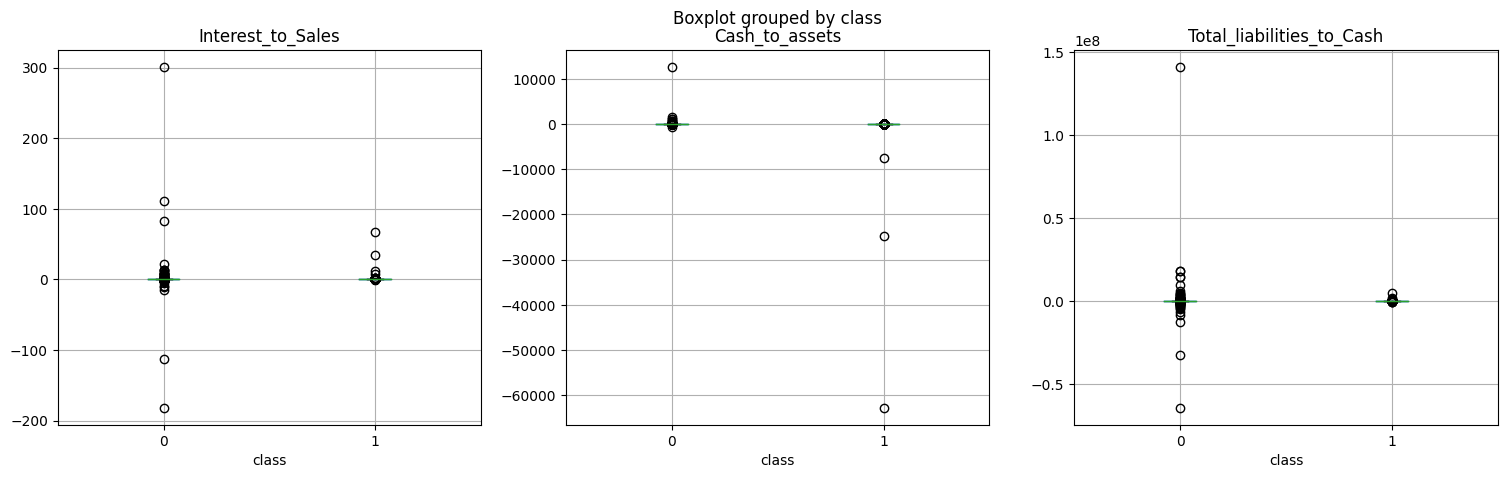

In [45]:
continuous_cols = ['Interest_to_Sales','Cash_to_assets','Total_liabilities_to_Cash']
fig, axes = plt.subplots(nrows=1, ncols=len(continuous_cols), figsize=(18, 5))

# Creating box plots for each continuous predictor against the Target Variable "class"
for col, ax in zip(continuous_cols, axes):
    polish_Dataset.boxplot(column=col, by='class', figsize=(5,5), vert=True, ax=ax)
    ax.set_title(col)
plt.show()

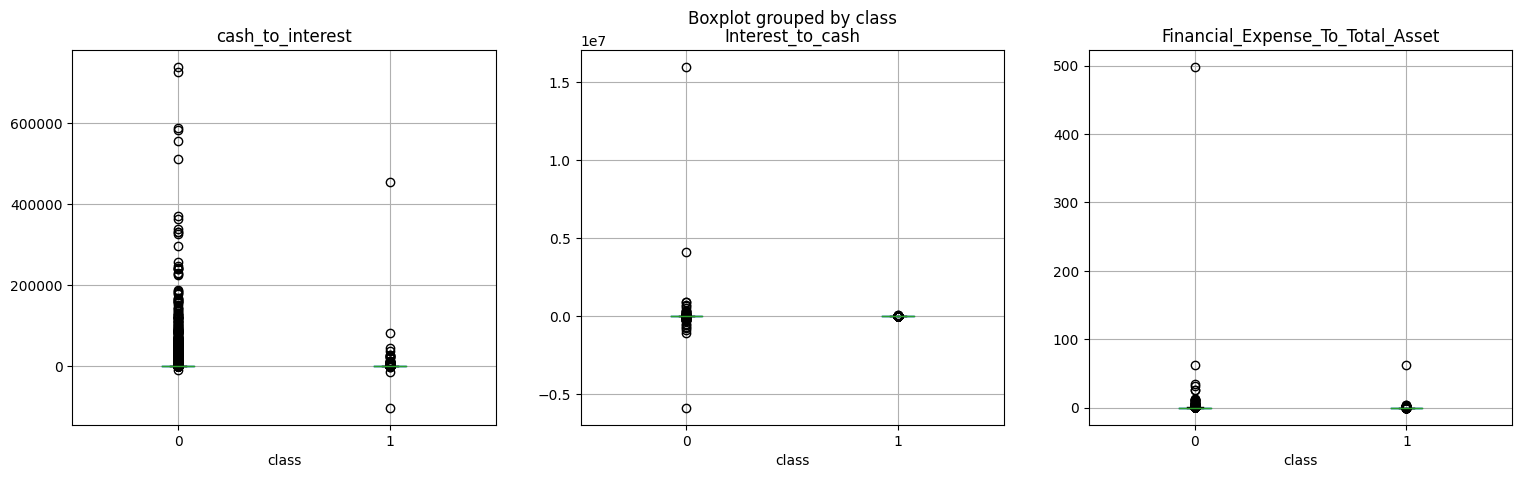

In [46]:
continuous_cols = ['cash_to_interest','Interest_to_cash','Financial_Expense_To_Total_Asset']
fig, axes = plt.subplots(nrows=1, ncols=len(continuous_cols), figsize=(18, 5))

# Creating box plots for each continuous predictor against the Target Variable "class"
for col, ax in zip(continuous_cols, axes):
    polish_Dataset.boxplot(column=col, by='class', figsize=(5,5), vert=True, ax=ax)
    ax.set_title(col)
plt.show()

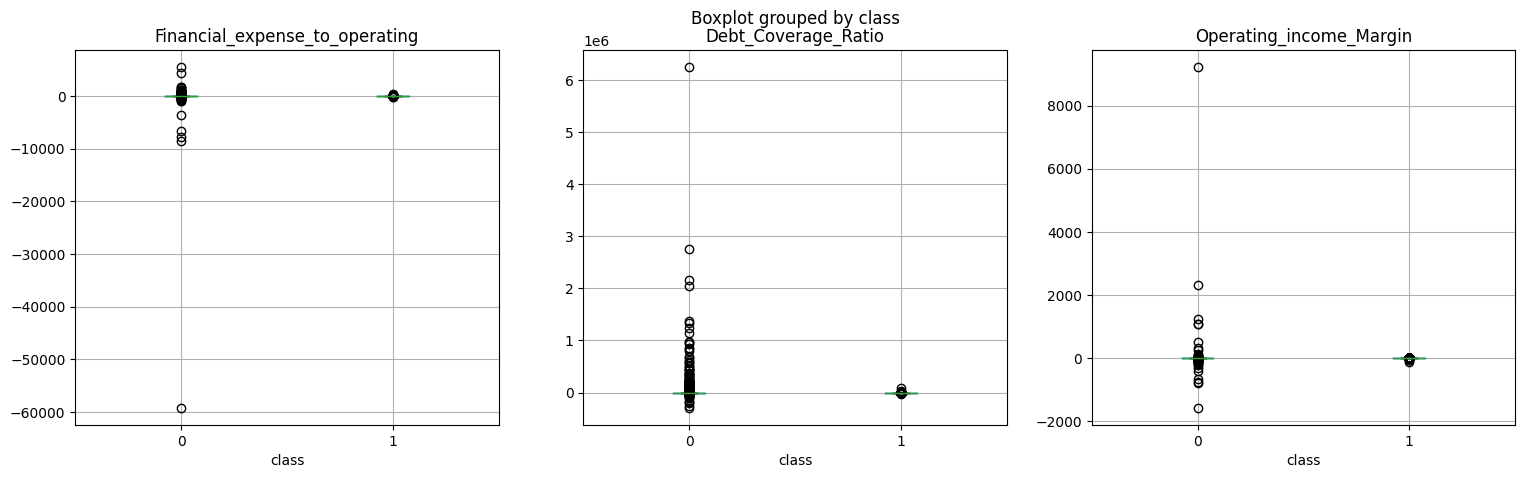

In [47]:
continuous_cols = ['Financial_expense_to_operating','Debt_Coverage_Ratio','Operating_income_Margin']
fig, axes = plt.subplots(nrows=1, ncols=len(continuous_cols), figsize=(18, 5))

# Creating box plots for each continuous predictor against the Target Variable "class"
for col, ax in zip(continuous_cols, axes):
    polish_Dataset.boxplot(column=col, by='class', figsize=(5,5), vert=True, ax=ax)
    ax.set_title(col)
plt.show()

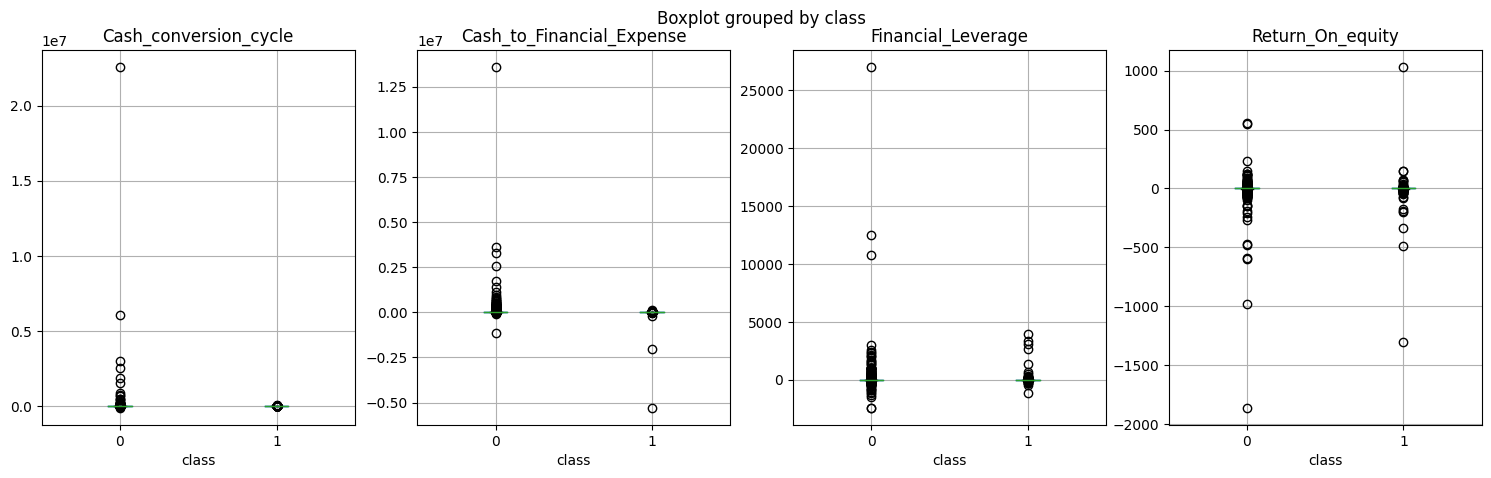

In [48]:
continuous_cols = ['Cash_conversion_cycle','Cash_to_Financial_Expense','Financial_Leverage','Return_On_equity']
fig, axes = plt.subplots(nrows=1, ncols=len(continuous_cols), figsize=(18, 5))

# Creating box plots for each continuous predictor against the Target Variable "class"
for col, ax in zip(continuous_cols, axes):
    polish_Dataset.boxplot(column=col, by='class', figsize=(5,5), vert=True, ax=ax)
    ax.set_title(col)
plt.show()


In [49]:
polish_Dataset.isnull().any()

year                                                                                   False
net_profit/total assets                                                                 True
Total_Liabilities/total_assets                                                          True
Working_Capital_to_Total_Assets_Ratio                                                   True
Current_Ratio                                                                           True
Defensive_Interval_Ratio                                                                True
Retained_Earnings_to_Total_Assets_Ratio                                                 True
Operating_Income_to_Total_Asset_ratio                                                   True
book_value_of_equity/total_liabilities                                                  True
Asset_Turnover_Ratio                                                                    True
Equity_to_Total_Assets_Ratio                                          

In [50]:
#number of null
Features_Null=(polish_Dataset.isnull().sum())
Features_Null

year                                                                                       0
net_profit/total assets                                                                    8
Total_Liabilities/total_assets                                                             8
Working_Capital_to_Total_Assets_Ratio                                                      8
Current_Ratio                                                                            134
Defensive_Interval_Ratio                                                                  89
Retained_Earnings_to_Total_Assets_Ratio                                                    8
Operating_Income_to_Total_Asset_ratio                                                      8
book_value_of_equity/total_liabilities                                                    94
Asset_Turnover_Ratio                                                                       9
Equity_to_Total_Assets_Ratio                                          

In [51]:
polish_Dataset.corr()

year  \
year                                                                                 1.000000   
net_profit/total assets                                                             -0.004052   
Total_Liabilities/total_assets                                                      -0.004834   
Working_Capital_to_Total_Assets_Ratio                                                0.004653   
Current_Ratio                                                                        0.004548   
Defensive_Interval_Ratio                                                             0.001471   
Retained_Earnings_to_Total_Assets_Ratio                                             -0.000409   
Operating_Income_to_Total_Asset_ratio                                               -0.019313   
book_value_of_equity/total_liabilities                                               0.005614   
Asset_Turnover_Ratio                                                                -0.017984   
Equity_to_Total_Assets_Ratio                                                        -0.021114   
gross_profit+extraordinary_items+financial_expenses)/total                          -0.019025   
gross_profit/short-term_liabilities                                                 -0.000910   
(gross_profit+depreciation)/sales                                                   -0.006130   
(gross_profit+interest)/total_assets                                                -0.019312   
(total_liabilities∗365)/(gross_profit+depreciation)                                  0.002806   
(gross profit+depreciation)/total_liabilities                                       -0.000490   
total_assets/total_liabilities                                                       0.005595   
gross_profit/total_assets                                                           -0.018880   
gross_profit/sales                                                                  -0.004937   
(inventory∗365)/sales                                                               -0.007237   
sales(n)/sales(n-1)                                                                 -0.009455   
profit_on_operating_activities/total_assets                                         -0.016220   
net_profit/sales                                                                    -0.005043   
gross_profit(in3years)/total_assets                                                 -0.011841   
(equity-share_capital)/total_assets                                                 -0.016473   
(net_profit+depreciation)/total_liabilities                                         -0.000569   
profit_on_operating_activities/financial_expenses                                   -0.006109   
working_capital/fixed_assets                                                         0.013252   
logarithm_of_total_assets                                                           -0.015942   
(total_liabilities-cash)/sales                                                      -0.007532   
(gross_profit+interest)/sales                                                       -0.004699   
(current_liabilities∗365)/cost_of_products_sold                                      0.001381   
operating_expenses/short-term_liabilities                                           -0.000124   
operating_expenses_/_total_liabilities                                              -0.000522   
profit_on_sales/total_assets                                                        -0.018639   
total_sales/total_assets                                                            -0.017789   
(current_assets-inventories)/long-term_liabilities                                  -0.006016   
constant_capital/total_assets                                                       -0.020650   
profit_on_sales/sales                                                               -0.005304   
(current_assets-inventory-receivables)/short-term liabilities                        0.009845   
total_liabiliti

<function matplotlib.pyplot.show(close=None, block=None)>

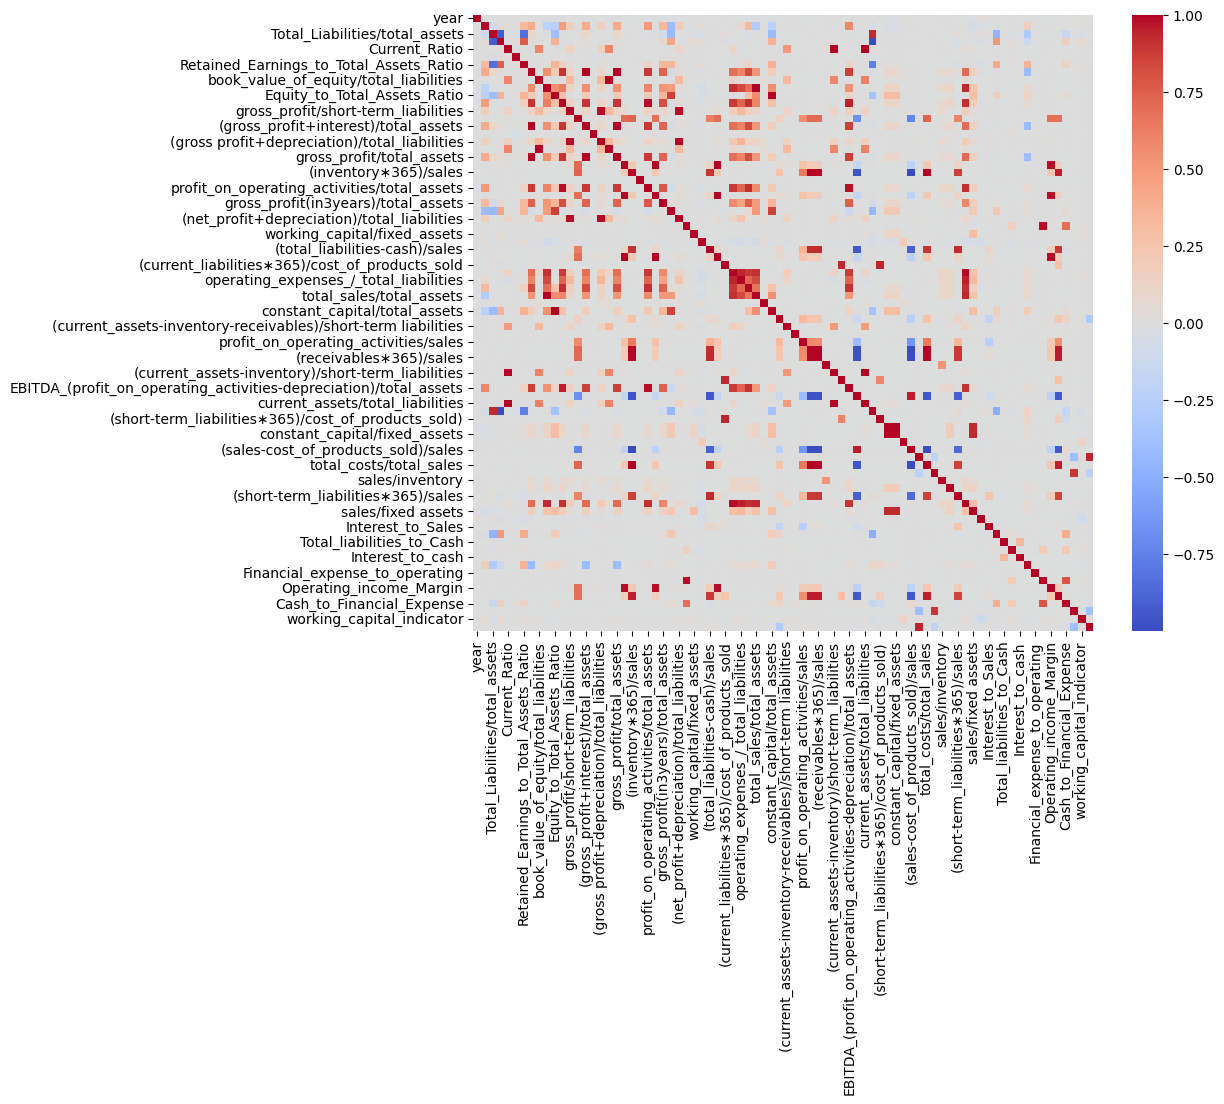

In [52]:
correlation_matrix = polish_Dataset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.show

In [53]:
# based on initial observations, there are many extermine outliers in this dataset. The outliers are extreme in the 0 dataset.
#I will review each attribute and based on industry and financial experience will narrow the feature selections,
#before conducting any cleaning.

#Approach



##hypothesis testing (Logistic Regression & Random Forest)

In [54]:
from scipy.stats import ttest_ind
import statsmodels.api as sm

# Handle missing values by dropping rows with missing data
polish_Dataset_clean = polish_Dataset.dropna()

# Ensure 'class' is categorical
polish_Dataset_clean['class'] = polish_Dataset_clean['class'].astype('category')

# List of continuous columns
continuous_columns = [
    'net_profit/total assets', 'Total_Liabilities/total_assets', 'Working_Capital_to_Total_Assets_Ratio',
    'Current_Ratio', 'Defensive_Interval_Ratio', 'Retained_Earnings_to_Total_Assets_Ratio',
    'Operating_Income_to_Total_Asset_ratio', 'book_value_of_equity/total_liabilities', 'Asset_Turnover_Ratio',
    'Equity_to_Total_Assets_Ratio', 'gross_profit+extraordinary_items+financial_expenses)/total',
    'gross_profit/short-term_liabilities', '(gross_profit+depreciation)/sales',
    '(gross_profit+interest)/total_assets', '(total_liabilities∗365)/(gross_profit+depreciation)',
    '(gross profit+depreciation)/total_liabilities', 'total_assets/total_liabilities',
    'gross_profit/total_assets', 'gross_profit/sales', '(inventory∗365)/sales', 'sales(n)/sales(n-1)',
    'profit_on_operating_activities/total_assets', 'net_profit/sales', 'gross_profit(in3years)/total_assets',
    '(equity-share_capital)/total_assets', '(net_profit+depreciation)/total_liabilities',
    'profit_on_operating_activities/financial_expenses', 'working_capital/fixed_assets',
    'logarithm_of_total_assets', '(total_liabilities-cash)/sales', '(gross_profit+interest)/sales',
    '(current_liabilities∗365)/cost_of_products_sold', 'operating_expenses/short-term_liabilities',
    'operating_expenses_/_total_liabilities', 'profit_on_sales/total_assets', 'total_sales/total_assets',
    '(current_assets-inventories)/long-term_liabilities', 'constant_capital/total_assets',
    'profit_on_sales/sales', '(current_assets-inventory-receivables)/short-term liabilities',
    'total_liabilities/((profit_on_operating_activities+depreciation)∗(12/365))',
    'profit_on_operating_activities/sales', 'rotation_receivables+inventory_turnover_in_days',
    '(receivables∗365)/sales', 'net_profit/inventory', '(current_assets-inventory)/short-term_liabilities',
    '(inventory∗365)/cost_of_products_sold', 'EBITDA_(profit_on_operating_activities-depreciation)/total_assets',
    'EBITDA_(profit_on_operating_activities-depreciation)/sales', 'current_assets/total_liabilities',
    'short-term_liabilities/total_assets', '(short-term_liabilities∗365)/cost_of_products_sold)',
    'equity/fixed_assets', 'constant_capital/fixed_assets', 'working_capital', '(sales-cost_of_products_sold)/sales',
    '(current_assets-inventory-short-term_liabilities)/(sales–gross_profit-depreciation)',
    'total_costs/total_sales', 'long-term_liabilities/equity', 'sales/inventory', 'sales/receivables',
    '(short-term_liabilities∗365)/sales', 'sales/short-term liabilities', 'sales/fixed assets',
    'Interest_to_Sales', 'Cash_to_assets', 'Total_liabilities_to_Cash', 'cash_to_interest', 'Interest_to_cash',
    'Financial_Expense_To_Total_Asset', 'Financial_expense_to_operating', 'Debt_Coverage_Ratio',
    'Operating_income_Margin', 'Cash_conversion_cycle', 'Cash_to_Financial_Expense', 'Financial_Leverage',
    'Return_On_equity'
]




<ipython-input-54-10a95daf9452>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  polish_Dataset_clean['class'] = polish_Dataset_clean['class'].astype('category')


###Logistic regression testing

In [55]:

# Perform logistic regression

for col in continuous_columns:
    X = polish_Dataset_clean[col]
    y = polish_Dataset_clean['class'].cat.codes  # Convert categorical 'class' to numerical codes

    # Add constant to X
    X = sm.add_constant(X)

    # Fit logistic regression model
    model = sm.Logit(y, X)
    result = model.fit()

  # Print summary of logistic regression
  #  print(f"Logistic Regression Summary for {col}:")
  #  print(result.summary())

    # Check p-value and add note
    print(f'Summary for {col}: ')
    p_val = result.pvalues[col]
    print(f"  P-value: {p_val}")

    if p_val <= 0.05:
        print("  Note: P-value is less than or equal to 0.05, indicating a significant difference.\n")
    else:
        print("  Note: P-value is greater than 0.05, indicating no significant difference.\n")



Optimization terminated successfully.
         Current function value: 0.180916
         Iterations 7
Summary for net_profit/total assets: 
  P-value: 2.8839233163618935e-27
  Note: P-value is less than or equal to 0.05, indicating a significant difference.

Optimization terminated successfully.
         Current function value: 0.183148
         Iterations 7
Summary for Total_Liabilities/total_assets: 
  P-value: 2.954968663776984e-19
  Note: P-value is less than or equal to 0.05, indicating a significant difference.

Optimization terminated successfully.
         Current function value: 0.181819
         Iterations 7
Summary for Working_Capital_to_Total_Assets_Ratio: 
  P-value: 5.3211203686323745e-24
  Note: P-value is less than or equal to 0.05, indicating a significant difference.

Optimization terminated successfully.
         Current function value: 0.178788
         Iterations 9
Summary for Current_Ratio: 
  P-value: 1.409759677433866e-20
  Note: P-value is less than or equal to

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))



  Note: P-value is greater than 0.05, indicating no significant difference.

Optimization terminated successfully.
         Current function value: 0.187235
         Iterations 7
Summary for Financial_Leverage: 
  P-value: 0.027951106432942494
  Note: P-value is less than or equal to 0.05, indicating a significant difference.

Optimization terminated successfully.
         Current function value: 0.187159
         Iterations 7
Summary for Return_On_equity: 
  P-value: 0.008928828115999673
  Note: P-value is less than or equal to 0.05, indicating a significant difference.



###Random Forest

                                                   importance
Cash_to_assets                                       0.091916
cash_to_interest                                     0.069459
Total_liabilities_to_Cash                            0.060540
Cash_to_Financial_Expense                            0.055671
Interest_to_cash                                     0.037461
gross_profit(in3years)/total_assets                  0.031761
total_costs/total_sales                              0.021268
(current_assets-inventory)/short-term_liabilities    0.018589
logarithm_of_total_assets                            0.015406
(sales-cost_of_products_sold)/sales                  0.012982
constant_capital/fixed_assets                        0.012955
(net_profit+depreciation)/total_liabilities          0.012860
Interest_to_Sales                                    0.012508
(gross_profit+depreciation)/sales                    0.012068
working_capital                                      0.011907
constant

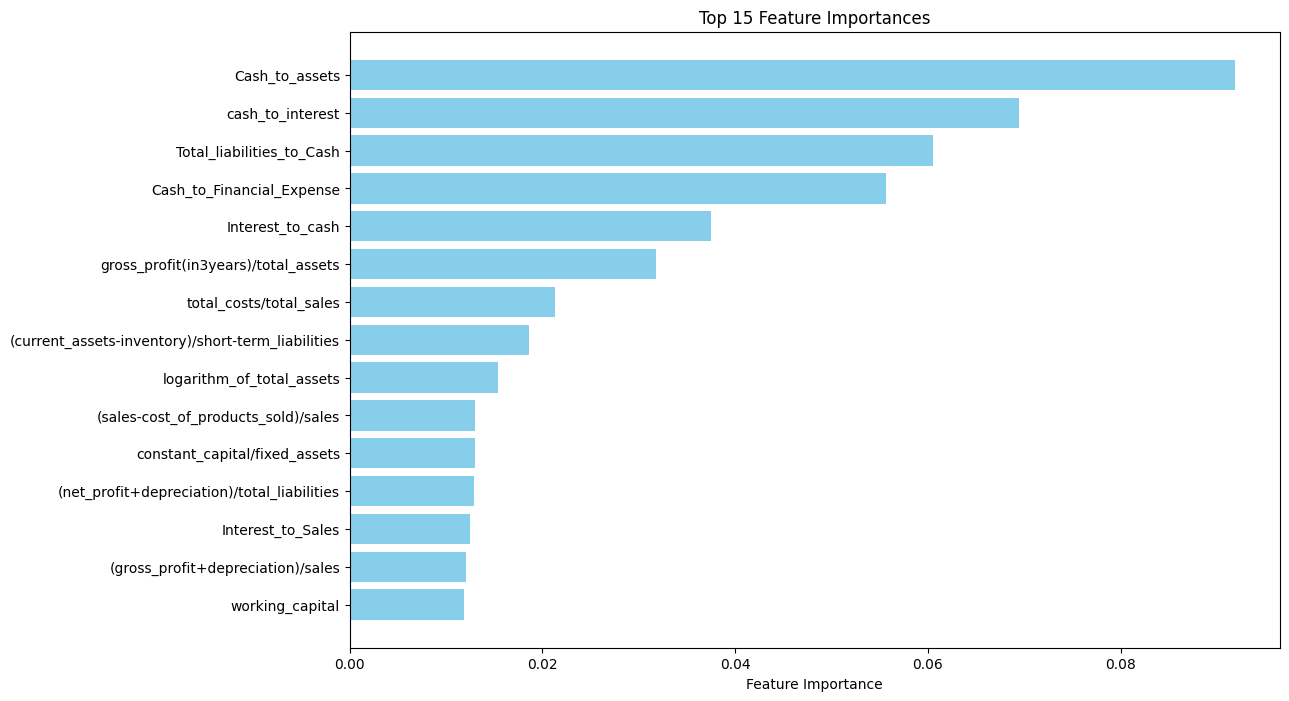

In [56]:
# Define features (X) and target (y)
X = polish_Dataset_clean.drop('class', axis=1)
y = polish_Dataset_clean['class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Extract feature importances
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index=X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

# Display the top 10 features
print(feature_importances.head(20))

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importances.index[:15], feature_importances['importance'][:15], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top 15 Feature Importances')
plt.gca().invert_yaxis()
plt.show()

###Outcome

Both contained similar features, where two additional appeared in the Logsitic regression ( sales(n)/sales(n-1) & (current assets - inventory-recievables) / (Short- term liabilies)) where identified and also considered for the new dataset.

##Testinh

##New feature selections for models

After careful analyzing all the features. The theme of selection came down to:
**Reason for companies to go bankrupt:**
1.	**Failure of Business Strategy:**
    a.	Lack of governance
      i.	Failure to understand key metrics can lead to bankruptcy.
    b.	Market trends
      i.	Failing to see what competitors are doing
      ii.	Market sentiment shifts and not adjusting
2.**Inefficient use of assets**
    a.	Management fails to generate income from assets
    b.	Holding inventory too long
    c.	Negative Working Capital
3.	**Too much Debt**
    a.	Debt used to pay for Working capital
    b.	Debt used to pay for equipment, plant
    c.	Operating profits can’t cover interest
4.**Not enough Cash flow**
    a.	Not enough cash on hand
    b.	Not collecting from account receivables
    c.	Sales are not enough to cover expenses
    d.	Cash conversation cycle is too long
    e.	Cash can’t cover interest
    f.	Days payable is too high

In [57]:
#this resulted in the folliwng:
#analysis and data cleaning will be done on this new dataset.
Bankrupt_model = polish_Dataset[['year',
    'Cash_to_assets',
    'cash_to_interest',
    'Total_liabilities_to_Cash',
    'Cash_to_Financial_Expense',
    'Interest_to_cash',
    'total_costs/total_sales',
    '(current_assets-inventory)/short-term_liabilities',
    'logarithm_of_total_assets',
    '(sales-cost_of_products_sold)/sales',
    'constant_capital/fixed_assets',
    'Interest_to_Sales',
    'working_capital',
    'constant_capital/total_assets',
    '(equity-share_capital)/total_assets',
    'sales(n)/sales(n-1)',
    'short-term_liabilities/total_assets','class']]
Bankrupt_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43405 entries, 0 to 43404
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype   
---  ------                                             --------------  -----   
 0   year                                               43405 non-null  int64   
 1   Cash_to_assets                                     43270 non-null  float64 
 2   cash_to_interest                                   23529 non-null  float64 
 3   Total_liabilities_to_Cash                          43238 non-null  float64 
 4   Cash_to_Financial_Expense                          37567 non-null  float64 
 5   Interest_to_cash                                   23511 non-null  float64 
 6   total_costs/total_sales                            43321 non-null  float64 
 7   (current_assets-inventory)/short-term_liabilities  43270 non-null  float64 
 8   logarithm_of_total_assets                          43397 non-null  float64 


<function matplotlib.pyplot.show(close=None, block=None)>

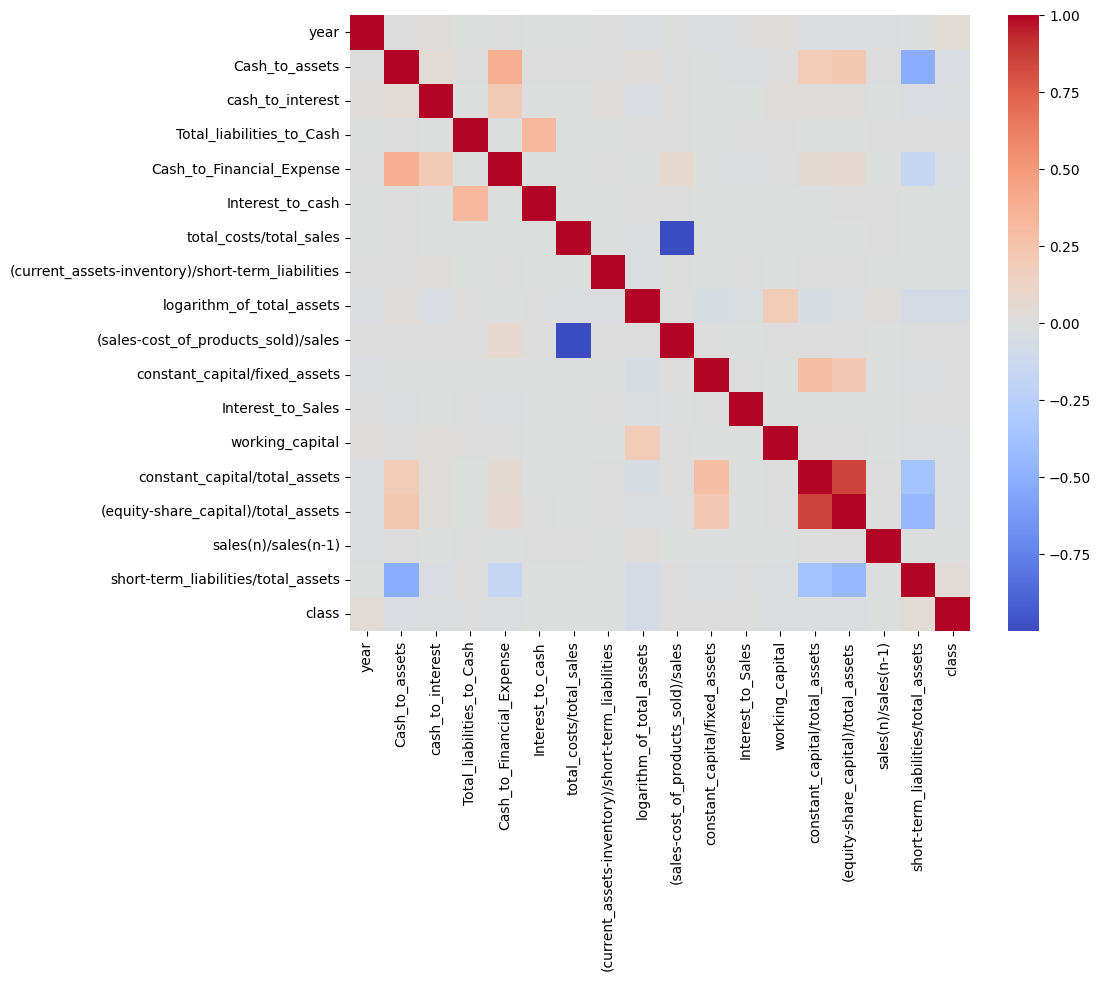

In [58]:
plt.figure(figsize=(10, 8))
sns.heatmap(Bankrupt_model.corr(), annot=False, cmap='coolwarm', fmt=".2f")
plt.show

In [59]:
pd.options.display.float_format = "{:.3f}".format
Bankrupt_model.describe()

year  Cash_to_assets  cash_to_interest  Total_liabilities_to_Cash  \
count 43405.000       43270.000         23529.000                  43238.000   
mean      2.940          -1.694          1535.972                   2881.205   
std       1.284         331.746         15145.109                 787900.726   
min       1.000      -62701.320       -103000.374              -64078999.678   
25%       2.000           0.006             0.322                      1.105   
50%       3.000           0.037             2.203                      6.574   
75%       4.000           0.130            21.143                     33.245   
max       5.000       12643.204        738251.408              140981668.045   

       Cash_to_Financial_Expense  Interest_to_cash  total_costs/total_sales  \
count                  37567.000         23511.000                43321.000   
mean                    1602.862           617.736                   30.026   
std                    84176.481        115662.865                 5334.454   
min                 -5282808.239      -5855701.082                 -198.690   
25%                        0.089             0.015                    0.875   
50%                        0.717             0.257                    0.951   
75%                        4.571             1.585                    0.993   
max                 13597750.957      15987106.466              1108300.000   

       (current_assets-inventory)/short-term_liabilities  logarithm_of_total_assets  \
count                                          43270.000                  43397.000   
mean                                               5.429                      4.005   
std                                              295.356                      0.827   
min                                             -101.260                     -0.886   
25%                                                0.607                      3.495   
50%                                                1.027                      4.014   
75%                                                1.911                      4.520   
max                                            53433.000                      9.698   

       (sales-cost_of_products_sold)/sales  constant_capital/fixed_assets  Interest_to_Sales  \
count                            43278.000                      42593.000          43277.000   
mean                               -26.220                         24.655              0.021   
std                               5327.862                       1220.884              1.949   
min                           -1108300.000                      -3828.900           -181.810   
25%                                  0.009                          0.956              0.000   
50%                                  0.053                          1.377              0.000   
75%                                  0.129                          2.370              0.007   
max                                293.150                     180440.000            301.300   

       working_capital  constant_capital/total_assets  (equity-share_capital)/total_assets  \
count        43404.000                      43397.000                            43397.000   
mean          7672.346                          0.724                                0.393   
std          70053.490                         14.749                               12.891   
min       -1810000.000                       -479.910                             -500.930   
25%             27.554                          0.420                                0.150   
50%           1088.350                          0.612                                0.385   
75%           4993.325                          0.772                                0.611   
max        6120000.000                       1099.500                             1353.300   

       sales(n)/sales(n-1)  short-term_liabilities/total_assets  
count           

In [ ]:
#exterime outliers are detected with the first analysis. will use a range with a multiper to remove the exterme outliers.

In [60]:
Bankrupt_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43405 entries, 0 to 43404
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype   
---  ------                                             --------------  -----   
 0   year                                               43405 non-null  int64   
 1   Cash_to_assets                                     43270 non-null  float64 
 2   cash_to_interest                                   23529 non-null  float64 
 3   Total_liabilities_to_Cash                          43238 non-null  float64 
 4   Cash_to_Financial_Expense                          37567 non-null  float64 
 5   Interest_to_cash                                   23511 non-null  float64 
 6   total_costs/total_sales                            43321 non-null  float64 
 7   (current_assets-inventory)/short-term_liabilities  43270 non-null  float64 
 8   logarithm_of_total_assets                          43397 non-null  float64 


In [61]:
#adjusting for outliers
numeric_cols = Bankrupt_model.select_dtypes(include=[float]).columns
numeric_cols

Index(['Cash_to_assets', 'cash_to_interest', 'Total_liabilities_to_Cash',
       'Cash_to_Financial_Expense', 'Interest_to_cash', 'total_costs/total_sales',
       '(current_assets-inventory)/short-term_liabilities', 'logarithm_of_total_assets',
       '(sales-cost_of_products_sold)/sales', 'constant_capital/fixed_assets', 'Interest_to_Sales',
       'working_capital', 'constant_capital/total_assets', '(equity-share_capital)/total_assets',
       'sales(n)/sales(n-1)', 'short-term_liabilities/total_assets'],
      dtype='object')

In [63]:
#adjusting for outliers
numeric_cols = Bankrupt_model.select_dtypes(include=[float, int]).columns
# Calculate Q1, Q3, and IQR for each column
Q1 = Bankrupt_model[numeric_cols].quantile(0.25)
Q3 = Bankrupt_model[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a boolean DataFrame indicating whether each value is an outlier
outliers = (Bankrupt_model[numeric_cols] < lower_bound) | (Bankrupt_model[numeric_cols] > upper_bound)

# Filter rows that contain any outliers
rows_with_outliers = outliers.any(axis=1)
Bankruptcleaned_model = Bankrupt_model[~rows_with_outliers]

Bankruptcleaned_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12089 entries, 4 to 43392
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype   
---  ------                                             --------------  -----   
 0   year                                               12089 non-null  int64   
 1   Cash_to_assets                                     12076 non-null  float64 
 2   cash_to_interest                                   5604 non-null   float64 
 3   Total_liabilities_to_Cash                          12074 non-null  float64 
 4   Cash_to_Financial_Expense                          11383 non-null  float64 
 5   Interest_to_cash                                   5603 non-null   float64 
 6   total_costs/total_sales                            12078 non-null  float64 
 7   (current_assets-inventory)/short-term_liabilities  12075 non-null  float64 
 8   logarithm_of_total_assets                          12087 non-null  float64 
 9   

In [64]:
print(len(Bankrupt_model))
print(len(Bankruptcleaned_model))

43405
12089


In [65]:
Bankruptcleaned_model.describe()

year  Cash_to_assets  cash_to_interest  Total_liabilities_to_Cash  \
count 12089.000       12076.000          5604.000                  12074.000   
mean      2.824           0.055             5.644                     16.284   
std       1.298           0.065             7.740                     21.502   
min       1.000          -0.179           -30.845                    -46.967   
25%       2.000           0.015             1.304                      3.921   
50%       3.000           0.036             3.044                     10.622   
75%       4.000           0.078             6.905                     25.880   
max       5.000           0.315            52.086                     81.439   

       Cash_to_Financial_Expense  Interest_to_cash  total_costs/total_sales  \
count                  11383.000          5603.000                12078.000   
mean                       1.550             0.540                    0.953   
std                        2.266             0.644                    0.071   
min                       -6.603            -2.125                    0.700   
25%                        0.194             0.136                    0.917   
50%                        0.675             0.307                    0.964   
75%                        1.913             0.712                    0.993   
max                       11.280             3.930                    1.168   

       (current_assets-inventory)/short-term_liabilities  logarithm_of_total_assets  \
count                                          12075.000                  12087.000   
mean                                               1.056                      4.012   
std                                                0.661                      0.568   
min                                               -0.343                      1.959   
25%                                                0.611                      3.660   
50%                                                0.888                      4.077   
75%                                                1.311                      4.389   
max                                                3.862                      6.058   

       (sales-cost_of_products_sold)/sales  constant_capital/fixed_assets  Interest_to_Sales  \
count                            12078.000                      11991.000          12078.000   
mean                                 0.050                          1.413              0.003   
std                                  0.074                          0.739              0.005   
min                                 -0.170                         -0.957             -0.011   
25%                                  0.008                          0.953              0.000   
50%                                  0.039                          1.226              0.000   
75%                                  0.087                          1.696              0.006   
max                                  0.308                          4.490              0.018   

       working_capital  constant_capital/total_assets  (equity-share_capital)/total_assets  \
count        12089.000                      12087.000                            12087.000   
mean          2209.843                          0.564                                0.390   
std           3466.470                          0.204                                0.255   
min          -7414.000                         -0.097                               -0.532   
25%             95.367                          0.433                                0.209   
50%           1184.100                          0.585                                0.403   
75%           3965.200                          0.718                                0.580   
max          12441.000                          1.170                                1.000   

       sales(n)/sales(n-1)  short-term_liabilities/total_assets  
count           

In [ ]:
#certain columns should not be less than zero. if it is zero, that data point is meaningless

In [66]:
Bankruptcleaned_model.corr()

year  Cash_to_assets  cash_to_interest  \
year                                               1.000          -0.024            -0.001   
Cash_to_assets                                    -0.024           1.000             0.495   
cash_to_interest                                  -0.001           0.495             1.000   
Total_liabilities_to_Cash                          0.003          -0.289            -0.353   
Cash_to_Financial_Expense                         -0.006           0.369             0.490   
Interest_to_cash                                  -0.013          -0.389            -0.411   
total_costs/total_sales                            0.062          -0.111            -0.059   
(current_assets-inventory)/short-term_liabilities  0.012           0.381             0.285   
logarithm_of_total_assets                          0.026          -0.136            -0.036   
(sales-cost_of_products_sold)/sales               -0.066           0.116             0.059   
constant_capital/fixed_assets                      0.015           0.224             0.172   
Interest_to_Sales                                  0.018          -0.056            -0.381   
working_capital                                    0.034           0.159             0.110   
constant_capital/total_assets                      0.016           0.049             0.107   
(equity-share_capital)/total_assets                0.014           0.126             0.145   
sales(n)/sales(n-1)                                0.015           0.019             0.018   
short-term_liabilities/total_assets               -0.023          -0.054            -0.107   
class                                              0.024          -0.077            -0.092   

                                                   Total_liabilities_to_Cash  \
year                                                                   0.003   
Cash_to_assets                                                        -0.289   
cash_to_interest                                                      -0.353   
Total_liabilities_to_Cash                                              1.000   
Cash_to_Financial_Expense                                             -0.125   
Interest_to_cash                                                       0.721   
total_costs/total_sales                                                0.029   
(current_assets-inventory)/short-term_liabilities                     -0.225   
logarithm_of_total_assets                                             -0.066   
(sales-cost_of_products_sold)/sales                                   -0.008   
constant_capital/fixed_assets                                         -0.076   
Interest_to_Sales                                                      0.198   
working_capital                                                       -0.133   
constant_capital/total_assets                                         -0.184   
(equity-share_capital)/total_assets                                   -0.222   
sales(n)/sales(n-1)                                                    0.053   
short-term_liabilities/total_assets                                    0.210   
class                                                                 -0.033   

                                                   Cash_to_Financial_Expense  Interest_to_cash  \
year                                                                  -0.006            -0.013   
Cash_to_assets                                                         0.369            -0.389   
cash_to_interest                                                       0.490            -0.411   
Total_liabilities_to_Cash                                             -0.125             0.721   
Cash_to_Financial_Expense                                              1.000            -0.453   
Interest_to_cash                                                      -0.453             1.000   
total_costs/total_sales                                   

In [67]:
for column in Bankruptcleaned_model.columns:
  countzero = (Bankruptcleaned_model[column] == 0).sum()
  print(f"{column} has {countzero} zero values")

year has 0 zero values
Cash_to_assets has 2 zero values
cash_to_interest has 1 zero values
Total_liabilities_to_Cash has 4 zero values
Cash_to_Financial_Expense has 2 zero values
Interest_to_cash has 0 zero values
total_costs/total_sales has 0 zero values
(current_assets-inventory)/short-term_liabilities has 0 zero values
logarithm_of_total_assets has 0 zero values
(sales-cost_of_products_sold)/sales has 2 zero values
constant_capital/fixed_assets has 1 zero values
Interest_to_Sales has 6473 zero values
working_capital has 2 zero values
constant_capital/total_assets has 1 zero values
(equity-share_capital)/total_assets has 11 zero values
sales(n)/sales(n-1) has 0 zero values
short-term_liabilities/total_assets has 12 zero values
class has 11593 zero values


In [68]:
length=len(Bankruptcleaned_model['class'])
print(f"total number of rows is: {length}")

total number of rows is: 12089


In [69]:
nulls=Bankruptcleaned_model.isnull().sum()

In [70]:
nulls

year                                                    0
Cash_to_assets                                         13
cash_to_interest                                     6485
Total_liabilities_to_Cash                              15
Cash_to_Financial_Expense                             706
Interest_to_cash                                     6486
total_costs/total_sales                                11
(current_assets-inventory)/short-term_liabilities      14
logarithm_of_total_assets                               2
(sales-cost_of_products_sold)/sales                    11
constant_capital/fixed_assets                          98
Interest_to_Sales                                      11
working_capital                                         0
constant_capital/total_assets                           2
(equity-share_capital)/total_assets                     2
sales(n)/sales(n-1)                                  1439
short-term_liabilities/total_assets                     2
class         

In [71]:
percentage_nulls=nulls/length*100
percentage_nulls
#to determine % of null per attribute. anything over 10% will be removed. The remainder will use random forest imputation.

year                                                 0.000
Cash_to_assets                                       0.108
cash_to_interest                                    53.644
Total_liabilities_to_Cash                            0.124
Cash_to_Financial_Expense                            5.840
Interest_to_cash                                    53.652
total_costs/total_sales                              0.091
(current_assets-inventory)/short-term_liabilities    0.116
logarithm_of_total_assets                            0.017
(sales-cost_of_products_sold)/sales                  0.091
constant_capital/fixed_assets                        0.811
Interest_to_Sales                                    0.091
working_capital                                      0.000
constant_capital/total_assets                        0.017
(equity-share_capital)/total_assets                  0.017
sales(n)/sales(n-1)                                 11.903
short-term_liabilities/total_assets                  0.0

In [73]:
percentage_nulls[percentage_nulls>6]

cash_to_interest      53.644
Interest_to_cash      53.652
sales(n)/sales(n-1)   11.903
dtype: float64

In [74]:
Bankruptcleaned_model.drop(['cash_to_interest',#'Cash_to_Financial_Expense',
                            'Interest_to_cash','sales(n)/sales(n-1)'],axis=1,inplace=True)

<ipython-input-74-5a5d6beaccf9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bankruptcleaned_model.drop(['cash_to_interest',#'Cash_to_Financial_Expense',


In [75]:
Bankruptcleaned_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12089 entries, 4 to 43392
Data columns (total 16 columns):
 #   Column                                             Non-Null Count  Dtype   
---  ------                                             --------------  -----   
 0   year                                               12089 non-null  int64   
 1   Cash_to_assets                                     12076 non-null  float64 
 2   Total_liabilities_to_Cash                          12074 non-null  float64 
 3   Cash_to_Financial_Expense                          11383 non-null  float64 
 4   total_costs/total_sales                            12078 non-null  float64 
 5   (current_assets-inventory)/short-term_liabilities  12075 non-null  float64 
 6   logarithm_of_total_assets                          12087 non-null  float64 
 7   (sales-cost_of_products_sold)/sales                12078 non-null  float64 
 8   constant_capital/fixed_assets                      11991 non-null  float64 
 9   

In [76]:
 nulls=Bankruptcleaned_model.isnull().sum()
 nulls

year                                                    0
Cash_to_assets                                         13
Total_liabilities_to_Cash                              15
Cash_to_Financial_Expense                             706
total_costs/total_sales                                11
(current_assets-inventory)/short-term_liabilities      14
logarithm_of_total_assets                               2
(sales-cost_of_products_sold)/sales                    11
constant_capital/fixed_assets                          98
Interest_to_Sales                                      11
working_capital                                         0
constant_capital/total_assets                           2
(equity-share_capital)/total_assets                     2
sales(n)/sales(n-1)                                  1439
short-term_liabilities/total_assets                     2
class                                                   0
dtype: int64

In [78]:
nulls/length*100

year                                                 0.000
Cash_to_assets                                       0.108
Total_liabilities_to_Cash                            0.124
Cash_to_Financial_Expense                            5.840
total_costs/total_sales                              0.091
(current_assets-inventory)/short-term_liabilities    0.116
logarithm_of_total_assets                            0.017
(sales-cost_of_products_sold)/sales                  0.091
constant_capital/fixed_assets                        0.811
Interest_to_Sales                                    0.091
working_capital                                      0.000
constant_capital/total_assets                        0.017
(equity-share_capital)/total_assets                  0.017
sales(n)/sales(n-1)                                 11.903
short-term_liabilities/total_assets                  0.017
class                                                0.000
dtype: float64

In [79]:
#using 3 different methods of imputation to see which one works best
Bankrupt_modelMMM=Bankruptcleaned_model.copy()
#Bankrupt_modelKNN=Bankruptcleaned_model.copy()
Bankrupt_modelRF=Bankruptcleaned_model.copy()

In [80]:
# Columns with missing values in your bankrupt_model dataset
columns_with_missing = [
    'Cash_to_assets',
    'Total_liabilities_to_Cash',
    'Cash_to_Financial_Expense',
    'total_costs/total_sales',
    '(current_assets-inventory)/short-term_liabilities',
    'logarithm_of_total_assets',
    '(sales-cost_of_products_sold)/sales',
    'constant_capital/fixed_assets',
    'Interest_to_Sales',
    'working_capital',
    'constant_capital/total_assets',
    '(equity-share_capital)/total_assets',
    'sales(n)/sales(n-1)',
    'short-term_liabilities/total_assets'
]



In [81]:
# Perform imputation (example using SimpleImputer with mean)
imputer = SimpleImputer(strategy='mean')
Bankrupt_modelMMM[columns_with_missing] = imputer.fit_transform(Bankrupt_modelMMM[columns_with_missing])



In [82]:
#performing imputation with KNN
imputer=KNNImputer(n_neighbors=5)
Bankrupt_modelKNN[columns_with_missing] = imputer.fit_transform(Bankrupt_modelKNN[columns_with_missing])



In [83]:
#perfomring imputation with Random Forest
estimator = RandomForestRegressor(n_estimators=3, max_depth= 3)
imputer = IterativeImputer(estimator=estimator, random_state=0)
Bankrupt_modelRF[columns_with_missing] = imputer.fit_transform(Bankrupt_modelRF[columns_with_missing])


In [84]:
Bankrupt_modelMMM.isnull().sum()

year                                                 0
Cash_to_assets                                       0
Total_liabilities_to_Cash                            0
Cash_to_Financial_Expense                            0
total_costs/total_sales                              0
(current_assets-inventory)/short-term_liabilities    0
logarithm_of_total_assets                            0
(sales-cost_of_products_sold)/sales                  0
constant_capital/fixed_assets                        0
Interest_to_Sales                                    0
working_capital                                      0
constant_capital/total_assets                        0
(equity-share_capital)/total_assets                  0
sales(n)/sales(n-1)                                  0
short-term_liabilities/total_assets                  0
class                                                0
dtype: int64

In [86]:
Bankrupt_modelMMM.describe()

year  Cash_to_assets  Total_liabilities_to_Cash  Cash_to_Financial_Expense  \
count 12089.000       12089.000                  12089.000                  12089.000   
mean      2.824           0.055                     16.284                      1.550   
std       1.298           0.065                     21.488                      2.199   
min       1.000          -0.179                    -46.967                     -6.603   
25%       2.000           0.015                      3.926                      0.221   
50%       3.000           0.036                     10.646                      0.762   
75%       4.000           0.078                     25.867                      1.789   
max       5.000           0.315                     81.439                     11.280   

       total_costs/total_sales  (current_assets-inventory)/short-term_liabilities  \
count                12089.000                                          12089.000   
mean                     0.953                                              1.056   
std                      0.071                                              0.661   
min                      0.700                                             -0.343   
25%                      0.917                                              0.611   
50%                      0.964                                              0.889   
75%                      0.993                                              1.310   
max                      1.168                                              3.862   

       logarithm_of_total_assets  (sales-cost_of_products_sold)/sales  \
count                  12089.000                            12089.000   
mean                       4.012                                0.050   
std                        0.568                                0.074   
min                        1.959                               -0.170   
25%                        3.660                                0.008   
50%                        4.077                                0.039   
75%                        4.389                                0.087   
max                        6.058                                0.308   

       constant_capital/fixed_assets  Interest_to_Sales  working_capital  \
count                      12089.000          12089.000        12089.000   
mean                           1.413              0.003         2209.843   
std                            0.736              0.005         3466.470   
min                           -0.957             -0.011        -7414.000   
25%                            0.956              0.000           95.367   
50%                            1.233              0.000         1184.100   
75%                            1.690              0.006         3965.200   
max                            4.490              0.018        12441.000   

       constant_capital/total_assets  (equity-share_capital)/total_assets  sales(n)/sales(n-1)  \
count                      12089.000                            12089.000            12089.000   
mean                           0.564                                0.390                1.059   
std                            0.204                                0.255                0.193   
min                           -0.097                               -0.532                0.466   
25%                            0.433                                0.209                0.950   
50%                            0.585                                0.402                1.059   
75%                            0.718                                0.580                1.160   
max                            1.170                                1.000                1.644   

       short-term_liabilities/total_assets  
count                            12089.000  
mean                                 0.396  
std                                  0.203  
min                                 -

In [85]:
Bankrupt_modelRF.describe()

year  Cash_to_assets  Total_liabilities_to_Cash  Cash_to_Financial_Expense  \
count 12089.000       12089.000                  12089.000                  12089.000   
mean      2.824           0.055                     16.290                      1.576   
std       1.298           0.065                     21.494                      2.236   
min       1.000          -0.179                    -46.967                     -6.603   
25%       2.000           0.015                      3.926                      0.194   
50%       3.000           0.036                     10.637                      0.714   
75%       4.000           0.078                     25.873                      2.019   
max       5.000           0.315                     81.439                     11.280   

       total_costs/total_sales  (current_assets-inventory)/short-term_liabilities  \
count                12089.000                                          12089.000   
mean                     0.953                                              1.057   
std                      0.071                                              0.662   
min                      0.700                                             -0.343   
25%                      0.917                                              0.611   
50%                      0.964                                              0.888   
75%                      0.993                                              1.313   
max                      1.168                                              3.862   

       logarithm_of_total_assets  (sales-cost_of_products_sold)/sales  \
count                  12089.000                            12089.000   
mean                       4.012                                0.050   
std                        0.568                                0.074   
min                        1.959                               -0.170   
25%                        3.660                                0.008   
50%                        4.077                                0.039   
75%                        4.389                                0.087   
max                        6.058                                0.308   

       constant_capital/fixed_assets  Interest_to_Sales  working_capital  \
count                      12089.000          12089.000        12089.000   
mean                           1.416              0.003         2209.843   
std                            0.738              0.005         3466.470   
min                           -0.957             -0.011        -7414.000   
25%                            0.956              0.000           95.367   
50%                            1.232              0.000         1184.100   
75%                            1.708              0.006         3965.200   
max                            4.490              0.018        12441.000   

       constant_capital/total_assets  (equity-share_capital)/total_assets  sales(n)/sales(n-1)  \
count                      12089.000                            12089.000            12089.000   
mean                           0.564                                0.390                1.059   
std                            0.204                                0.255                0.193   
min                           -0.097                               -0.532                0.466   
25%                            0.433                                0.209                0.946   
50%                            0.585                                0.403                1.058   
75%                            0.718                                0.580                1.161   
max                            1.170                                1.000                1.644   

       short-term_liabilities/total_assets  
count                            12089.000  
mean                                 0.396  
std                                  0.203  
min                                 -

In [87]:
Bankrupt_modelRF.isnull().sum()

year                                                 0
Cash_to_assets                                       0
Total_liabilities_to_Cash                            0
Cash_to_Financial_Expense                            0
total_costs/total_sales                              0
(current_assets-inventory)/short-term_liabilities    0
logarithm_of_total_assets                            0
(sales-cost_of_products_sold)/sales                  0
constant_capital/fixed_assets                        0
Interest_to_Sales                                    0
working_capital                                      0
constant_capital/total_assets                        0
(equity-share_capital)/total_assets                  0
sales(n)/sales(n-1)                                  0
short-term_liabilities/total_assets                  0
class                                                0
dtype: int64

In [88]:
Bankrupt_modelRF['class'].value_counts()

class
0    11593
1      496
Name: count, dtype: int64

##Download "Bankrupt_Model to CSV

In [ ]:
filename='Bankrupt_Model.csv'
Bankrupt_model.to_csv(filename,index=False)

In [ ]:
files.download('Bankrupt_Model.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Spliting Datasets into respective Years

In [90]:
#seperating the year. Year 1
Bankrupt_model1= Bankrupt_modelRF.loc[Bankrupt_modelRF['year']== 1]
Bankrupt_model1 = Bankrupt_model1.drop(['year'],axis=1)
Bankrupt_model1.head()


Cash_to_assets  Total_liabilities_to_Cash  Cash_to_Financial_Expense  total_costs/total_sales  \
4            0.159                      3.849                      1.136                    0.865   
11           0.019                      5.980                      0.319                    1.102   
16           0.155                      1.935                      1.043                    0.819   
23           0.016                     42.297                      5.153                    0.909   
25           0.080                      3.001                      0.481                    0.947   

    (current_assets-inventory)/short-term_liabilities  logarithm_of_total_assets  \
4                                               0.958                      4.142   
11                                              0.779                      4.057   
16                                              2.020                      4.341   
23                                              1.151                      3.843   
25                                              1.169                      4.407   

    (sales-cost_of_products_sold)/sales  constant_capital/fixed_assets  Interest_to_Sales  \
4                                 0.135                          2.118              0.000   
11                               -0.102                          1.113              0.000   
16                                0.181                          2.875              0.000   
23                                0.089                          2.282              0.002   
25                                0.053                          1.372              0.000   

    working_capital  constant_capital/total_assets  (equity-share_capital)/total_assets  \
4          3186.600                          0.435                                0.387   
11         1366.500                          0.856                                0.856   
16        10278.000                          0.667                                0.667   
23         1526.000                          0.374                                0.330   
25         8200.800                          0.632                                0.610   

    sales(n)/sales(n-1)  short-term_liabilities/total_assets class  
4                 1.121                                0.565     0  
11                1.163                                0.111     0  
16                1.128                                0.299     0  
23                1.344                                0.617     0  
25                1.115                                0.218     0

In [91]:
#year 2
Bankrupt_model2= Bankrupt_modelRF.loc[Bankrupt_modelRF['year']== 2]
Bankrupt_model2 = Bankrupt_model2.drop(['year'],axis=1)
Bankrupt_model2.head()


Cash_to_assets  Total_liabilities_to_Cash  Cash_to_Financial_Expense  \
7030           0.030                     22.295                      0.317   
7039           0.004                     28.478                      0.063   
7044           0.255                      1.116                      1.870   
7047           0.085                      6.881                      0.604   
7049           0.056                      9.863                      1.206   

      total_costs/total_sales  (current_assets-inventory)/short-term_liabilities  \
7030                    0.786                                              0.593   
7039                    1.058                                              0.675   
7044                    0.784                                              2.507   
7047                    0.987                                              1.159   
7049                    0.869                                              1.609   

      logarithm_of_total_assets  (sales-cost_of_products_sold)/sales  \
7030                      4.474                                0.294   
7039                      4.069                               -0.059   
7044                      4.395                                0.216   
7047                      4.180                                0.057   
7049                      3.919                                0.148   

      constant_capital/fixed_assets  Interest_to_Sales  working_capital  \
7030                          1.084              0.007         1273.800   
7039                          1.073              0.000         1781.000   
7044                          3.165              0.000        12396.000   
7047                          1.960              0.005         4559.000   
7049                          1.477              0.013         2014.300   

      constant_capital/total_assets  (equity-share_capital)/total_assets  sales(n)/sales(n-1)  \
7030                          0.477                                0.310                1.270   
7039                          0.788                                0.788                1.168   
7044                          0.682                                0.682                1.089   
7047                          0.441                                0.347                0.960   
7049                          0.730                                0.433                1.263   

      short-term_liabilities/total_assets class  
7030                                0.517     0  
7039                                0.114     0  
7044                                0.285     0  
7047                                0.474     0  
7049                                0.263     0

In [92]:
#year 3
Bankrupt_model3= Bankrupt_modelRF.loc[Bankrupt_modelRF['year']== 3]
Bankrupt_model3 = Bankrupt_model3.drop(['year'],axis=1)
Bankrupt_model3.head()


Cash_to_assets  Total_liabilities_to_Cash  Cash_to_Financial_Expense  \
17203           0.058                      7.416                      0.472   
17216           0.288                      0.787                      2.106   
17217           0.188                      1.327                      1.145   
17219           0.115                      4.087                      4.735   
17223           0.283                      1.088                      4.508   

       total_costs/total_sales  (current_assets-inventory)/short-term_liabilities  \
17203                    0.952                                              0.910   
17216                    0.809                                              2.992   
17217                    1.080                                              1.636   
17219                    0.945                                              1.631   
17223                    0.988                                              1.954   

       logarithm_of_total_assets  (sales-cost_of_products_sold)/sales  \
17203                      4.260                                0.048   
17216                      4.335                                0.191   
17217                      4.373                               -0.080   
17219                      4.151                                0.065   
17223                      2.429                                0.011   

       constant_capital/fixed_assets  Interest_to_Sales  working_capital  \
17203                          1.730              0.000         5012.600   
17216                          3.485              0.000        12188.000   
17217                          1.982              0.000         8843.100   
17219                          2.882              0.003         6306.800   
17223                          2.816              0.000          120.260   

       constant_capital/total_assets  (equity-share_capital)/total_assets  sales(n)/sales(n-1)  \
17203                          0.645                                0.565                0.628   
17216                          0.733                                0.733                0.846   
17217                          0.747                                0.747                0.676   
17219                          0.536                                0.461                0.930   
17223                          0.692                                0.468                1.042   

       short-term_liabilities/total_assets class  
17203                                0.352     0  
17216                                0.227     0  
17217                                0.249     0  
17219                                0.369     0  
17223                                0.307     0

In [93]:
#year 4
Bankrupt_model4= Bankrupt_modelRF.loc[Bankrupt_modelRF['year']== 4]
Bankrupt_model4 = Bankrupt_model4.drop(['year'],axis=1)
Bankrupt_model4.head()


Cash_to_assets  Total_liabilities_to_Cash  Cash_to_Financial_Expense  \
27704           0.013                     34.907                      3.140   
27706           0.076                      5.334                      0.566   
27716           0.048                      4.810                      0.282   
27717           0.136                      1.825                      0.649   
27733           0.017                     47.926                      0.562   

       total_costs/total_sales  (current_assets-inventory)/short-term_liabilities  \
27704                    1.062                                              1.086   
27706                    0.897                                              1.197   
27716                    0.860                                              2.550   
27717                    0.977                                              1.307   
27733                    0.991                                              1.044   

       logarithm_of_total_assets  (sales-cost_of_products_sold)/sales  \
27704                      3.989                               -0.089   
27706                      4.324                                0.103   
27716                      4.293                                0.140   
27717                      4.404                                0.023   
27733                      2.563                                0.023   

       constant_capital/fixed_assets  Interest_to_Sales  working_capital  \
27704                          1.659              0.003         2624.900   
27706                          1.963              0.000         6649.900   
27716                          2.905              0.000        10189.000   
27717                          2.356              0.000        11059.000   
27733                          1.741              0.015           87.400   

       constant_capital/total_assets  (equity-share_capital)/total_assets  sales(n)/sales(n-1)  \
27704                          0.618                                0.089                0.657   
27706                          0.632                                0.589                1.335   
27716                          0.720                                0.720                1.071   
27717                          0.743                                0.743                1.514   
27733                          0.239                                0.026                0.983   

       short-term_liabilities/total_assets class  
27704                                0.358     0  
27706                                0.362     0  
27716                                0.233     0  
27717                                0.248     0  
27733                                0.761     0

In [94]:
#year 5
Bankrupt_model5= Bankrupt_modelRF.loc[Bankrupt_modelRF['year']== 5]
Bankrupt_model5 = Bankrupt_model5.drop(['year'],axis=1)
Bankrupt_model5.head()


Cash_to_assets  Total_liabilities_to_Cash  Cash_to_Financial_Expense  \
37496           0.021                     23.598                      2.727   
37505           0.014                     23.660                      0.084   
37508           0.008                     44.012                      0.445   
37517           0.076                     10.457                      2.017   
37518           0.036                     22.341                      0.305   

       total_costs/total_sales  (current_assets-inventory)/short-term_liabilities  \
37496                    1.005                                              1.061   
37505                    0.873                                              1.755   
37508                    0.982                                              0.641   
37517                    0.958                                              1.286   
37518                    1.136                                              0.608   

       logarithm_of_total_assets  (sales-cost_of_products_sold)/sales  \
37496                      4.002                               -0.029   
37505                      4.357                                0.127   
37508                      3.783                                0.039   
37517                      2.644                                0.072   
37518                      4.992                               -0.136   

       constant_capital/fixed_assets  Interest_to_Sales  working_capital  \
37496                          1.569              0.006         2341.800   
37505                          2.258              0.000         8701.100   
37508                          1.109              0.012          446.760   
37517                          2.293              0.017          126.340   
37518                          0.964              0.000         2630.100   

       constant_capital/total_assets  (equity-share_capital)/total_assets  sales(n)/sales(n-1)  \
37496                          0.594                                0.080                1.016   
37505                          0.626                                0.626                1.141   
37508                          0.711                                0.631                1.188   
37517                          0.233                                0.094                1.293   
37518                          0.390                                0.163                0.996   

       short-term_liabilities/total_assets class  
37496                                0.388     0  
37505                                0.340     0  
37508                                0.285     0  
37517                                0.713     0  
37518                                0.568     0

In [95]:
Bankrupt_model1['class'].value_counts()

class
0    2224
1      85
Name: count, dtype: int64

In [96]:
Bankrupt_model2['class'].value_counts()

class
0    2904
1      99
Name: count, dtype: int64

In [97]:
Bankrupt_model3['class'].value_counts()

class
0    2661
1     125
Name: count, dtype: int64

In [98]:
Bankrupt_model4['class'].value_counts()

class
0    2370
1     116
Name: count, dtype: int64

In [99]:
Bankrupt_model5['class'].value_counts()

class
0    1434
1      71
Name: count, dtype: int64

#Preparing to model

This step includes spliting the datasets into training and testing sets. Will be using K-Fold Cross-Vaildation to split the sets. Using a K=10 as it is standard.

##Random Oversampling and Undersampling
Because the dataset is imbalanced, will be using Synthetic Minority Oversampling Technique (SMOTE) to increase the Class "1" to better balance the dataset.

As well as Undersampling, removing rows from the Majority Class"0" to balance the dataset.

Both will be used to go into the models and will test the performance.

In [100]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [101]:
#defining the number of folds
from sklearn.model_selection import RepeatedStratifiedKFold
kf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=7)

In [102]:
##Year 1

In [103]:
#performing K-Fold cross-validation to split training sets. Using K= 10 as standard
Bankrupt_model_x1 =Bankrupt_model1.drop(['class'],axis=1)
Bankrupt_model_y1 =Bankrupt_model1['class']

In [104]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(Bankrupt_model_x1, Bankrupt_model_y1, test_size=0.3, random_state=7)

In [105]:
#Using Oversampling - SMOTE
smote = SMOTE(random_state=7)
X_train_Smote1, y_train_Smote1 = smote.fit_resample(X_train1, y_train1)

In [106]:
y_train_Smote1.value_counts()

class
0    1562
1    1562
Name: count, dtype: int64

In [107]:
#undersampling
UnderSampling  = RandomUnderSampler(random_state=7)
X_train_Under1, y_train_Under1 = UnderSampling.fit_resample(X_train1, y_train1)

In [108]:
y_train_Under1.value_counts()

class
0    54
1    54
Name: count, dtype: int64

In [109]:
y_test1.value_counts()

class
0    662
1     31
Name: count, dtype: int64

In [110]:
##Year 2

In [111]:
#performing K-Fold cross-validation to split training sets. Using K= 10 as standard
Bankrupt_model_x2 =Bankrupt_model2.drop(['class'],axis=1)
Bankrupt_model_y2 =Bankrupt_model2['class']

In [112]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(Bankrupt_model_x2, Bankrupt_model_y2, test_size=0.3, random_state=7)

In [113]:
y_test2.value_counts()

class
0    868
1     33
Name: count, dtype: int64

In [114]:
#Using Oversampling - SMOTE
smote = SMOTE(random_state=7)
X_train_Smote2, y_train_Smote2 = smote.fit_resample(X_train2, y_train2)

In [115]:
y_train_Smote2.value_counts()

class
0    2036
1    2036
Name: count, dtype: int64

In [116]:
#undersampling
UnderSampling  = RandomUnderSampler(random_state=7)
X_train_Under2, y_train_Under2 = UnderSampling.fit_resample(X_train2, y_train2)

In [117]:
##Year 3

In [118]:
#performing K-Fold cross-validation to split training sets. Using K= 10 as standard
Bankrupt_model_x3 =Bankrupt_model3.drop(['class'],axis=1)
Bankrupt_model_y3 =Bankrupt_model3['class']

In [119]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(Bankrupt_model_x3, Bankrupt_model_y3, test_size=0.3, random_state=7)

In [120]:
y_test3.value_counts()

class
0    803
1     33
Name: count, dtype: int64

In [121]:
#Using Oversampling - SMOTE
smote = SMOTE(random_state=7)
X_train_Smote3, y_train_Smote3 = smote.fit_resample(X_train3, y_train3)

In [122]:
y_train_Smote3.value_counts()

class
0    1858
1    1858
Name: count, dtype: int64

In [123]:
#undersampling
UnderSampling  = RandomUnderSampler(random_state=7)
X_train_Under3, y_train_Under3 = UnderSampling.fit_resample(X_train3, y_train3)

In [124]:
##Year 4

In [125]:
#performing K-Fold cross-validation to split training sets. Using K= 10 as standard
Bankrupt_model_x4 =Bankrupt_model4.drop(['class'],axis=1)
Bankrupt_model_y4 =Bankrupt_model4['class']

In [126]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(Bankrupt_model_x4, Bankrupt_model_y4, test_size=0.3, random_state=7)

In [127]:
y_test4.value_counts()

class
0    707
1     39
Name: count, dtype: int64

In [128]:
#Using Oversampling - SMOTE
smote = SMOTE(random_state=7)
X_train_Smote4, y_train_Smote4 = smote.fit_resample(X_train4, y_train4)

In [129]:
y_train_Smote4.value_counts()

class
0    1663
1    1663
Name: count, dtype: int64

In [130]:
#undersampling
UnderSampling  = RandomUnderSampler(random_state=7)
X_train_Under4, y_train_Under4 = UnderSampling.fit_resample(X_train4, y_train4)

In [131]:
##Year 5

In [132]:
#performing K-Fold cross-validation to split training sets. Using K= 10 as standard
Bankrupt_model_x5 =Bankrupt_model5.drop(['class'],axis=1)
Bankrupt_model_y5 =Bankrupt_model5['class']

In [133]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(Bankrupt_model_x5, Bankrupt_model_y5, test_size=0.3, random_state=7)

In [134]:
y_test5.value_counts()

class
0    432
1     20
Name: count, dtype: int64

In [135]:
#Using Oversampling - SMOTE
smote = SMOTE(random_state=7)
X_train_Smote5, y_train_Smote5 = smote.fit_resample(X_train5, y_train5)

In [136]:
y_train_Smote5.value_counts()

class
0    1002
1    1002
Name: count, dtype: int64

In [137]:
#undersampling
UnderSampling  = RandomUnderSampler(random_state=7)
X_train_Under5, y_train_Under5 = UnderSampling.fit_resample(X_train5, y_train5)

In [138]:
X_train_Smote5.describe()

Cash_to_assets  Total_liabilities_to_Cash  Cash_to_Financial_Expense  \
count        2004.000                   2004.000                   2004.000   
mean            0.039                     13.581                      1.284   
std             0.064                     22.290                      2.123   
min            -0.123                    -46.547                     -5.496   
25%             0.008                      2.162                      0.166   
50%             0.026                     10.038                      0.557   
75%             0.063                     23.600                      1.939   
max             0.311                     81.439                     11.087   

       total_costs/total_sales  (current_assets-inventory)/short-term_liabilities  \
count                 2004.000                                           2004.000   
mean                     0.975                                              0.819   
std                      0.073                                              0.613   
min                      0.706                                             -0.343   
25%                      0.939                                              0.407   
50%                      0.979                                              0.632   
75%                      1.013                                              1.059   
max                      1.163                                              3.833   

       logarithm_of_total_assets  (sales-cost_of_products_sold)/sales  \
count                   2004.000                             2004.000   
mean                       3.970                                0.023   
std                        0.656                                0.076   
min                        1.972                               -0.170   
25%                        3.575                               -0.020   
50%                        4.097                                0.021   
75%                        4.400                                0.062   
max                        5.757                                0.296   

       constant_capital/fixed_assets  Interest_to_Sales  working_capital  \
count                       2004.000           2004.000         2004.000   
mean                           1.289              0.004         1594.100   
std                            0.740              0.005         3702.811   
min                           -0.846             -0.011        -7387.900   
25%                            0.804              0.000         -136.623   
50%                            1.105              0.001          375.919   
75%                            1.601              0.006         3210.300   
max                            4.451              0.018        12396.000   

       constant_capital/total_assets  (equity-share_capital)/total_assets  sales(n)/sales(n-1)  \
count                       2004.000                             2004.000             2004.000   
mean                           0.493                                0.301                1.056   
std                            0.212                                0.269                0.185   
min                           -0.090                               -0.520                0.474   
25%                            0.332                                0.133                0.950   
50%                            0.487                                0.290                1.036   
75%                            0.657                                0.486                1.160   
max                            1.170                                0.954                1.644   

       short-term_liabilities/total_assets  
count                             2004.000  
mean                                 0.461  
std                                  0.216  
min                                 -0.187  
25%                                  0.295  
50%                              

#Models

    1.Logistic Regression
    2.Decision Tree
    3.Random Forest
    4.AdaBoost
    5.Gradient Boosting

In [139]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier


In [140]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

##Logistic Regression

In [141]:
#Logistic Regression
classifierLRSMOTE1 = LogisticRegression()
classifierLRSMOTE2 = LogisticRegression()
classifierLRSMOTE3 = LogisticRegression()
classifierLRSMOTE4 = LogisticRegression()
classifierLRSMOTE5 = LogisticRegression()
classifierLRUnder1 = LogisticRegression()
classifierLRUnder2 = LogisticRegression()
classifierLRUnder3 = LogisticRegression()
classifierLRUnder4 = LogisticRegression()
classifierLRUnder5 = LogisticRegression()

classifierLRSMOTE1.fit(X_train_Smote1, y_train_Smote1)
classifierLRSMOTE2.fit(X_train_Smote2, y_train_Smote2)
classifierLRSMOTE3.fit(X_train_Smote3, y_train_Smote3)
classifierLRSMOTE4.fit(X_train_Smote4, y_train_Smote4)
classifierLRSMOTE5.fit(X_train_Smote5, y_train_Smote5)
classifierLRUnder1.fit(X_train_Under1, y_train_Under1)
classifierLRUnder2.fit(X_train_Under2, y_train_Under2)
classifierLRUnder3.fit(X_train_Under3, y_train_Under3)
classifierLRUnder4.fit(X_train_Under4, y_train_Under4)
classifierLRUnder5.fit(X_train_Under5, y_train_Under5)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LogisticRegression()

In [142]:
y_predLROver1 =pd.Series(classifierLRSMOTE1.predict(X_test1))
y_predLROver1
y_predLROver1.value_counts()

0    462
1    231
Name: count, dtype: int64

In [143]:
y_predLROver2 =pd.Series(classifierLRSMOTE2.predict(X_test2))
y_predLROver2
y_predLROver2.value_counts()

0    470
1    431
Name: count, dtype: int64

In [144]:
y_predLROver3 =pd.Series(classifierLRSMOTE3.predict(X_test3))
y_predLROver3
y_predLROver3.value_counts()

0    575
1    261
Name: count, dtype: int64

In [145]:
y_predLROver4 =pd.Series(classifierLRSMOTE4.predict(X_test4))
y_predLROver4
y_predLROver4.value_counts()

0    531
1    215
Name: count, dtype: int64

In [146]:
y_predLROver5 =pd.Series(classifierLRSMOTE5.predict(X_test5))
y_predLROver5
y_predLROver5.value_counts()

0    316
1    136
Name: count, dtype: int64

In [147]:
y_predLRUnder1 =pd.Series(classifierLRUnder1.predict(X_test1))
y_predLRUnder1
y_predLRUnder1.value_counts()

0    426
1    267
Name: count, dtype: int64

In [148]:
y_predLRUnder2 =pd.Series(classifierLRUnder2.predict(X_test2))
y_predLRUnder2
y_predLRUnder2.value_counts()

1    485
0    416
Name: count, dtype: int64

In [149]:
y_predLRUnder3 =pd.Series(classifierLRUnder3.predict(X_test3))
y_predLRUnder3
y_predLRUnder3.value_counts()

0    533
1    303
Name: count, dtype: int64

In [150]:
y_predLRUnder4 =pd.Series(classifierLRUnder4.predict(X_test4))
y_predLRUnder4
y_predLRUnder4.value_counts()

0    481
1    265
Name: count, dtype: int64

In [151]:
y_predLRUnder5 =pd.Series(classifierLRUnder5.predict(X_test5))
y_predLRUnder5
y_predLRUnder5.value_counts()

0    298
1    154
Name: count, dtype: int64

##Decision Tree

In [152]:
#Decision tree :

classifierDTSmote1 =  DecisionTreeClassifier(random_state=7)
classifierDTSmote2 =  DecisionTreeClassifier(random_state=7)
classifierDTSmote3 =  DecisionTreeClassifier(random_state=7)
classifierDTSmote4 =  DecisionTreeClassifier(random_state=7)
classifierDTSmote5 =  DecisionTreeClassifier(random_state=7)

classifierDTUnder1 =  DecisionTreeClassifier(random_state=7)
classifierDTUnder2 =  DecisionTreeClassifier(random_state=7)
classifierDTUnder3 =  DecisionTreeClassifier(random_state=7)
classifierDTUnder4 =  DecisionTreeClassifier(random_state=7)
classifierDTUnder5 =  DecisionTreeClassifier(random_state=7)


classifierDTSmote1.fit(X_train1, y_train1)
classifierDTSmote2.fit(X_train2, y_train2)
classifierDTSmote3.fit(X_train3, y_train3)
classifierDTSmote4.fit(X_train4, y_train4)
classifierDTSmote5.fit(X_train5, y_train5)

classifierDTUnder1.fit(X_train1, y_train1)
classifierDTUnder2.fit(X_train2, y_train2)
classifierDTUnder3.fit(X_train3, y_train3)
classifierDTUnder4.fit(X_train4, y_train4)
classifierDTUnder5.fit(X_train5, y_train5)


DecisionTreeClassifier(random_state=7)

In [153]:
y_predDTOver1 = pd.Series(classifierDTSmote1.predict(X_test1))


y_predDTOver2 = pd.Series(classifierDTSmote2.predict(X_test2))


y_predDTOver3 = pd.Series(classifierDTSmote3.predict(X_test3))


y_predDTOver4 = pd.Series(classifierDTSmote4.predict(X_test4))


y_predDTOver5 = pd.Series(classifierDTSmote5.predict(X_test5))


print("Year 1: " + str(y_predDTOver1.value_counts()))
print("Year 2: " + str(y_predDTOver2.value_counts()))
print("Year 3: " + str(y_predDTOver3.value_counts()))
print("Year 4: " + str(y_predDTOver4.value_counts()))
print("Year 5: " + str(y_predDTOver5.value_counts()))

Year 1: 0    667
1     26
Name: count, dtype: int64
Year 2: 0    869
1     32
Name: count, dtype: int64
Year 3: 0    800
1     36
Name: count, dtype: int64
Year 4: 0    708
1     38
Name: count, dtype: int64
Year 5: 0    430
1     22
Name: count, dtype: int64


In [154]:
y_predDTUnder1 = pd.Series(classifierDTUnder1.predict(X_test1))

y_predDTUnder2 = pd.Series(classifierDTUnder2.predict(X_test2))
y_predDTUnder3 = pd.Series(classifierDTUnder3.predict(X_test3))
y_predDTUnder4 = pd.Series(classifierDTUnder4.predict(X_test4))
y_predDTUnder5 = pd.Series(classifierDTUnder5.predict(X_test5))


print("Year 1: " + str(y_predDTUnder1.value_counts()))
print("Year 2: " + str(y_predDTUnder2.value_counts()))
print("Year 3: " + str(y_predDTUnder3.value_counts()))
print("Year 4: " + str(y_predDTUnder4.value_counts()))
print("Year 5: " + str(y_predDTUnder5.value_counts()))

Year 1: 0    667
1     26
Name: count, dtype: int64
Year 2: 0    869
1     32
Name: count, dtype: int64
Year 3: 0    800
1     36
Name: count, dtype: int64
Year 4: 0    708
1     38
Name: count, dtype: int64
Year 5: 0    430
1     22
Name: count, dtype: int64


##Random Forest

In [155]:
#Random Forest
classifierRFOver1 = RandomForestClassifier(random_state=7)
classifierRFOver2 = RandomForestClassifier(random_state=7)
classifierRFOver3 = RandomForestClassifier(random_state=7)
classifierRFOver4 = RandomForestClassifier(random_state=7)
classifierRFOver5 = RandomForestClassifier(random_state=7)

classifierRFUnder1 = RandomForestClassifier(random_state=7)
classifierRFUnder2 = RandomForestClassifier(random_state=7)
classifierRFUnder3 = RandomForestClassifier(random_state=7)
classifierRFUnder4 = RandomForestClassifier(random_state=7)
classifierRFUnder5 = RandomForestClassifier(random_state=7)

classifierRFOver1.fit(X_train1, y_train1)
classifierRFOver2.fit(X_train2, y_train2)
classifierRFOver3.fit(X_train3, y_train3)
classifierRFOver4.fit(X_train4, y_train4)
classifierRFOver5.fit(X_train5, y_train5)

classifierRFUnder1.fit(X_train1, y_train1)
classifierRFUnder2.fit(X_train2, y_train2)
classifierRFUnder3.fit(X_train3, y_train3)
classifierRFUnder4.fit(X_train4, y_train4)
classifierRFUnder5.fit(X_train5, y_train5)

RandomForestClassifier(random_state=7)

In [156]:
y_predRFOver1 = pd.Series(classifierRFOver1.predict(X_test1))
y_predRFOver2 = pd.Series(classifierRFOver2.predict(X_test2))
y_predRFOver3 = pd.Series(classifierRFOver3.predict(X_test3))
y_predRFOver4 = pd.Series(classifierRFOver4.predict(X_test4))
y_predRFOver5 = pd.Series(classifierRFOver5.predict(X_test5))



print("Year 1: " + str(y_predRFOver1.value_counts()))
print("Year 2: " + str(y_predRFOver2.value_counts()))
print("Year 3: " + str(y_predRFOver3.value_counts()))
print("Year 4: " + str(y_predRFOver4.value_counts()))
print("Year 5: " + str(y_predRFOver5.value_counts()))

Year 1: 0    693
Name: count, dtype: int64
Year 2: 0    899
1      2
Name: count, dtype: int64
Year 3: 0    834
1      2
Name: count, dtype: int64
Year 4: 0    740
1      6
Name: count, dtype: int64
Year 5: 0    446
1      6
Name: count, dtype: int64


In [157]:
y_predRFUnder1 = pd.Series(classifierRFUnder1.predict(X_test1))
y_predRFUnder2 = pd.Series(classifierRFUnder2.predict(X_test2))
y_predRFUnder3 = pd.Series(classifierRFUnder3.predict(X_test3))
y_predRFUnder4 = pd.Series(classifierRFUnder4.predict(X_test4))
y_predRFUnder5 = pd.Series(classifierRFUnder5.predict(X_test5))

print("Year 1: " + str(y_predRFUnder1.value_counts()))
print("Year 2: " + str(y_predRFUnder2.value_counts()))
print("Year 3: " + str(y_predRFUnder3.value_counts()))
print("Year 4: " + str(y_predRFUnder4.value_counts()))
print("Year 5: " + str(y_predRFUnder5.value_counts()))

Year 1: 0    693
Name: count, dtype: int64
Year 2: 0    899
1      2
Name: count, dtype: int64
Year 3: 0    834
1      2
Name: count, dtype: int64
Year 4: 0    740
1      6
Name: count, dtype: int64
Year 5: 0    446
1      6
Name: count, dtype: int64


##AdaBoost

In [158]:
#AdaBoost
classifierABOver1 = AdaBoostClassifier(random_state=7)
classifierABOver2 = AdaBoostClassifier(random_state=7)
classifierABOver3 = AdaBoostClassifier(random_state=7)
classifierABOver4 = AdaBoostClassifier(random_state=7)
classifierABOver5 = AdaBoostClassifier(random_state=7)

classifierABUnder1 = AdaBoostClassifier(random_state=7)
classifierABUnder2 = AdaBoostClassifier(random_state=7)
classifierABUnder3 = AdaBoostClassifier(random_state=7)
classifierABUnder4 = AdaBoostClassifier(random_state=7)
classifierABUnder5 = AdaBoostClassifier(random_state=7)


classifierABOver1.fit(X_train1, y_train1)
classifierABOver2.fit(X_train2, y_train2)
classifierABOver3.fit(X_train3, y_train3)
classifierABOver4.fit(X_train4, y_train4)
classifierABOver5.fit(X_train5, y_train5)

classifierABUnder1.fit(X_train1, y_train1)
classifierABUnder2.fit(X_train2, y_train2)
classifierABUnder3.fit(X_train3, y_train3)
classifierABUnder4.fit(X_train4, y_train4)
classifierABUnder5.fit(X_train5, y_train5)




AdaBoostClassifier(random_state=7)

In [159]:
y_predABOver1 = pd.Series(classifierABOver1.predict(X_test1))
y_predABOver2 = pd.Series(classifierABOver2.predict(X_test2))
y_predABOver3 = pd.Series(classifierABOver3.predict(X_test3))
y_predABOver4 = pd.Series(classifierABOver4.predict(X_test4))
y_predABOver5 = pd.Series(classifierABOver5.predict(X_test5))


print("Year 1: " + str(y_predABOver1.value_counts()))
print("Year 2: " + str(y_predABOver2.value_counts()))
print("Year 3: " + str(y_predABOver3.value_counts()))
print("Year 4: " + str(y_predABOver4.value_counts()))
print("Year 5: " + str(y_predABOver5.value_counts()))

Year 1: 0    684
1      9
Name: count, dtype: int64
Year 2: 0    892
1      9
Name: count, dtype: int64
Year 3: 0    826
1     10
Name: count, dtype: int64
Year 4: 0    726
1     20
Name: count, dtype: int64
Year 5: 0    444
1      8
Name: count, dtype: int64


In [160]:
y_predABUnder1 = pd.Series(classifierABUnder1.predict(X_test1))
y_predABUnder2 = pd.Series(classifierABUnder2.predict(X_test2))
y_predABUnder3 = pd.Series(classifierABUnder3.predict(X_test3))
y_predABUnder4 = pd.Series(classifierABUnder4.predict(X_test4))
y_predABUnder5 = pd.Series(classifierABUnder5.predict(X_test5))

print("Year 1: " + str(y_predABUnder1.value_counts()))
print("Year 2: " + str(y_predABUnder2.value_counts()))
print("Year 3: " + str(y_predABUnder3.value_counts()))
print("Year 4: " + str(y_predABUnder4.value_counts()))
print("Year 5: " + str(y_predABUnder5.value_counts()))

Year 1: 0    684
1      9
Name: count, dtype: int64
Year 2: 0    892
1      9
Name: count, dtype: int64
Year 3: 0    826
1     10
Name: count, dtype: int64
Year 4: 0    726
1     20
Name: count, dtype: int64
Year 5: 0    444
1      8
Name: count, dtype: int64


##Gradient Boosting

In [278]:
#Gradient Boosting
classifierGBover1 = GradientBoostingClassifier(random_state=7)
classifierGBover2 = GradientBoostingClassifier(random_state=7)
classifierGBover3 = GradientBoostingClassifier(random_state=7)
classifierGBover4 = GradientBoostingClassifier(random_state=7)
classifierGBover5 = GradientBoostingClassifier(random_state=7)

classiferGBunder1 = GradientBoostingClassifier(random_state=7)
classiferGBunder2 = GradientBoostingClassifier(random_state=7)
classiferGBunder3 = GradientBoostingClassifier(random_state=7)
classiferGBunder4 = GradientBoostingClassifier(random_state=7)
classiferGBunder5 = GradientBoostingClassifier(random_state=7)




classifierGBover1.fit(X_train1, y_train1)
classifierGBover2.fit(X_train2, y_train2)
classifierGBover3.fit(X_train3, y_train3)
classifierGBover4.fit(X_train4, y_train4)
classifierGBover5.fit(X_train5, y_train5)

classiferGBunder1.fit(X_train1, y_train1)
classiferGBunder2.fit(X_train2, y_train2)
classiferGBunder3.fit(X_train3, y_train3)
classiferGBunder4.fit(X_train4, y_train4)
classiferGBunder5.fit(X_train5, y_train5)



GradientBoostingClassifier(random_state=7)

In [279]:
y_predGBover1 = pd.Series(classifierGBover1.predict(X_test1))
y_predGBover2 = pd.Series(classifierGBover2.predict(X_test2))
y_predGBover3 = pd.Series(classifierGBover3.predict(X_test3))
y_predGBover4 = pd.Series(classifierGBover4.predict(X_test4))
y_predGBover5 = pd.Series(classifierGBover5.predict(X_test5))


print("Year 1: " + str(y_predGBover1.value_counts()))
print("Year 2: " + str(y_predGBover2.value_counts()))
print("Year 3: " + str(y_predGBover3.value_counts()))
print("Year 4: " + str(y_predGBover4.value_counts()))
print("Year 5: " + str(y_predGBover5.value_counts()))



Year 1: 0    686
1      7
Name: count, dtype: int64
Year 2: 0    889
1     12
Name: count, dtype: int64
Year 3: 0    824
1     12
Name: count, dtype: int64
Year 4: 0    722
1     24
Name: count, dtype: int64
Year 5: 0    442
1     10
Name: count, dtype: int64


In [280]:
y_predGBunder1 = pd.Series(classiferGBunder1.predict(X_test1))
y_predGBunder2 = pd.Series(classiferGBunder2.predict(X_test2))
y_predGBunder3 = pd.Series(classiferGBunder3.predict(X_test3))
y_predGBunder4 = pd.Series(classiferGBunder4.predict(X_test4))
y_predGBunder5 = pd.Series(classiferGBunder5.predict(X_test5))

print("Year 1: " + str(y_predGBunder1.value_counts()))
print("Year 2: " + str(y_predGBunder2.value_counts()))
print("Year 3: " + str(y_predGBunder3.value_counts()))
print("Year 4: " + str(y_predGBunder4.value_counts()))
print("Year 5: " + str(y_predGBunder5.value_counts()))

Year 1: 0    686
1      7
Name: count, dtype: int64
Year 2: 0    889
1     12
Name: count, dtype: int64
Year 3: 0    824
1     12
Name: count, dtype: int64
Year 4: 0    722
1     24
Name: count, dtype: int64
Year 5: 0    442
1     10
Name: count, dtype: int64


#Performance Metrics

## Descision trees

###Confusion Matrix

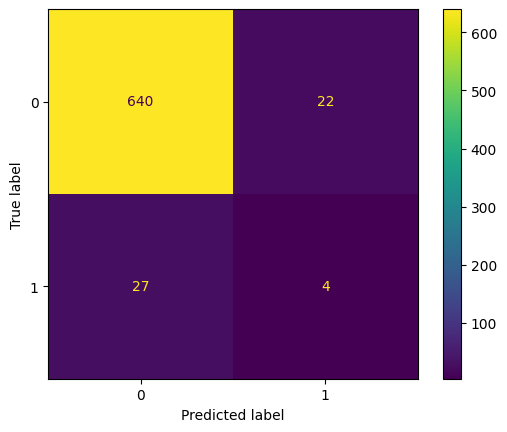

In [180]:
#Confusion matrix for |SMOTE  Decision Tree year 1
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test1,y_predDTOver1, labels=classifierDTSmote1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierDTSmote1.classes_)
disp.plot()
plt.show()


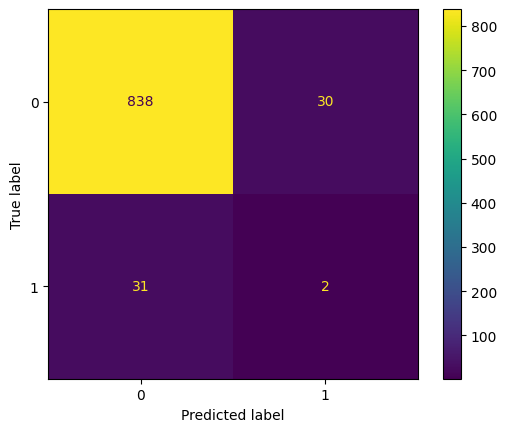

In [181]:
#Confusion matrix for SMOTE Decision Tree year 2
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test2,y_predDTOver2, labels=classifierDTSmote2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierDTSmote2.classes_)
disp.plot()
plt.show()

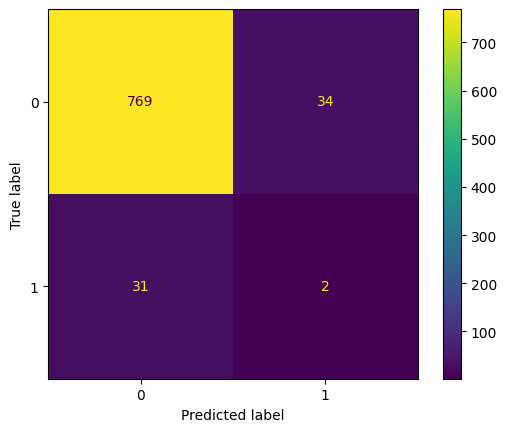

In [182]:
#Confusion matrix for SMOTE Decision Tree year 3
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test3,y_predDTOver3, labels=classifierDTSmote3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierDTSmote3.classes_)
disp.plot()
plt.show()

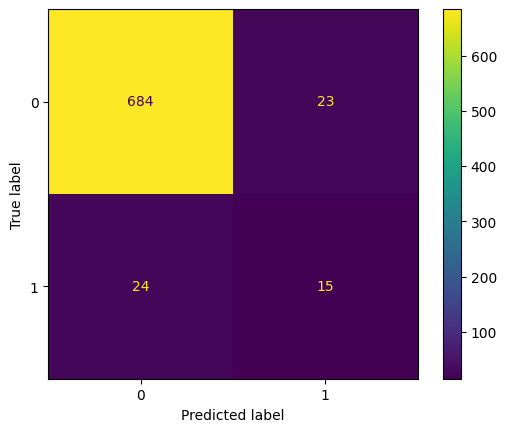

In [183]:
#Confusion matrix for SMOTE Decision Tree year 4
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test4,y_predDTOver4, labels=classifierDTSmote4.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierDTSmote4.classes_)
disp.plot()
plt.show()

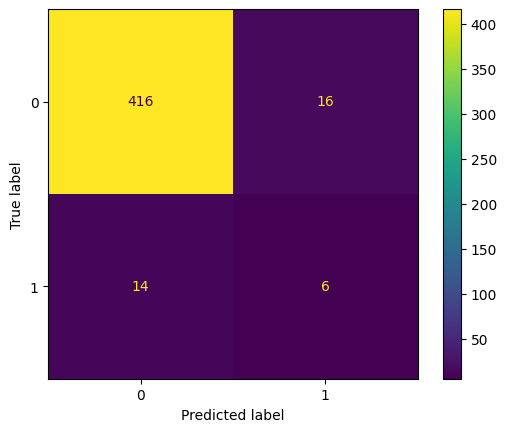

In [184]:
#Confusion matrix for SMOTE Decision Tree year 5
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test5,y_predDTOver5, labels=classifierDTSmote5.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierDTSmote5.classes_)
disp.plot()
plt.show()

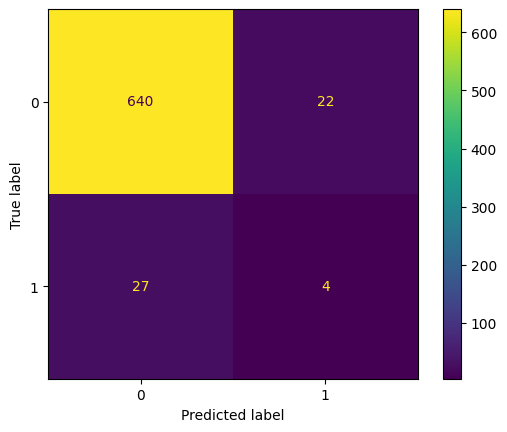

In [185]:
#Confusion matrix for under Decision Tree year 1
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test1,y_predDTUnder1, labels=classifierDTUnder1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierDTUnder1.classes_)
disp.plot()
plt.show()

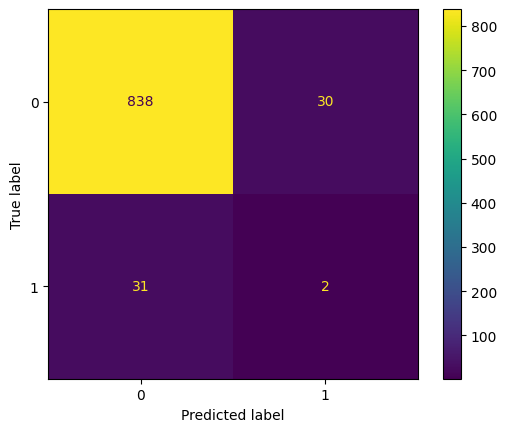

In [186]:
#Confusion matrix for under Decision Tree year 2
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test2,y_predDTUnder2, labels=classifierDTUnder2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierDTUnder2.classes_)
disp.plot()
plt.show()

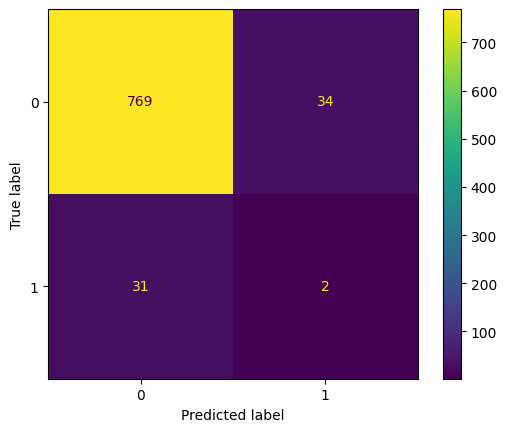

In [187]:
#Confusion matrix for under Decision Tree year 3
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test3,y_predDTUnder3, labels=classifierDTUnder3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierDTUnder3.classes_)
disp.plot()
plt.show()

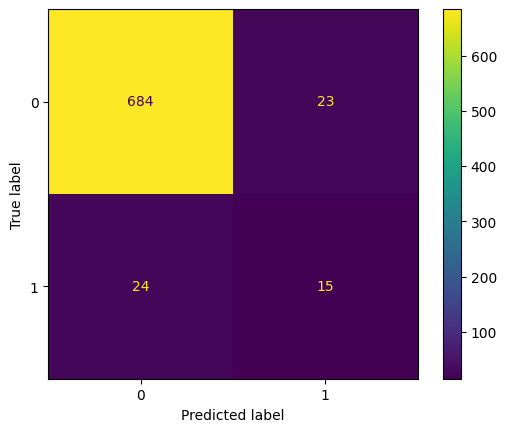

In [188]:
#Confusion matrix for under Decision Tree year 4
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test4,y_predDTUnder4, labels=classifierDTUnder4.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierDTUnder4.classes_)
disp.plot()
plt.show()

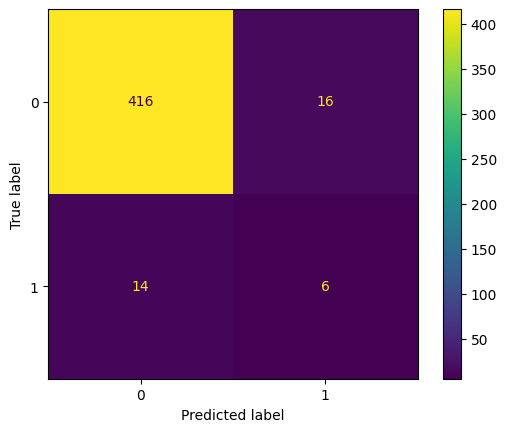

In [189]:
#Confusion matrix for under Decision Tree year 5
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test5,y_predDTUnder5, labels=classifierDTUnder5.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierDTUnder5.classes_)
disp.plot()
plt.show()

###**Specificity**

In [190]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [191]:
# Function to calculate specificity
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn = cm[1, 1]
    fp = cm[0, 1]
    return tn / (tn + fp) if (tn + fp) > 0 else 0.0

In [192]:
#year 1
#Over
specificity_DTOver = specificity_score(y_test1, y_predDTOver1)
print("Specificity Over:", specificity_DTOver)
#Under
specificity_DTUnder = specificity_score(y_test1, y_predDTUnder1)
print("Specificity Under:" ,specificity_DTUnder)

Specificity Over: 0.15384615384615385
Specificity Under: 0.15384615384615385


In [193]:
#Year 2
#Over
specificity_DTOver = specificity_score(y_test2, y_predDTOver2)
print("Specificity Over:", specificity_DTOver)
#Under
specificity_DTUnder = specificity_score(y_test2, y_predDTUnder2)
print("Specificity Under:" ,specificity_DTUnder)

Specificity Over: 0.0625
Specificity Under: 0.0625


In [194]:
#Year 3
#Over
specificity_DTOver = specificity_score(y_test3, y_predDTOver3)
print("Specificity Over :", specificity_DTOver)
#Under
specificity_DTUnder = specificity_score(y_test3, y_predDTUnder3)
print("Specificity Under:" ,specificity_DTUnder)

Specificity Over : 0.05555555555555555
Specificity Under: 0.05555555555555555


In [195]:
#Year 4
#Over
specificity_DTOver = specificity_score(y_test4, y_predDTOver4)
print("Specificity Over :", specificity_DTOver)
#Under
specificity_DTUnder = specificity_score(y_test4, y_predDTUnder4)
print("Specificity Under:" ,specificity_DTUnder)

Specificity Over : 0.39473684210526316
Specificity Under: 0.39473684210526316


In [196]:
#Year 5
#Over
specificity_DTOver = specificity_score(y_test5, y_predDTOver5)
print("Specificity Over :", specificity_DTOver)
#Under
specificity_DTUnder = specificity_score(y_test5, y_predDTUnder5)
print("Specificity Under :" ,specificity_DTUnder)

Specificity Over : 0.2727272727272727
Specificity Under : 0.2727272727272727


##Losistic Regression


###Confusion Matrix

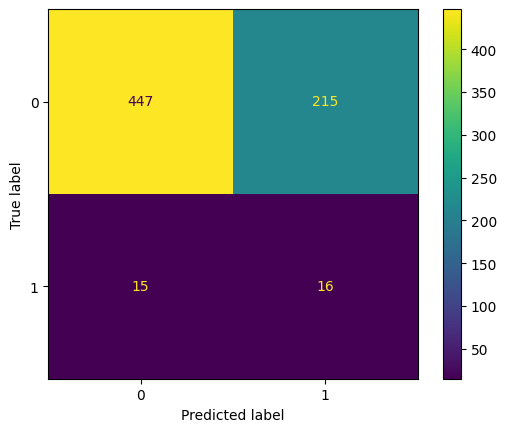

In [197]:
#Confusion matrix for SMOTE 1 Logistic Regression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test1,y_predLROver1, labels=classifierLRSMOTE1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierLRSMOTE1.classes_)
disp.plot()
plt.show()

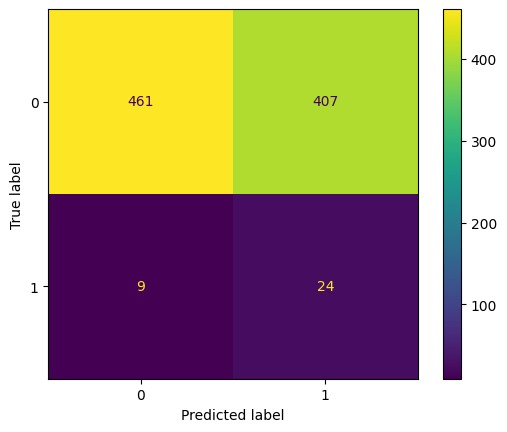

In [198]:
#Confusion matrix for SMOTE Logistic Regression year 2
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test2,y_predLROver2, labels=classifierLRSMOTE2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierLRSMOTE2.classes_)
disp.plot()
plt.show()

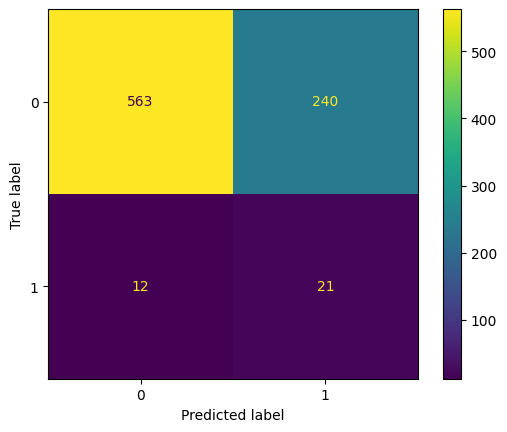

In [199]:
#Confusion matrix for SMOTE  Logistic Regression  year 3
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test3,y_predLROver3, labels=classifierLRSMOTE3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierLRSMOTE3.classes_)
disp.plot()
plt.show()

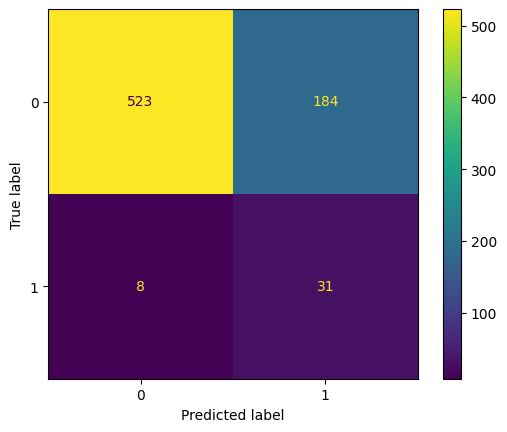

In [200]:
#Confusion matrix for SMOTE  Logistic Regression  year 4
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test4,y_predLROver4, labels=classifierLRSMOTE4.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierLRSMOTE4.classes_)
disp.plot()
plt.show()

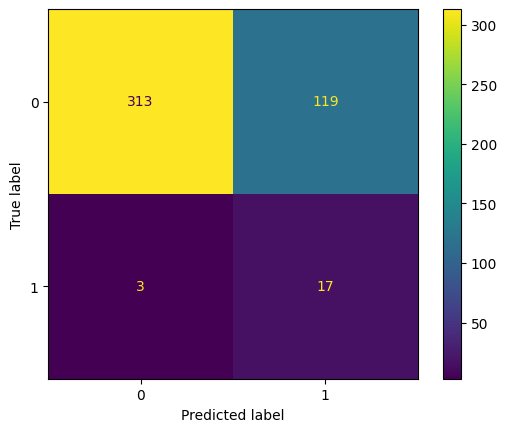

In [201]:
#Confusion matrix for SMOTE  Logistic Regression  year 5
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test5,y_predLROver5, labels=classifierLRSMOTE5.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierLRSMOTE5.classes_)
disp.plot()
plt.show()

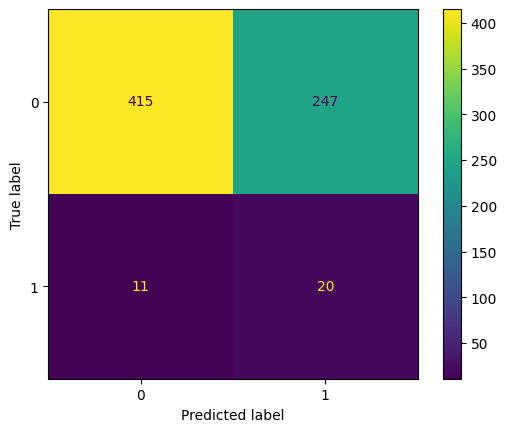

In [202]:
#Confusion matrix for Under  Logistic Regression  year 1
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test1,y_predLRUnder1, labels=classifierLRUnder1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierLRUnder1.classes_)
disp.plot()
plt.show()

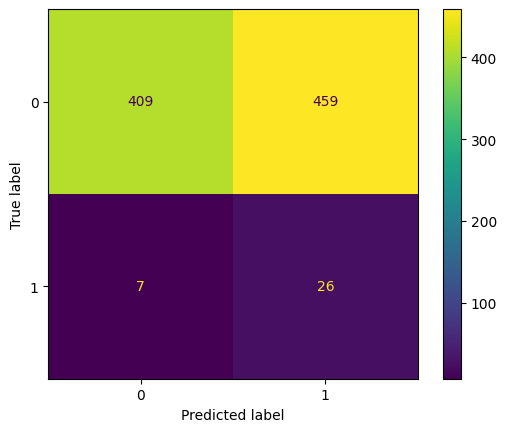

In [203]:
#Confusion matrix for Under  Logistic Regression  year 2
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test2,y_predLRUnder2, labels=classifierLRUnder2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierLRUnder2.classes_)
disp.plot()
plt.show()

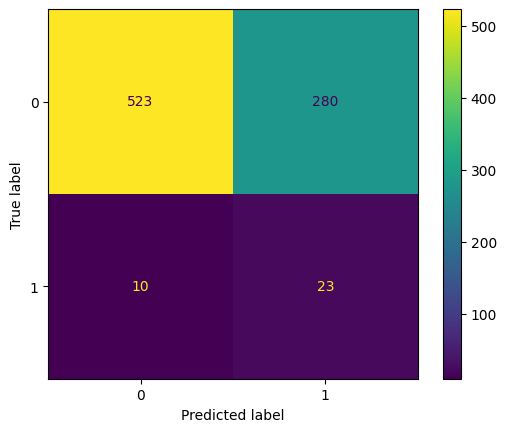

In [204]:
#Confusion matrix for Under  Logistic Regression  year 3
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test3,y_predLRUnder3, labels=classifierLRUnder3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierLRUnder3.classes_)
disp.plot()
plt.show()

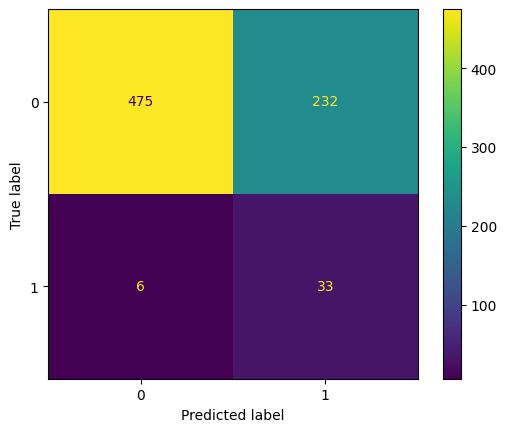

In [205]:
#Confusion matrix for Under  Logistic Regression  year 4
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test4,y_predLRUnder4, labels=classifierLRUnder4.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierLRUnder4.classes_)
disp.plot()
plt.show()

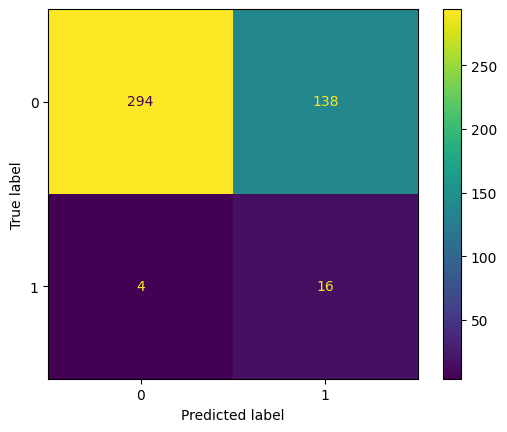

In [206]:
#Confusion matrix for Under  Logistic Regression  year 5
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test5,y_predLRUnder5, labels=classifierLRUnder5.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierLRUnder5.classes_)
disp.plot()
plt.show()

###Specificity

In [213]:
##Year 1
specificity_LROver = specificity_score(y_test1, y_predLROver1)
print("Specificity Over :", specificity_LROver)
specificity_LRUnder = specificity_score(y_test1, y_predLRUnder1)
print("Specificity Under:", specificity_LRUnder)

Specificity Over : 0.06926406926406926
Specificity Under: 0.0749063670411985


In [214]:
#Year 2
specificity_LROver = specificity_score(y_test2, y_predLROver2)
print("Specificity Over :", specificity_LROver)
specificity_LRUnder = specificity_score(y_test2, y_predLRUnder2)
print("Specificity Under:", specificity_LRUnder)

Specificity Over : 0.05568445475638051
Specificity Under: 0.05360824742268041


In [215]:
##Year 3
specificity_LROver = specificity_score(y_test3, y_predLROver3)
print("Specificity Over :", specificity_LROver)
specificity_LRUnder = specificity_score(y_test3, y_predLRUnder3)
print("Specificity Under:", specificity_LRUnder)

Specificity Over : 0.08045977011494253
Specificity Under: 0.07590759075907591


In [216]:
#Year 4
specificity_LROver = specificity_score(y_test4, y_predLROver4)
print("Specificity Over :", specificity_LROver)
specificity_LRUnder = specificity_score(y_test4, y_predLRUnder4)
print("Specificity Under:", specificity_LRUnder)

Specificity Over : 0.14418604651162792
Specificity Under: 0.12452830188679245


In [217]:
#Year 5
specificity_LROver = specificity_score(y_test5, y_predLROver5)
print("Specificity Over :", specificity_LROver)
specificity_LRUnder = specificity_score(y_test5, y_predLRUnder5)
print("Specificity Under:", specificity_LRUnder)

Specificity Over : 0.125
Specificity Under: 0.1038961038961039


##Random Forest

###Confusion Matrix

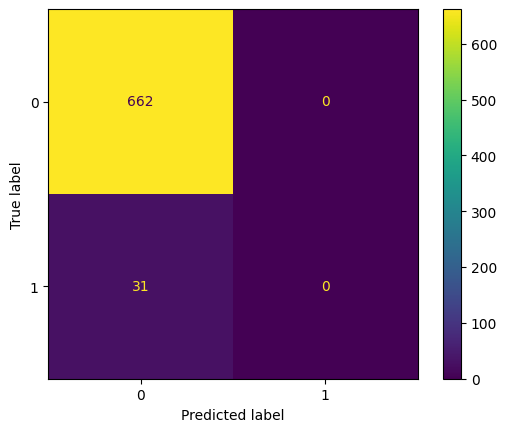

In [218]:
#Confusion matrix for Random Forest SMOTE Year 1
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test1,y_predRFOver1, labels=classifierRFOver1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierRFOver1.classes_)
disp.plot()
plt.show()

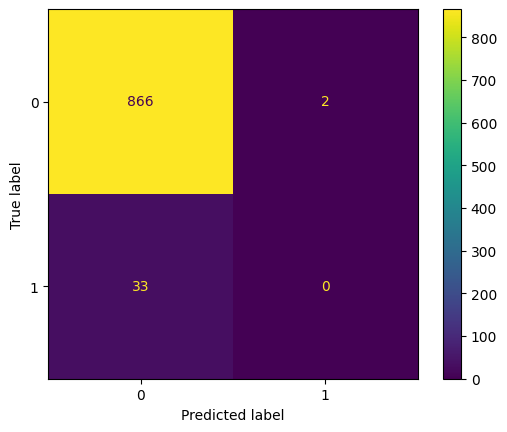

In [219]:
#Confusion matrix for Random Forest SMOTE Year 2
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test2,y_predRFOver2, labels=classifierRFOver2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierRFOver2.classes_)
disp.plot()
plt.show()

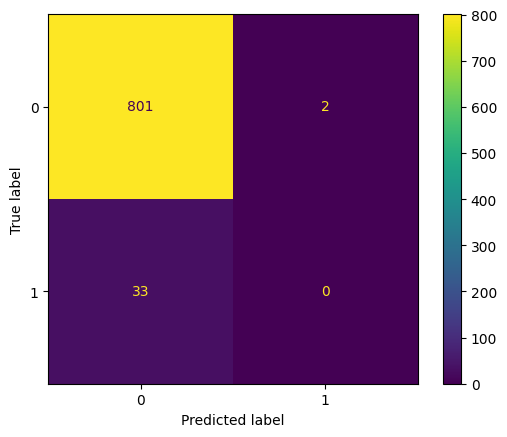

In [220]:
#Confusion matrix for Random Forest SMOTE Year 3
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test3,y_predRFOver3, labels=classifierRFOver3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierRFOver3.classes_)
disp.plot()
plt.show()

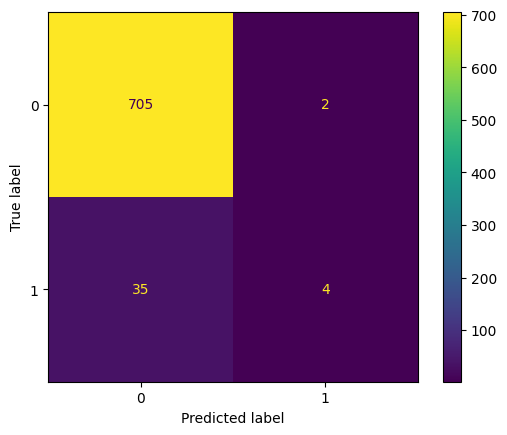

In [221]:
#Confusion matrix for Random Forest SMOTE Year 4
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test4,y_predRFOver4, labels=classifierRFOver4.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierRFOver4.classes_)
disp.plot()
plt.show()

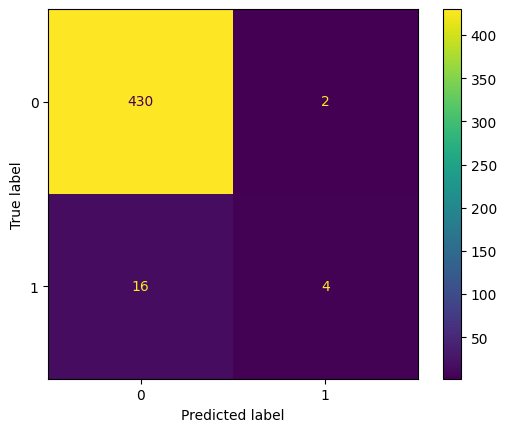

In [222]:
#Confusion matrix for Random Forest SMOTE Year 5
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test5,y_predRFOver5, labels=classifierRFOver5.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierRFOver5.classes_)
disp.plot()
plt.show()

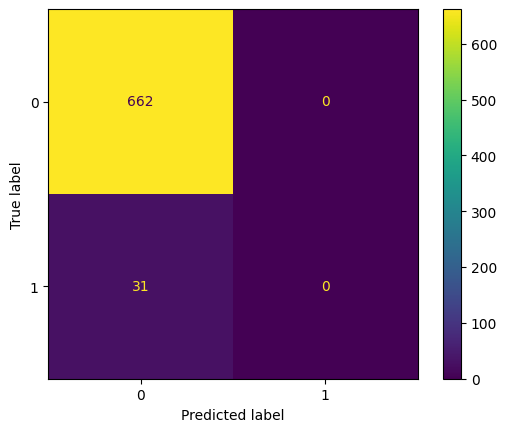

In [223]:
#Confusion matrix for Random Forest Under Year 1
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test1,y_predRFUnder1, labels=classifierRFUnder1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierRFUnder1.classes_)
disp.plot()
plt.show()

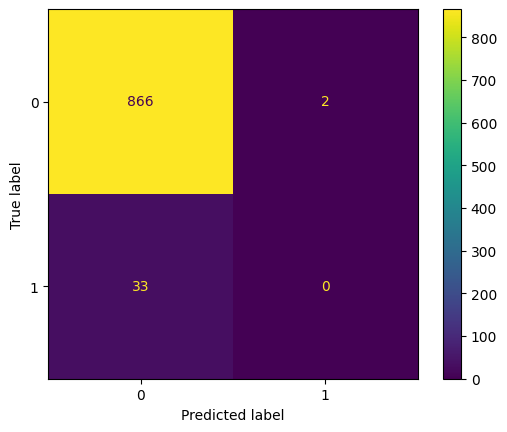

In [224]:
#Confusion matrix for Random Forest Under Year 2
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test2,y_predRFUnder2, labels=classifierRFUnder2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierRFUnder2.classes_)
disp.plot()
plt.show()

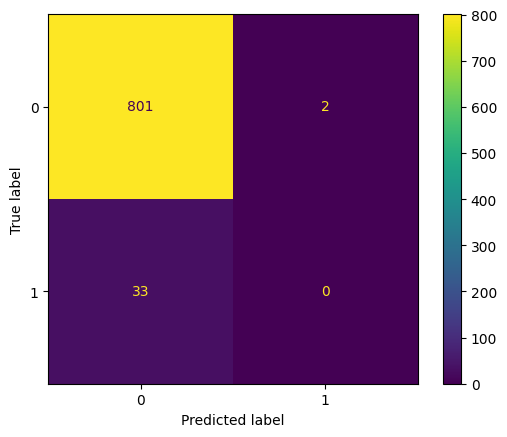

In [225]:
#Confusion matrix for Random Forest Under Year 3
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test3,y_predRFUnder3, labels=classifierRFUnder3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierRFUnder3.classes_)
disp.plot()
plt.show()

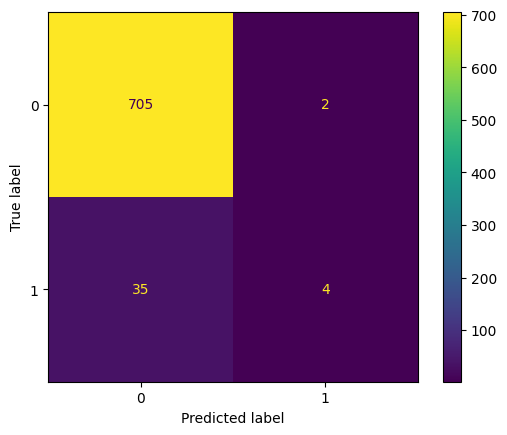

In [226]:
#Confusion matrix for Random Forest Under Year 4
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test4,y_predRFUnder4, labels=classifierRFUnder4.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierRFUnder4.classes_)
disp.plot()
plt.show()

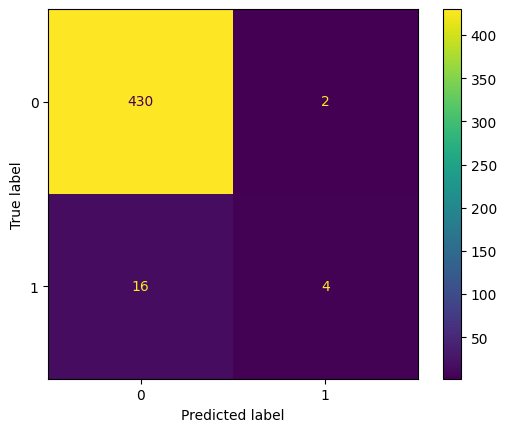

In [227]:
#Confusion matrix for Random Forest Under Year 5
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test5,y_predRFUnder5, labels=classifierRFUnder5.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierRFUnder5.classes_)
disp.plot()
plt.show()

###Specificity

In [248]:
#Year 1
specificity_RFOver = specificity_score(y_test1, y_predRFOver1)
print("Specificity Over :", specificity_RFOver)
specificity_RFUnder = specificity_score(y_test1, y_predRFUnder1)
print("Specificity Under:", specificity_RFUnder)

Specificity Over : 0.0
Specificity Under: 0.0


In [249]:
#Year 2
specificity_RFOver = specificity_score(y_test2, y_predRFOver2)
print("Specificity Over :", specificity_RFOver)
specificity_RFUnder = specificity_score(y_test2, y_predRFUnder2)
print("Specificity Under:", specificity_RFUnder)

Specificity Over : 0.0
Specificity Under: 0.0


In [250]:
#Year 3
specificity_RFOver = specificity_score(y_test3, y_predRFOver3)
print("Specificity Over :", specificity_RFOver)
specificity_RFUnder = specificity_score(y_test3, y_predRFUnder3)
print("Specificity Under:", specificity_RFUnder)

Specificity Over : 0.0
Specificity Under: 0.0


In [251]:
#Year 4
specificity_RFOver = specificity_score(y_test4, y_predRFOver4)
print("Specificity Over :", specificity_RFOver)
specificity_RFUnder = specificity_score(y_test4, y_predRFUnder4)
print("Specificity Under:", specificity_RFUnder)

Specificity Over : 0.6666666666666666
Specificity Under: 0.6666666666666666


In [252]:
#Year 5
specificity_RFOver = specificity_score(y_test5, y_predRFOver5)
print("Specificity Over :", specificity_RFOver)
specificity_RFUnder = specificity_score(y_test5, y_predRFUnder5)
print("Specificity Under:", specificity_RFUnder)

Specificity Over : 0.6666666666666666
Specificity Under: 0.6666666666666666


##AdaBoost

###Confusion Matrix

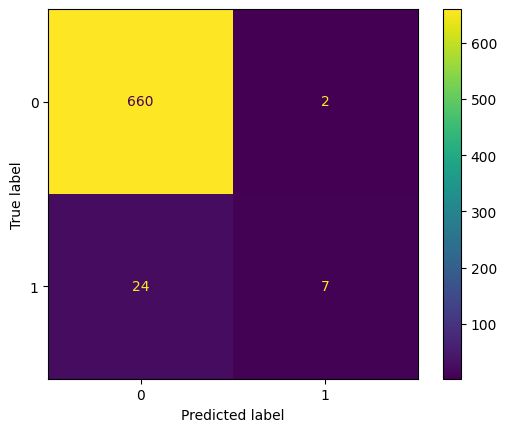

In [268]:
#Confusion matrix for AdaBoost SMOTE Year 1
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test1,y_predABOver1, labels=classifierABOver1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierABOver1.classes_)
disp.plot()
plt.show()

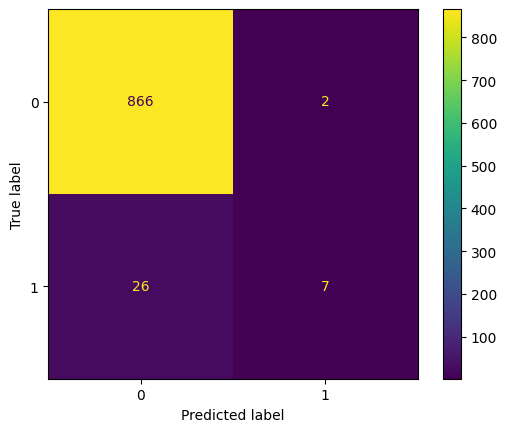

In [269]:
#Confusion matrix for AdaBoost SMOTE Year 2
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test2,y_predABOver2, labels=classifierABOver2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierABOver2.classes_)
disp.plot()
plt.show()

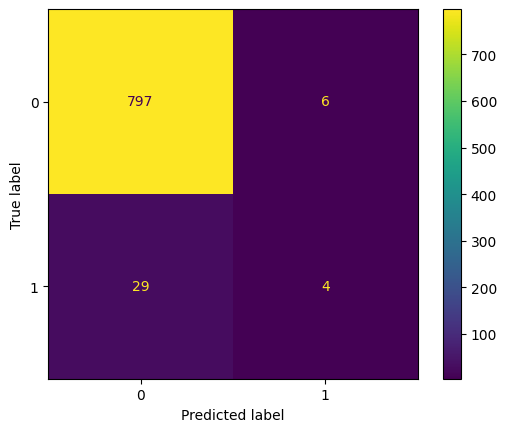

In [270]:
#Confusion matrix for AdaBoost SMOTE Year 3
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test3,y_predABOver3, labels=classifierABOver3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierABOver3.classes_)
disp.plot()
plt.show()

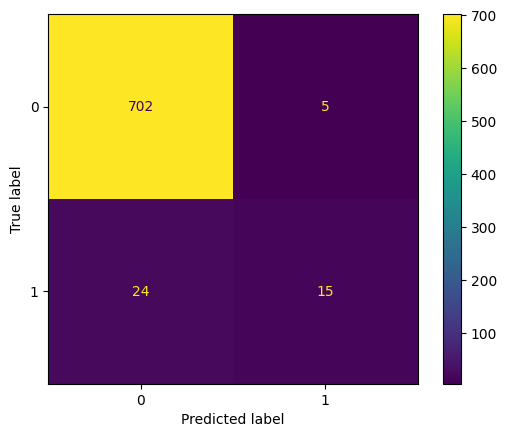

In [271]:
#Confusion matrix for AdaBoost SMOTE Year 4
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test4,y_predABOver4, labels=classifierABOver4.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierABOver4.classes_)
disp.plot()
plt.show()

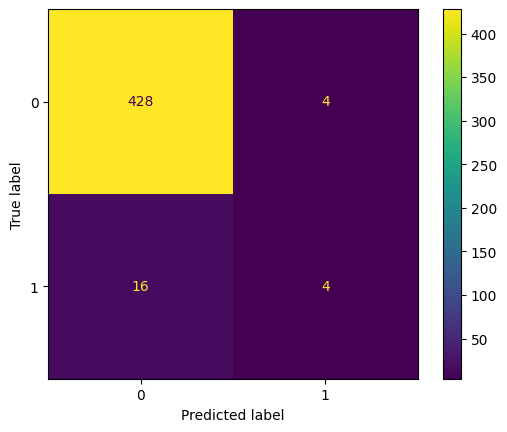

In [272]:
#Confusion matrix for AdaBoost SMOTE Year 5
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test5,y_predABOver5, labels=classifierABOver5.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierABOver5.classes_)
disp.plot()
plt.show()

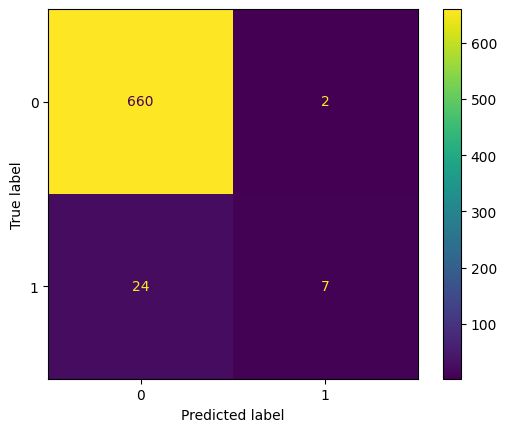

In [273]:
#Confusion matrix for AdaBoost Under Year 1
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test1,y_predABUnder1, labels=classifierABUnder1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierABUnder1.classes_)
disp.plot()
plt.show()

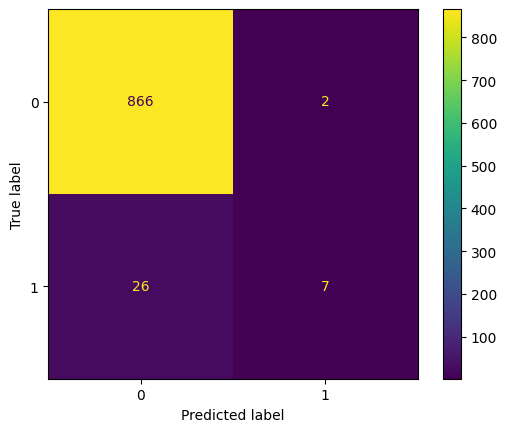

In [274]:
#Confusion matrix for AdaBoost Under Year 2
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test2,y_predABUnder2, labels=classifierABUnder2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierABUnder2.classes_)
disp.plot()
plt.show()

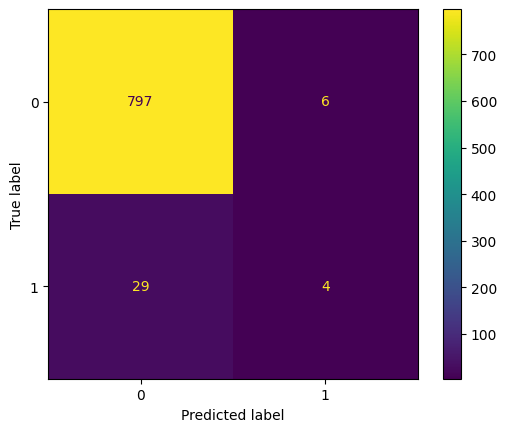

In [275]:
#Confusion matrix for AdaBoost Under Year 3
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test3,y_predABUnder3, labels=classifierABUnder3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierABUnder3.classes_)
disp.plot()
plt.show()

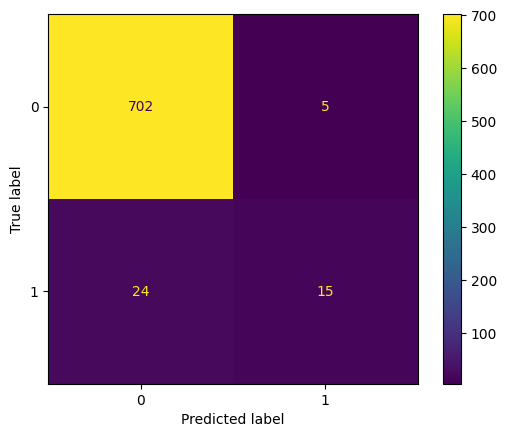

In [276]:
#Confusion matrix for AdaBoost Under Year 4
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test4,y_predABUnder4, labels=classifierABUnder4.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierABUnder4.classes_)
disp.plot()
plt.show()

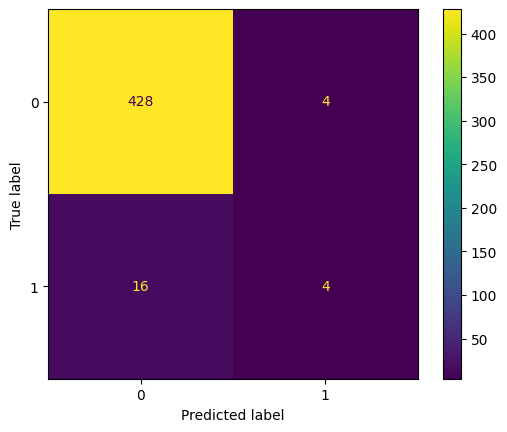

In [277]:
#Confusion matrix for AdaBoost Under Year 5
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test5,y_predABUnder5, labels=classifierABUnder5.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierABUnder5.classes_)
disp.plot()
plt.show()

###Specificity

In [263]:
#Year 1
specificity_ABOver = specificity_score(y_test1, y_predABOver1)
print("Specificity Over :", specificity_ABOver)
specificity_ABUnder = specificity_score(y_test1, y_predABUnder1)
print("Specificity Under:", specificity_ABUnder)

Specificity Over : 0.7777777777777778
Specificity Under: 0.7777777777777778


In [264]:
#Year 2
specificity_ABOver = specificity_score(y_test2, y_predABOver2)
print("Specificity Over :", specificity_ABOver)
specificity_ABUnder = specificity_score(y_test2, y_predABUnder2)
print("Specificity Under:", specificity_ABUnder)

Specificity Over : 0.7777777777777778
Specificity Under: 0.7777777777777778


In [265]:
#Year 3
specificity_ABOver = specificity_score(y_test3, y_predABOver3)
print("Specificity Over :", specificity_ABOver)
specificity_ABUnder = specificity_score(y_test3, y_predABUnder3)
print("Specificity Under:", specificity_ABUnder)

Specificity Over : 0.4
Specificity Under: 0.4


In [266]:
#Year 4
specificity_ABOver = specificity_score(y_test4, y_predABOver4)
print("Specificity Over :", specificity_ABOver)
specificity_ABUnder = specificity_score(y_test4, y_predABUnder4)
print("Specificity Under:", specificity_ABUnder)

Specificity Over : 0.75
Specificity Under: 0.75


In [267]:
#Year 5
specificity_ABOver = specificity_score(y_test5, y_predABOver5)
print("Specificity Over :", specificity_ABOver)
specificity_ABUnder = specificity_score(y_test5, y_predABUnder5)
print("Specificity Under:", specificity_ABUnder)

Specificity Over : 0.5
Specificity Under: 0.5


##Gradient Boost

###Confusion Matrix

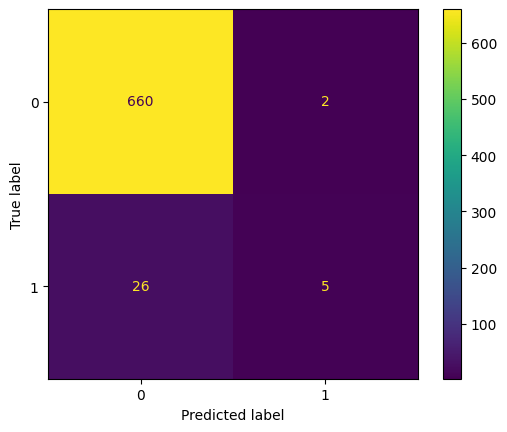

In [282]:
#year1 over
#Confusion matrix for Gradient Boost
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test1,y_predGBover1, labels=classifierGBover1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierGBover1.classes_)
disp.plot()
plt.show()

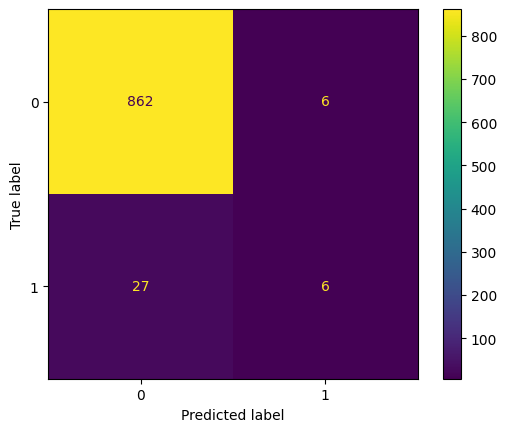

In [283]:
#year 2 over
cm= confusion_matrix(y_test2,y_predGBover2, labels=classifierGBover2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierGBover2.classes_)
disp.plot()
plt.show()

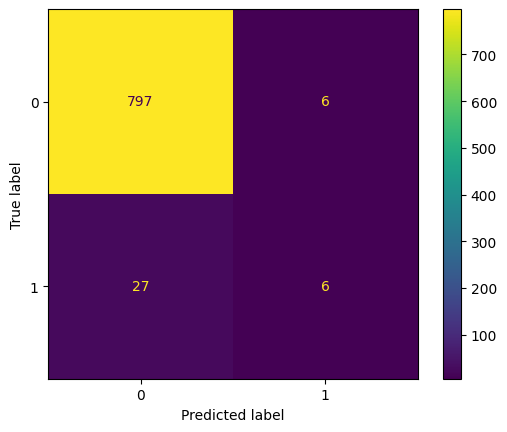

In [284]:
#year 3 over
cm= confusion_matrix(y_test3,y_predGBover3, labels=classifierGBover3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierGBover3.classes_)
disp.plot()
plt.show()

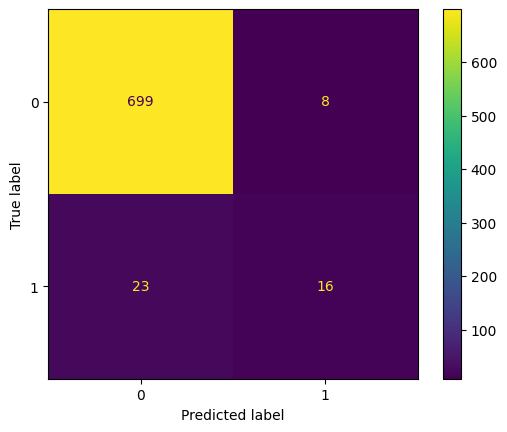

In [285]:
#Year 4 Over
cm= confusion_matrix(y_test4,y_predGBover4, labels=classifierGBover4.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierGBover4.classes_)
disp.plot()
plt.show()

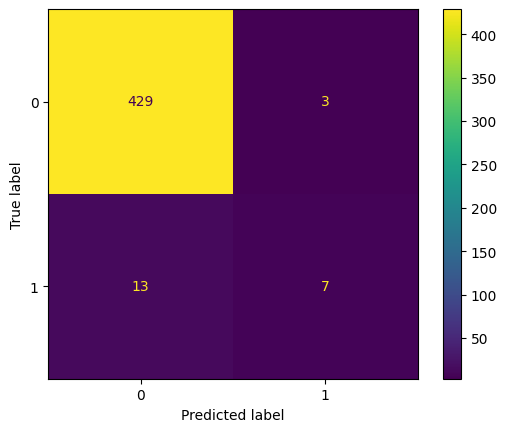

In [286]:
#year 5 Over
cm= confusion_matrix(y_test5,y_predGBover5, labels=classifierGBover5.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierGBover5.classes_)
disp.plot()
plt.show()

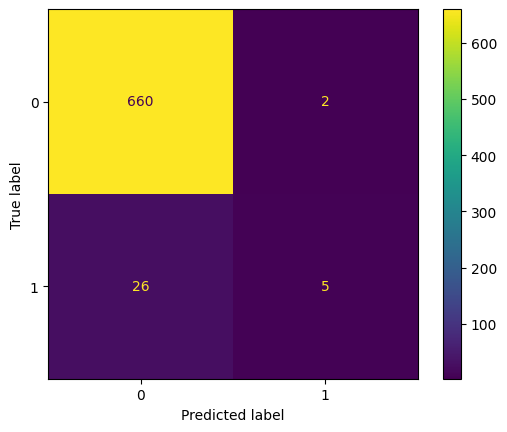

In [289]:
#Year 1 Under
cm= confusion_matrix(y_test1,y_predGBunder1, labels=classiferGBunder1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classiferGBunder1.classes_)
disp.plot()
plt.show()

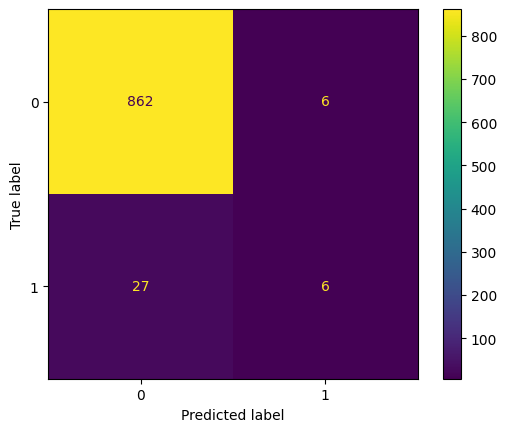

In [290]:
#Year 2 Under
cm= confusion_matrix(y_test2,y_predGBunder2, labels=classiferGBunder2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classiferGBunder2.classes_)
disp.plot()

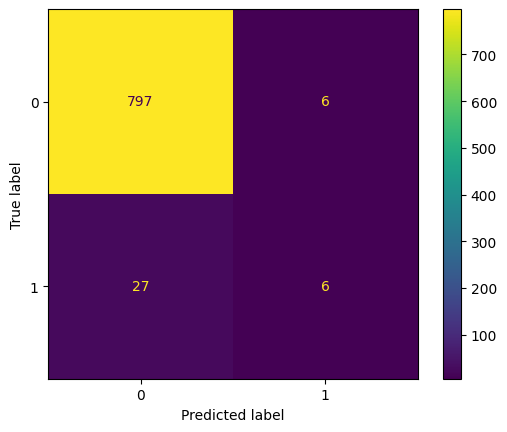

In [291]:
#Year 3 Under
cm= confusion_matrix(y_test3,y_predGBunder3, labels=classiferGBunder3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classiferGBunder3.classes_)
disp.plot()

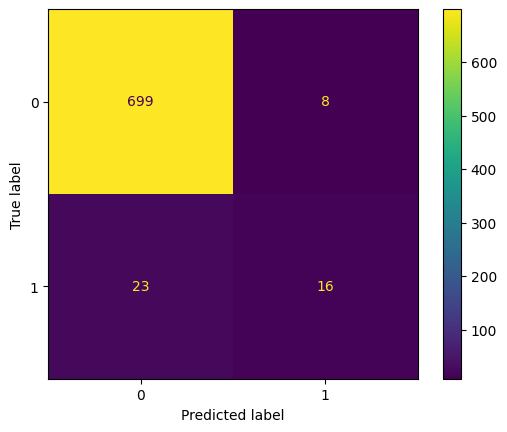

In [292]:
#Year 4 Under
cm= confusion_matrix(y_test4,y_predGBunder4, labels=classiferGBunder4.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classiferGBunder4.classes_)
disp.plot()

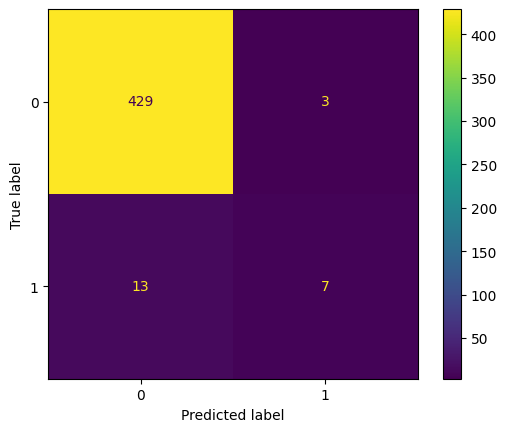

In [293]:
#Year 5 Under
cm= confusion_matrix(y_test5,y_predGBunder5, labels=classiferGBunder5.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classiferGBunder5.classes_)
disp.plot()

###Specificity

In [294]:
#Year 1
specificity_GBOver = specificity_score(y_test1, y_predGBover1)
print("Specificity Over :", specificity_GBOver)
specificity_GBUnder = specificity_score(y_test1, y_predGBunder1)
print("Specificity Under:", specificity_GBUnder)

Specificity Over : 0.7142857142857143
Specificity Under: 0.7142857142857143


In [295]:
#Year 2
specificity_GBOver = specificity_score(y_test2, y_predGBover2)
print("Specificity Over :", specificity_GBOver)
specificity_GBUnder = specificity_score(y_test2, y_predGBunder2)

Specificity Over : 0.5


In [296]:
#Year 3
specificity_GBOver = specificity_score(y_test3, y_predGBover3)
print("Specificity Over :", specificity_GBOver)
specificity_GBUnder = specificity_score(y_test3, y_predGBunder3)

Specificity Over : 0.5


In [297]:
#Year 4
specificity_GBOver = specificity_score(y_test4, y_predGBover4)
print("Specificity Over :", specificity_GBOver)
specificity_GBUnder = specificity_score(y_test4, y_predGBunder4)

Specificity Over : 0.6666666666666666


In [298]:
#Year 5
specificity_GBOver = specificity_score(y_test5, y_predGBover5)
print("Specificity Over :", specificity_GBOver)
specificity_GBUnder = specificity_score(y_test5, y_predGBunder5)

Specificity Over : 0.7


In [ ]:
filename='data.csv'
Bankrupt_model.to_csv(filename,index=False)

In [ ]:
files.download('data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(category_counts)

class
0    41314
1     2091
Name: count, dtype: int64


In [ ]:
#files.download(filename)